# Exploring Large Digital Libraries by Multimodal Criteria

The original publication is available [online](https://link.springer.com/chapter/10.1007%2F978-3-319-43997-6_24).

# TO DO
* generell auf we umschreiben im tutorial-teil

## Why to Read this Tutorial?
* In this tutorial, you will learn to read metadata from an OAI-PMH data provider and how to convert the retrieved data from Dublin Core to a pandas data frame.
* Furthermore, you will carry out some basic data analysis on your data in order to find out if the data is corrupt or unclean. Based on an example, you will clean some aspects of your data.
* Finally, you will analyse and visualize the data with the help of a network graph.

![title](img/architecture.png)

### Preparations
The following code snippet initializes your Python run-time enviroment in order to run all of the subsequent actions.

If you installed everything correctly with the help of [Anaconda](https://www.continuum.io/downloads) as explained in [dst4l0.ipynb](https://github.com/elektrobohemian/dst4l-copenhagen/blob/master/dst4l0.ipynb), the following packages should be installed correctly and be importable without problems.

In [1]:
!pip install jellyfish
!pip install geojson
!pip install geopy
!pip install sickle
!pip install googlemaps

#### Additional Configuration of This Notebook

In [2]:
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If you set 'allowDownloads' to True, all images will be downloaded and processed again
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
allowDownloads=False # should be True if you run this for the first time

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# Download directory used for images etc.
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
downloadDir="./tmp/"

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# Keep original downloaded TIFF images? Otherwise, they will be deleted and only JPEG thumbnails remain after download.
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

keepTIFFs=False

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If you set 'demoClustering' to False, the clustering steps will take about 2 hours
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
demoClustering=False # should be False if you run this for the first time

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If you set 'allowComputationallyExpensiveCalculations' to True, various time consuming tasks (some of them running 
# several hours) will be carried out and not only loaded from pre-computed data files
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
allowComputationallyExpensiveCalculations=False # should be True if you run this for the first time

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# Enabling this action activates exact string matching againt name lists
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
allowExactStringMatching=True

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If you set to True, some plots will be saved as PDF documents in ./figures/
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
saveFiguresAsPDF=True

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If you set to True, Google Map API will be used to resolve location names, if False OpenStreetMap will be used
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *i
useGoogleMapsAPI=False
privateGoogleKey='ENTER YOUR KEY HERE' #if you want to use Google, you need a personal key

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If set to True, OpenStreetMap API will be used to fetch spatial names and alternative localized names, should be True at first run
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
getSpatialNamesFromOSM=False

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If set to True, details per PPN will be saved as separate JSON files in "jsonWebDir"
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
serializePPNLookup2JSON=False
jsonWebDir="./web/data/ppn/"

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If set to True, the raw features created by the Java application will be read from disk and converted for further usage, must be True at first run
#
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
reinterpretVisualWordRawFeatures=False

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
#
# If set to True, a HTTP webserver will be started after all cells have been processed to show the results
# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
launchHTTPServer=False

In [3]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 40)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

from bs4 import BeautifulSoup
from collections import OrderedDict # provides the ordered dictionary
import re # for regular expressions used below
import urllib # to read from URLs
import json
import networkx as nx # network analysis
from networkx.readwrite import json_graph
import itertools
import os.path
from datetime import datetime # for time measurement
import sys
import os
import pickle
import subprocess as subp
import gzip
import math
import codecs

from jellyfish import jaro_distance, jaro_winkler, hamming_distance, levenshtein_distance
import scipy.cluster.hierarchy as scipycluster
from sklearn.feature_extraction.text import TfidfVectorizer

from skimage import io, exposure
from scipy.spatial import distance
# import the k-means algorithm
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin,pairwise_distances_argmin_min, pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances

# OAI
from sickle import Sickle

# image handling
from PIL import Image

# geo stuff
import googlemaps
from geopy.distance import vincenty
import geojson as gj

def printLog(text):
    now=str(datetime.now())
    print("["+now+"]\t"+text)
    # forces to output the result of the print command immediately, see: http://stackoverflow.com/questions/230751/how-to-flush-output-of-python-print
    sys.stdout.flush()
    
def pickleCompress(fileName,pickledObject):
    printLog("Pickling to '%s'" %fileName)
    f = gzip.open(fileName,'wb')
    pickle.dump(pickledObject,f)
    f.close()
    printLog("Pickling done.")
    
def pickleDecompress(fileName):
    #restore the object
    printLog("Depickling from '%s'" %fileName)
    f = gzip.open(fileName,'rb')
    pickledObject = pickle.load(f)
    f.close()
    printLog("Depickling done.")
    return pickledObject

if not os.path.exists(downloadDir):
        os.makedirs(downloadDir)
if not os.path.exists("./picklez/"):
        os.makedirs("./picklez/")
if not os.path.exists("./figures/"):
        os.makedirs("./figures/")
if not os.path.exists("./graphs/"):
        os.makedirs("./graphs/")
if not os.path.exists("./graphs/generics/"):
        os.makedirs("./graphs/generics/")        
if not os.path.exists("./html/"):
        os.makedirs("./html/")
if not os.path.exists("./web/"):
        os.makedirs("./web/")
if not os.path.exists("./web/qa/"):
        os.makedirs("./web/qa/")
if not os.path.exists("./web/data/"):
        os.makedirs("./web/data/")
if not os.path.exists("./web/data/ppn/"):
        os.makedirs("./web/data/ppn/")
if not os.path.exists("./web/data/layers/"):
        os.makedirs("./web/data/layers/")

The only missing package is most likely Jellyfish, which provides support for string matching and offers such phonetic distance functions that we will need below. For further details, see the [Jellyfish homepage](https://pypi.python.org/pypi/jellyfish). The package can be installed by running the following command.

## Retrieving Data
### Connecting to the OAI-conform Repository and Downloading Metadata Records

The next cell connects to the Berlin State Library OAI-PMH server to download metadata records in the [Dublin Core format](http://dublincore.org/).
The records are then saved locally to work with them later. For the sake of simplicity, the saving relies on the pickling mechanism of Python - its built-in object serialization method. In a productive use case, you might reach the limits of the pickle package because of the resulting file size. A viable alternative is [HDF5](https://www.h5py.org/).

In [77]:
savedRecords=[]
if allowDownloads:
    # connect to a metadata repository
    sickle = Sickle('http://digital.staatsbibliothek-berlin.de/oai')

    # for debugging purposes you might want to uncomment the following commands
    # get the sets from the data provider connected to
    #sets = sickle.ListSets()
    # print the returned sets including their identifiers
    #print("Sets provided by data provider\n* * * * * * * * * * * * * * * * * * * * * ") # \n creates a new line
    #for s in sets:
    #    print("'"+s.setName+"' accessible via: '"+s.setSpec+"'")

    # get the records from this repository's specific document set 'DC_krieg.1914.1918' (documents related to World War I) 
    # using Dublin Core format 
    records = sickle.ListRecords(metadataPrefix='oai_dc', set='DC_all')

    printLog("Starting OAI-PMH record download...")
    # initialize some variables for counting and saving the metadata records
    savedDocs=0
    # 2:15 h for 100k
    maxDocs=120000 # 100 is just for testing, for more interesting results increase this value to 1000. ATTENTION! this will also take more time for reading data.

    # save the records locally as we don't want to have to rely on a connection to the OAI-PMH server all the time
    # iterate over all records until maxDocs is reached
    # ATTENTION! if you re-run this cell, the contents of the savedRecords array will be altered!
    for record in records:
        # get the PPN of the digitized work as the DC identifier will reference different (analog) manifestations
        tokens=record.header.identifier.split(":")
        tokens
        for t in tokens:
            if t.startswith("PPN"):
                # the array building simply fixes the issue that all DC field come as arrays
                record.metadata['PPN']=[t]
        
        # check if we reach the maximum document value
        if savedDocs<maxDocs:
            savedDocs=savedDocs+1
            # save the current record to the "savedRecords" array
            savedRecords.append(record.metadata)
            if savedDocs%1000==0:
                printLog("Downloaded %d of %d records."%(savedDocs,maxDocs))
        # if so, end the processing of the for-loop
        else:
            break # break ends the processing of the loop

    printLog("Finished OAI-PMH download of "+str(len(savedRecords))+" records.")
    pickle.dump( savedRecords, open( "save_120k_dc_all.pickle", "wb" ) )
else:
    printLog("Loading OAI-PMH records from disk...")
    savedRecords=pickle.load( open( "save_120k_dc_all.pickle", "rb" ) )
    printLog("Done.")

[2019-02-25 07:14:28.390954]	Starting OAI-PMH record download...
[2019-02-25 07:14:59.201335]	Downloaded 1000 of 120000 records.
[2019-02-25 07:15:33.005235]	Downloaded 2000 of 120000 records.
[2019-02-25 07:16:06.287283]	Downloaded 3000 of 120000 records.
[2019-02-25 07:16:38.742373]	Downloaded 4000 of 120000 records.
[2019-02-25 07:17:11.514242]	Downloaded 5000 of 120000 records.
[2019-02-25 07:17:44.896753]	Downloaded 6000 of 120000 records.
[2019-02-25 07:18:18.567359]	Downloaded 7000 of 120000 records.
[2019-02-25 07:18:52.729528]	Downloaded 8000 of 120000 records.
[2019-02-25 07:19:24.223362]	Downloaded 9000 of 120000 records.
[2019-02-25 07:19:56.633240]	Downloaded 10000 of 120000 records.
[2019-02-25 07:20:29.236865]	Downloaded 11000 of 120000 records.
[2019-02-25 07:21:01.452085]	Downloaded 12000 of 120000 records.
[2019-02-25 07:21:33.094669]	Downloaded 13000 of 120000 records.
[2019-02-25 07:22:05.042489]	Downloaded 14000 of 120000 records.
[2019-02-25 07:22:37.914450]	Downl

In [ ]:
# uncomment this cell if you want to split the image download to two different computers
# in this case, one computer will use "even_dc_all.pickle" while the other will use "odd_dc_all.pickle" in the next cell

#availableKeys=dict()
#evenRecords=[]
#oddRecords=[]

#for i,r in enumerate(savedRecords):
#    for k in r.keys():
#        if not k in availableKeys:
#            availableKeys[k]=1
#        else:
#            availableKeys[k]=availableKeys[k]+1
#    if i%2==0:
#        evenRecords.append(r)
#    else:
#        oddRecords.append(r)

#pickle.dump( evenRecords, open( "even_dc_all.pickle", "wb" ) )
#pickle.dump( oddRecords, open( "odd_dc_all.pickle", "wb" ) )

In the next step, all images are downloaded, downscaled and converted to the JPEG format.

In [199]:
# uncomment this line if you are continuing the execution of this notebook at a later point in time
#savedRecords=pickle.load( open( "save_120k_dc_all.pickle", "rb" ) )
tiffDownloadPath="https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=%PPN%&divID=PHYS_0001&original=true"
countSavedRecords=len(savedRecords)
printLog("Started image download and processing. This will take a while...")
#logFile = open("/Volumes/2TB_WD/sbb_images/downloadIssues.txt", "w")
logFile = open(downloadDir+"/downloadIssues.txt", "w")

# surpress PIL's DecompressionBombErrors and Warnings
Image.MAX_IMAGE_PIXELS = None

for i,record in enumerate(savedRecords):
    if i%1000==0:
        if allowDownloads:
            printLog("Downloaded %d of %d images."%(i,countSavedRecords))
    
    ppn=""
    for r in record["identifier"]:
        if r.startswith("PPN"):
            ppn=r
            break
    #if len(record["identifier"])>1:
    #    ppn=str(record["identifier"][1])
    #else:
    #    ppn=str(record["identifier"][0])
    ppnTIFF=ppn+".tif"
    ppnJPEGPAth=downloadDir+ppn+".jpg"
    #if "object" in record.keys() and allowDownloads:
    if allowDownloads:
        httpCode=200
        # prevent downloading of already present files
        if not os.path.isfile(ppnJPEGPAth) :
            tryDownload=True
            # check for the HTTP error code, maybe the file does not exist
            try:
                response=urllib.request.urlopen(tiffDownloadPath.replace("%PPN%",ppn))
            except urllib.error.HTTPError as ex:
                #print("Error with %s"%tiffDownloadPath.replace("%PPN%",ppn))
                httpCode=ex.code
                tryDownload=False
            if tryDownload:
                #if allowDownloads:
                urlinfo=urllib.request.urlretrieve(tiffDownloadPath.replace("%PPN%",ppn),downloadDir+ppnTIFF)
                img = Image.open(downloadDir+ppnTIFF)
                img.thumbnail((512,512))
                img.save(downloadDir+ppn+".jpg")
                if not keepTIFFs:
                    os.remove(downloadDir+ppnTIFF)
                #ret=subp.call(["mogrify", "-resize","512x512","-format", "jpg",downloadDir+ppnTIFF])
                #if ret!=0:
                #    print("Problem with mogrifying "+ppnTIFF)
                #    logFile.write("[MOGRIFY]: %s \n%s\n\n" % (str("Problem with mogrifying "+ppnTIFF),str("Downloaded from: "+record["object"][0])))
                #ret=subp.call(["rm",downloadDir+ppnTIFF])
                #if ret!=0:
                #    print("Problem with removing "+ppnTIFF)
                #    logFile.write("[REMOVAL]: %s\n\n" % "Problem with removing "+ppnTIFF)
            else:
                print("Problem with accessing "+ppnTIFF+ " @ "+tiffDownloadPath.replace("%PPN%",ppn)+" due to HTTP code: "+str(httpCode))
                logFile.write("[HTTP]: %s\n\n" % "Problem with accessing "+tiffDownloadPath.replace("%PPN%",ppn))
                logFile.write("\tHTTP Code: "+str(httpCode)+"\n")
                #logFile.write(str(urlinfo[1])+"\n\n")
    else:
        logFile.write("[OBJECT key missing]: %s\n\n" % str(record))
logFile.close()
print("\n")
if allowDownloads:
    printLog("Finished image download and processing.")
else:
    printLog("Skipped image download and processing.")

[2019-02-26 16:32:56.397559]	Started image download and processing. This will take a while...
[2019-02-26 16:32:56.407124]	Downloaded 0 of 120000 images.
Problem with accessing PPN667471367.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN667471367&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN645051330.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN645051330&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN833628798.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN833628798&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN794142230.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN794142230&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN733240194.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format

Problem with accessing PPN848647041.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN848647041&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN770871283.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN770871283&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN856596213.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN856596213&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN857348752.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN857348752&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN820576913.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN820576913&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN642636273.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN743983939.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743983939&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN881701157.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN881701157&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN898148987.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN898148987&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718685059.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN718685059&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN77762754X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN77762754X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718685008.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN718684745.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN718684745&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743983955.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743983955&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-26 16:33:04.484179]	Downloaded 16000 of 120000 images.
Problem with accessing PPN1041326807.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1041326807&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-26 16:33:04.558339]	Downloaded 17000 of 120000 images.
[2019-02-26 16:33:04.582113]	Downloaded 18000 of 120000 images.
Problem with accessing PPN82177087X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN82177087X&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-26 16:33:04.657826]	Downloaded 19000 of 120000 images.
Pr

Problem with accessing PPN770840795.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN770840795&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN824436121.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN824436121&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN641729081.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN641729081&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1022463713.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1022463713&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN726672238.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN726672238&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN721227309.tif @ https://ngcs.staatsbibliothek-b

Problem with accessing PPN842389202.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN842389202&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN751019909.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN751019909&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN612900363.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN612900363&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN726684554.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN726684554&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN799762318.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN799762318&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN687551013.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN68758650X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN68758650X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN781882850.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN781882850&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN817043322.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN817043322&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1031099786.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1031099786&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN795257333.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN795257333&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN699904455.tif @ https://ngcs.staatsbibliothek-b

Problem with accessing PPN1014497256.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1014497256&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN640178200.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN640178200&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN732718074.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN732718074&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1013751493.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1013751493&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN776799614.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN776799614&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN636343391.tif @ https://ngcs.staatsbibliothek

Problem with accessing PPN728155435.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN728155435&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN727461818.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN727461818&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN779698525.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN779698525&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN640790526.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN640790526&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN654806942.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN654806942&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN734652577.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN783127928.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN783127928&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN777099608.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN777099608&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN77762754X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN77762754X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743984811.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743984811&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743983335.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743983335&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743983114.tif @ https://ngcs.staatsbibliothek-ber

[2019-02-26 16:33:23.295564]	Downloaded 24000 of 120000 images.
Problem with accessing PPN827607105.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN827607105&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN684566761.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN684566761&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN755983475.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN755983475&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743982703.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743982703&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718685385.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN718685385&divID=PHYS_0001&original=true due to HTTP code: 500
Problem wit

Problem with accessing PPN644986026.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN644986026&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN846575965.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN846575965&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN818449527.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN818449527&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN823937747.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN823937747&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN735081913.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN735081913&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN768522536.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN825539536.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN825539536&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN72995627X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN72995627X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN80561057X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN80561057X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN756671035.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN756671035&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN851708188.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN851708188&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1011138077.tif @ https://ngcs.staatsbibliothek-be

Problem with accessing PPN771066198.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN771066198&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN658117106.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN658117106&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN3306131202.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN3306131202&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN3343781851.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN3343781851&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN798417374.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN798417374&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN663083192.tif @ https://ngcs.staatsbibliothek

Problem with accessing PPN682227439.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN682227439&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN727461818.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN727461818&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN662828860.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN662828860&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN770907601.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN770907601&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN803797397.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN803797397&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN869864238.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN834038331.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN834038331&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN745121594.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN745121594&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN781530660.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN781530660&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN666164967.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN666164967&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN770992706.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN770992706&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN670382396.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN666054959.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN666054959&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN73769291X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN73769291X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN829993401.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN829993401&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN769912397.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN769912397&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN89392234X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN89392234X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN729595463.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN841234213.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN841234213&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN660726343.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN660726343&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN829182675.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN829182675&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN769521177.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN769521177&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN670607959.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN670607959&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN726373001.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN767224590.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN767224590&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN721925812.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN721925812&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN815302096.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN815302096&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN888190212.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN888190212&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN838223354.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN838223354&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN779698525.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN749516658.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN749516658&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN769521177.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN769521177&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN897669274.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN897669274&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN877373892.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN877373892&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN774624159.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN774624159&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN679592717.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN852477163.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN852477163&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN733239757.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN733239757&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN779358244.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN779358244&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN859745007.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN859745007&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN680540288.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN680540288&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-26 16:33:52.227287]	Downloaded 33000 of 120000 images.
Problem wit

Problem with accessing PPN614775248.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN614775248&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN797732470.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN797732470&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN778510980.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN778510980&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN838422888.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN838422888&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-26 16:33:54.954842]	Downloaded 42000 of 120000 images.
Problem with accessing PPN863611818.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN863611818&divID=PHYS_0001&original=true due to HTTP code: 500
Problem wit

Problem with accessing PPN1025163443.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1025163443&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN775164798.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN775164798&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN777066653.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN777066653&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN775913340.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN775913340&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743985338.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743985338&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN775912581.tif @ https://ngcs.staatsbibliothek-b

Problem with accessing PPN823209180.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN823209180&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718684435.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN718684435&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN751425923.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN751425923&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718684346.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN718684346&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743985427.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743985427&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743982975.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN751001279.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN751001279&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743984277.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743984277&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN777862891.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN777862891&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743984676.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743984676&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN823209652.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN823209652&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN745281109.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN818319208.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN818319208&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN74398384X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN74398384X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743985354.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743985354&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718685377.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN718685377&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN783895224.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN783895224&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743982576.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN732479401.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN732479401&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN654524254.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN654524254&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN67119223X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN67119223X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN746044011.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN746044011&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN767834607.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN767834607&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN645940143.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN757459102.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN757459102&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN820517585.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN820517585&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN726208744.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN726208744&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN654048835.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN654048835&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN756019605.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN756019605&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN770006663.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN770782957.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN770782957&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN73463756X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN73463756X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN683199773.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN683199773&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN749465875.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN749465875&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN666694850.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN666694850&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN630517967.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN733608159.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN733608159&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN659093715.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN659093715&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN65693588X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN65693588X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN780301307.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN780301307&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN778578895.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN778578895&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1030377707.tif @ https://ngcs.staatsbibliothek-be

Problem with accessing PPN82815032X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN82815032X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN871978628.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN871978628&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN651739381.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN651739381&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN859258351.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN859258351&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718318749.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN718318749&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN669210218.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN636415058.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN636415058&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN77097144X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN77097144X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN657407372.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN657407372&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN746657714.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN746657714&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN64457674X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN64457674X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN672640759.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN756636841.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN756636841&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN660769816.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN660769816&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN749489871.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN749489871&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN672757621.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN672757621&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN718684109.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN718684109&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN78245495X.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN684252333.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN684252333&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN879265957.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN879265957&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN767223772.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN767223772&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN721345263.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN721345263&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN742713474.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN742713474&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN897852680.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN646233505.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN646233505&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN756006309.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN756006309&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN644913924.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN644913924&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN689249071.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN689249071&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN654499276.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN654499276&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN873251245.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN885662385.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN885662385&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN827121660.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN827121660&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN739328115.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN739328115&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN744072751.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN744072751&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN82287699X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN82287699X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN689353065.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN1000695824.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1000695824&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN633633577.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN633633577&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743703480.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743703480&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN848650743.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN848650743&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN655632549.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN655632549&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN672984091.tif @ https://ngcs.staatsbibliothek-b

Problem with accessing PPN896953513.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN896953513&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN837496306.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN837496306&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN826736157.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN826736157&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN730055388.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN730055388&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN68354893X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN68354893X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN768995442.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN678785473.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN678785473&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1020533447.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1020533447&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN755394968.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN755394968&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN823925196.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN823925196&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN684719797.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN684719797&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN746884435.tif @ https://ngcs.staatsbibliothek-b

Problem with accessing PPN799109657.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN799109657&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN757616550.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN757616550&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN717310531.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN717310531&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN672652099.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN672652099&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN738534862.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN738534862&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN717954676.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN775920991.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN775920991&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN79910454X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN79910454X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1046373854.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1046373854&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN769521746.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN769521746&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN743702409.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN743702409&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN799116912.tif @ https://ngcs.staatsbibliothek-b

Problem with accessing PPN655210075.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN655210075&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN816082588.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN816082588&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN859859835.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN859859835&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN637324498.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN637324498&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN733228933.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN733228933&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN680198792.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN861382188.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN861382188&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1038150027.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1038150027&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN654465088.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN654465088&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN766347346.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN766347346&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN816886172.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN816886172&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN669861758.tif @ https://ngcs.staatsbibliothek-b

Problem with accessing PPN881331538.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN881331538&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN789418835.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN789418835&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN647152797.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN647152797&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN642762309.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN642762309&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN667632441.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN667632441&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN750437987.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN824007409.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN824007409&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN861276574.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN861276574&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN666696667.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN666696667&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN611360675.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN611360675&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN688362818.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN688362818&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN682934240.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN72690371X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN72690371X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1030548609.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1030548609&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN65480155X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN65480155X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN687704774.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN687704774&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN872391655.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN872391655&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN78161354X.tif @ https://ngcs.staatsbibliothek-b

Problem with accessing PPN638985226.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN638985226&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN646027360.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN646027360&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN749515848.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN749515848&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN726654353.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN726654353&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN76900086X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN76900086X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN769968988.tif @ https://ngcs.staatsbibliothek-ber

Problem with accessing PPN894171860.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN894171860&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN797453415.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN797453415&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1002530334.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1002530334&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN1029340315.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN1029340315&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN65894892X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN65894892X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN667632441.tif @ https://ngcs.staatsbibliothek

Problem with accessing PPN776704141.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN776704141&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN721988679.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN721988679&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN776583417.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN776583417&divID=PHYS_0001&original=true due to HTTP code: 500
[2019-02-26 17:02:08.553833]	Downloaded 78000 of 120000 images.
Problem with accessing PPN767879872.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN767879872&divID=PHYS_0001&original=true due to HTTP code: 500
Problem with accessing PPN71599199X.tif @ https://ngcs.staatsbibliothek-berlin.de/?action=metsImage&format=jpg&metsFile=PPN71599199X&divID=PHYS_0001&original=true due to HTTP code: 500
Problem wit

KeyboardInterrupt: 

Please note that images will not be downloaded for some metadata records. This is no error because periodicals or multivolume work do not come with presentation images.

### Creating a Dataframe from the Metadata Records

In [82]:
# load the records
printLog("Loading pickled records...")
# uncomment this line if you are continuing the execution of this notebook at a later point in time
savedRecords=pickle.load( open( "save_120k_dc_all.pickle", "rb" ) )
printLog("Finished loading pickled records.")

availableKeys=dict()

# check for all keys present in the previously downloaded dataset
for i,r in enumerate(savedRecords):
    for k in r.keys():
        if not k in availableKeys:
            availableKeys[k]=1
        else:
            availableKeys[k]=availableKeys[k]+1
    
print(availableKeys)

# create a dictionary for the records
values=dict()
# take the keys as they have found within the downloaded OAI records
keys=availableKeys.keys()
# for every metadata field, create an empty array as the content of the dictionary filed under the key 'k'
for k in keys:
    values[k]=[]
# in addition, store the PPN (the SBB's unique identifier for digitized content)    
#values["PPN"]=[]

# iterate over all saved records
for record in savedRecords:
    # we cannot iterate over the keys of record.metadata directly because not all records cotain the same fields,...
    for k in keys:
        # thus we check if the metadata field 'k' has been created above
        if k in values:
            # append the metadata fields to the dictionary created above
            # if the metadata field 'k' is not available input "None" instead
            #values[k].append(record.get(k,["None"])[0].encode('ISO-8859-1'))
            if k in record:
                value=record.get(k)[0]
                if value:
                    if value.isdigit():
                        value=int(value)
                    else:
                        #p27 value=value.encode('ISO-8859-1')
                            #value=value.encode('ISO-8859-1').decode("utf-8", "backslashreplace")
                        value=value
                    values[k].append(value)
                else:
                    values[k].append(np.nan)
            else:
                values[k].append(np.nan)
# create a data frame from the 
#p27 df=pd.DataFrame(pd.to_numeric(values,errors='coerce'))
df=pd.DataFrame(values)
df['date']=pd.to_numeric(df['date'],errors='ignore',downcast='integer')
#df=pd.DataFrame(values)
#df=df.convert_objects(convert_dates=False, convert_numeric=True, convert_timedeltas=False, copy=True)
df.shape

[2019-02-25 08:41:07.211818]	Loading pickled records...
[2019-02-25 08:41:10.475358]	Finished loading pickled records.
{'title': 120000, 'creator': 95345, 'subject': 119991, 'type': 120000, 'format': 120000, 'identifier': 120000, 'language': 103710, 'date': 120000, 'relation': 115938, 'coverage': 98717, 'PPN': 120000, 'publisher': 63421, 'rights': 76008}


(120000, 13)

In [206]:
# creating a PPN list in CSV format is handy if you want to use it with sbbget from StabiHacks
#df.PPN.to_csv("120k_ppn_list.csv",index=False)

# in case you want to use this data frame somewhere else, here are some sample serializations
#printLog("Serializing data frame...")
# Microsoft Excel
#df.to_excel("120k_sbb_sample.xlsx")
# HDF5 format
#df.to_hdf("120k_sbb_sample.hdf5",key="sbb")
#printLog("Done.")

[2019-02-27 17:48:12.875635]	Serializing data frame...
[2019-02-27 17:48:47.455774]	Done.


In [209]:
# if you want to continue from here, it might be a good idea to 
df=pd.read_excel("ppn_records_146000.xlsx")
df.shape

(146000, 14)

## Inspecting Data

In [210]:
df.head()

,Unnamed: 0,title,creator,subject,type,format,identifier,language,date,relation,coverage,publisher,rights,PPN
0,0,Brief von Fritz von Unruh an Margarete Hauptmann,"Unruh, Fritz von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771784589,de,NaN,Nachlass Gerhart Hauptmann digital,o.O.,NaN,NaN,PPN771784589
1,1,Kindliche Klage Auf den seligen Hintritt Der w...,"Steding, Catharina Magdalena",Historische Drucke,monograph,application/mets+xml,PPN838021190,ger,1731,VD18 digital,Rinteln,Enax,CC BY-NC-SA 4.0 International,PPN838021190
2,2,Brief an Wilhelm Speyer; 05.11.1832,"Speyer, Wilhelm",Musik,manuscript,application/mets+xml,PPN796368198,NaN,NaN,Nachlässe und Autographe digital,Cassel,NaN,NaN,PPN796368198
3,3,"Hypomnemata Ad Joh. Rodolphi Salchlini, Profes...","Salchlinus, Johannes Rodolphus",Historische Drucke,monograph,application/mets+xml,PPN684647052,lat,1725,VD18 digital,[S.l.],NaN,CC BY-NC-SA 4.0 International,PPN684647052
4,4,Plan einer pflanzengeographischen Uebersicht v...,"Schouw, Joakim Frederik",Alexander von Humboldt,manuscript,application/mets+xml,PPN82636702X,de,NaN,Nachlass Alexander von Humboldt digital,NaN,NaN,NaN,PPN82636702X


In [211]:
df[df.PPN.isnull()].count()

Unnamed: 0    0
title         0
creator       0
subject       0
type          0
format        0
identifier    0
language      0
date          0
relation      0
coverage      0
publisher     0
rights        0
PPN           0
dtype: int64

Usually, we know that some columns should only contain unique values, e.g., the PPN column. Hence, it is a good starting point for the analysis to validate this hypothesis with the help of the following function.

In [212]:
# checks for unique values in each column
def uniqueValues(currentDataFrame):
    colNames=currentDataFrame.columns.values.tolist()
    for colName in colNames:
        print(colName+";\t\t unique values:\t"+str(len(currentDataFrame[colName].unique()))+ "\t total count: "+str(currentDataFrame[colName].count()))

uniqueValues(df)

Unnamed: 0;		 unique values:	146000	 total count: 146000
title;		 unique values:	97969	 total count: 145998
creator;		 unique values:	41729	 total count: 116486
subject;		 unique values:	51	 total count: 145988
type;		 unique values:	8	 total count: 146000
format;		 unique values:	1	 total count: 146000
identifier;		 unique values:	123590	 total count: 146000
language;		 unique values:	146	 total count: 126632
date;		 unique values:	582	 total count: 102006
relation;		 unique values:	2475	 total count: 141332
coverage;		 unique values:	6654	 total count: 120682
publisher;		 unique values:	13866	 total count: 77929
rights;		 unique values:	13	 total count: 92106
PPN;		 unique values:	123590	 total count: 146000


Unfortunately, not all entries in the PPN column are unique. In other works, some works appear more than one time in the retrieved dataset. This is an observation we should definitely take care of later.

* https://www.maxmind.com/en/free-world-cities-database
* http://www.geonames.org/export/
* http://www.opengeocode.org/download.php#cities
* https://en.wikipedia.org/wiki/Lists_of_cities_by_country

### Classification of Data with the Help of Regular Expressions

As our last observation made us sceptical about the general data quality, we should analyse the data in more detail. Regular expressions are a handy means in order to analyse columns that we expect to follow a certain internal structure or pattern.

The next cell creates various regular expression to discover positive or negative numbers, different date ranges, emails, ISBN numbers or the like.


In [213]:
# regular expressions taken from: http://stackoverflow.com/questions/1449817/what-are-some-of-the-most-useful-regular-expressions-for-programmers
# extended by David Zellhöfer

patterns=dict()
#^ beginning of string, $ end of string, \d digits +: once or more times
patterns["positiveInteger"]="^\d+$"
patterns["negativeInteger"]="^-\d+$"
patterns["generalInteger"]="^-?\d+$"
patterns["positiveFloat"]="^\d*\.\d+$"
patterns["negativeFloat"]="^-\d*\.\d+$"
patterns["generalFloat"]="^-?\d*\.\d+$"
patterns["positiveGermanFloat"]="^\d*,\d+$"
patterns["negativeGermanFloat"]="^-\d*,\d+$"
patterns["generalGermanFloat"]="^-?\d*,\d+$"
# Date (dd mm yyyy, d/m/yyyy, etc.), in range 1000-2099 without proper February handling
patterns["dateVariant"]="^([1-9]|0[1-9]|[12][0-9]|3[01])\D([1-9]|0[1-9]|1[012])\D(1[0-9][0-9][0-9]|20[0-9][0-9])$"
patterns["year"]="^(1[0-9][0-9][0-9]|20[0-9][0-9])$"
patterns["ancientYear"]="^([0-1]?[0-9][0-9][0-9]|20[0-9][0-9])$"
patterns["century"]="^(1[0-9][Xx][Xx]|20[Xx][Xx])$"
patterns["ancientCentury"]="^([0-1]?[0-9][Xx][Xx]|20[Xx][Xx])$"
patterns["decade"]="^(1[0-9][0-9][Xx]|20[0-9][Xx])$"
patterns["ancientDecade"]="^([0-1]?[0-9][0-9][Xx]|20[0-9][Xx])$"
# year range with splitter "- / :", the splitter can be surrounded by an arbitrary amount of whitespaces (\s)
patterns["rangeYear"]="^\s*(1[0-9][0-9][0-9]|20[0-9][0-9])\s*(\-|\/|:)\s*(1[0-9][0-9][0-9]|20[0-9][0-9])\s*$"
patterns["rangeCentury"]="^\s*(1[0-9][Xx][Xx]|20[Xx][Xx])\s*(\-|\/|:)\s*(1[0-9][Xx][Xx]|20[Xx][Xx])\s*$"
patterns["rangeAncientYear"]="^\s*([0-1]?[0-9][0-9][0-9]|20[0-9][0-9])\s*(\-|\/|:)\s*(1[0-9][0-9][0-9]|20[0-9][0-9])\s*$"
patterns["rangeAncientCentury"]="^\s*([0-1]?[0-9][Xx][Xx]|20[Xx][Xx])\s*(\-|\/|:)\s*(1[0-9][Xx][Xx]|20[Xx][Xx])\s*$"
patterns["rangeYear2Digit"]="^\s*(1[0-9][0-9][0-9]|20[0-9][0-9])\s*(\-|\/|:)\s*([0-9][0-9])\s*$"
patterns["rangeDateVariant"]="^\s*([1-9]|0[1-9]|[12][0-9]|3[01])\D([1-9]|0[1-9]|1[012])\D(1[0-9][0-9][0-9]|20[0-9][0-9])\s*(\-|\/|:)\s*([1-9]|0[1-9]|[12][0-9]|3[01])\D([1-9]|0[1-9]|1[012])\D(1[0-9][0-9][0-9]|20[0-9][0-9])\s*$"

patterns["email"]="^[_]*([a-z0-9]+(\.|_*)?)+@([a-z][a-z0-9-]+(\.|-*\.))+[a-z]{2,6}$"
patterns["domain"]="^([a-z][a-z0-9-]+(\.|-*\.))+[a-z]{2,6}$"
patterns["url"]="^https?\:\/\/[a-zA-Z0-9.-]+\.[a-zA-Z]{2,3}\/?$"
patterns["ipv4"]="^(?:\d{1,3}\.){3}\d{1,3}$"
patterns["rgbHex"]="^#([a-fA-F0-9]{6}|[a-fA-F0-9]{3})$"
patterns["generalHex"]="^#[a-fA-F0-9]*$"
 
patterns["isbnPrefix"]="^ISBN(-1(?:(0)|3))?:?\x20(\s)*[0-9]+[- ][0-9]+[- ][0-9]+[- ][0-9]*[- ]*[xX0-9]$"
patterns["isbn"]="^[0-9]+[- ][0-9]+[- ][0-9]+[- ][0-9]*[- ]*[xX0-9]$"
patterns["NaN"]="^[Nn][Aa][Nn]$"

Now, it is time to find out if all date columns match the patterns specified above.

In [214]:
rowCount=0
histogram=dict()
for row in df.iterrows():
    rowCount=rowCount+1
    readDate=str(row[1]["date"])
    matchedOnce=False
    for key in patterns:
        p=re.compile(patterns[key])
        m = p.search(readDate)
        if m:
            if not key in histogram:
                histogram[key]=0
            histogram[key]=histogram[key]+1
            matchedOnce=True
        else:
            pass
    if not matchedOnce:
        print("No matches at all: "+row[1]["PPN"]+"\t for: "+str(readDate))
print("Row count: "+str(rowCount))
print(histogram)   

No matches at all: PPN3303600473	 for: 16XX-1867
No matches at all: PPN666097402	 for: um 1100
No matches at all: PPN666097402	 for: um 1100
Row count: 146000
{'NaN': 43994, 'positiveInteger': 101497, 'generalInteger': 101497, 'year': 101495, 'ancientYear': 101497, 'century': 455, 'ancientCentury': 459, 'decade': 32, 'ancientDecade': 32, 'rangeYear': 12, 'rangeAncientYear': 12, 'rangeCentury': 3, 'rangeAncientCentury': 3}


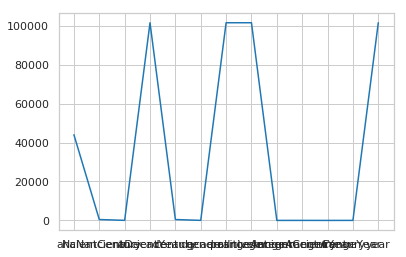

In [219]:
plt.plot(*zip(*sorted(histogram.items())))


As expected, the matching yields a "sediment" of extreme cases that need special treatment, e.g., "1756 $ [ca. 1756]". By iterating this process, we could easily address all patterns present in the dataset.

### Inspecting Spatial Locations

Because the dataset contains a lot of historical works, the _spatial_ columns deserves further attention. To get a feeling for the data, we will inspect its contents.

In [220]:
df.coverage.head(30)

0                   o.O.
1                Rinteln
2                 Cassel
3                 [S.l.]
4                    NaN
5                Stettin
6     Neukirch [Breslau]
7                   Jena
8               Augspurg
9                    NaN
10                   NaN
11             Helmstedt
12             Schleswig
13               Dreßden
14                Berlin
15                   NaN
16               Leipzig
17                  Wien
18            Wittenberg
19          Braunschweig
20                   NaN
21               Marburg
22                [S.l.]
23                Cassel
24                Bremen
25                Berlin
26               Dreßden
27             Helgoland
28     Berlin-Nikolassee
29              Nürnberg
Name: coverage, dtype: object

Unfortunately, the spatial column does not only contain cities.  Sometimes, more than one city or a even a country is contained. Another variant uses square brackets. Additionally, specific bibliographic terminology indicate that no place of publication ([s.l.]=sine loco=without place or o.O. as its German equivalent) could be determined.

### Combining Data Cleansing Utilities

In [231]:
class DataCleaner:
    # matches alphanumeric character and the underscore at the beginning of the string
    #Unicode flag is needed because of Asian character sets otherwise such signs would be considered as non-alphanumeric
    regEx_AlphaNum=re.compile("^\w",re.UNICODE)
    # checks for surrounding []; will match almost everything but Asian characters
    regEx_BracketText=re.compile("^\[[\w\?\.,\sßÄäÖöÜü]*\]",re.UNICODE)
    # checks for typical spellings of the "sine loco" abbreviation "s. l."
    regEx_SineLoco=re.compile("[sSoO]\s?\.\s?[lLoO]\s?\.?\s?",re.UNICODE)
    
    def __init__(self):
        pass
    
    def cleanAncientYearStrict(self,readData):
        if type(readData)==float:
            if not readData:
                return 0
            else:
                return readData
        else:
            p=re.compile(patterns["ancientYear"])
            m = p.search(str(readData))
            if m:
                firstAppearance=m.group()
                return firstAppearance
            else:
                return np.nan
            
    def cleanSpatialText(self,readData):
        returnedString=""
        # just in case we did not get a string, we use brute force and return NaN
        if type(readData)==float:
            return ""
        else:
            #readData=str(readData)
            m = self.regEx_AlphaNum.search(readData)
            # if the string does start with a bracket...
            if not m:
                #print "No matches at all: "+row[1]["PPN"]+"\t for: "+str(readData)
                m2 = self.regEx_BracketText.search(readData)
                if m2:
                    matchedGroup=m2.group()
                    #print "\tMatch: "+matchedGroup
                    m3=self.regEx_SineLoco.search(matchedGroup)
                    if m3:
                        #print "\tMatched Sine Loco: "+str(m3.group())
                        return ""
                    else:
                        matchedGroup=matchedGroup.replace("[","").replace("]","")
                        #print "\tFinal string: "+matchedGroup
                        returnedString=matchedGroup
            # otherwise, it may still be a "sine loco"
            else:
                m3=self.regEx_SineLoco.search(readData)
                if m3:
                    #print "\tMatched Sine Loco: "+str(m3.group())
                    return ""
                else:
                    # in any case, there might be brackets left
                    returnedString=readData.replace("[","").replace("]","")
        
        # remove variants of "u.a."            
        regex = re.compile("[uU]\.\s?[aA]\.\s?",re.UNICODE)
        returnedString=regex.sub("",returnedString)
        return returnedString

### Cleaning Data

In [232]:
dc=DataCleaner()

#for row in df.iterrows():
#    print dc.cleanSpatialText(str(row[1]["spatial"]))
    
df['spatialClean'] = df.coverage.apply(dc.cleanSpatialText)
df['dateClean'] = df.date.apply(dc.cleanAncientYearStrict)

gate 2

In [233]:
df.head(30)

,Unnamed: 0,title,creator,subject,type,format,identifier,language,date,relation,coverage,publisher,rights,PPN,spatialClean,dateClean
0,0,Brief von Fritz von Unruh an Margarete Hauptmann,"Unruh, Fritz von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771784589,de,NaN,Nachlass Gerhart Hauptmann digital,o.O.,NaN,NaN,PPN771784589,,NaN
1,1,Kindliche Klage Auf den seligen Hintritt Der w...,"Steding, Catharina Magdalena",Historische Drucke,monograph,application/mets+xml,PPN838021190,ger,1731,VD18 digital,Rinteln,Enax,CC BY-NC-SA 4.0 International,PPN838021190,Rinteln,1731
2,2,Brief an Wilhelm Speyer; 05.11.1832,"Speyer, Wilhelm",Musik,manuscript,application/mets+xml,PPN796368198,NaN,NaN,Nachlässe und Autographe digital,Cassel,NaN,NaN,PPN796368198,Cassel,NaN
3,3,"Hypomnemata Ad Joh. Rodolphi Salchlini, Profes...","Salchlinus, Johannes Rodolphus",Historische Drucke,monograph,application/mets+xml,PPN684647052,lat,1725,VD18 digital,[S.l.],NaN,CC BY-NC-SA 4.0 International,PPN684647052,,1725
4,4,Plan einer pflanzengeographischen Uebersicht v...,"Schouw, Joakim Frederik",Alexander von Humboldt,manuscript,application/mets+xml,PPN82636702X,de,NaN,Nachlass Alexander von Humboldt digital,NaN,NaN,NaN,PPN82636702X,,NaN
5,5,Christliche Predigt || Bey dem || Begrebnis We...,"Moesler, Adam",Historische Drucke,monograph,application/mets+xml,PPN782478417,lat,1599,VD16 digital,Stettin,"Möller, Martin",CC BY-NC-SA 4.0 International,PPN782478417,Stettin,1599
6,6,Brief von Erika Hamburger an Gerhart Hauptmann,"Hamburger, Erika",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771806655,de,NaN,Nachlass Gerhart Hauptmann digital,Neukirch [Breslau],NaN,NaN,PPN771806655,Neukirch Breslau,NaN
7,7,Artikel Christlicher || Lere/ so da hetten sol...,"Stoltz, Johann",Historische Drucke,monograph,application/mets+xml,PPN796434530,lat,1555,VD16 digital,Jena,"Rödinger, Christian d.Ä.",CC BY-NC-SA 4.0 International,PPN796434530,Jena,1555
8,8,"Musicalischen Divertissiments, oder In das Geh...","Bodino, Sebastiano",Musiknoten,multivolume_work,application/mets+xml,PPN667471367,NaN,1726,NaN,Augspurg,Leopold,NaN,PPN667471367,Augspurg,1726
9,9,Die drei Pintos; WeV C.8; J Anh.I.B.5,"Weber, Carl Maria von",Musiknoten,manuscript,application/mets+xml,PPN828227306,NaN,NaN,Musikhandschriften digital,NaN,NaN,NaN,PPN828227306,,NaN


In [223]:
uniqueValues(df)

Unnamed: 0;		 unique values:	146000	 total count: 146000
title;		 unique values:	97969	 total count: 145998
creator;		 unique values:	41729	 total count: 116486
subject;		 unique values:	51	 total count: 145988
type;		 unique values:	8	 total count: 146000
format;		 unique values:	1	 total count: 146000
identifier;		 unique values:	123590	 total count: 146000
language;		 unique values:	146	 total count: 126632
date;		 unique values:	582	 total count: 102006
relation;		 unique values:	2475	 total count: 141332
coverage;		 unique values:	6654	 total count: 120682
publisher;		 unique values:	13866	 total count: 77929
rights;		 unique values:	13	 total count: 92106
PPN;		 unique values:	123590	 total count: 146000
spatialClean;		 unique values:	6006	 total count: 146000
dateClean;		 unique values:	544	 total count: 145491


In [234]:
#py27 df.sort_values(by="date")

# http://stackoverflow.com/questions/40032341/pandas-sort-dataframe-by-column-with-strings-and-integers
df.groupby(df.date.apply(type) != str).apply(lambda g: g.sort('date')).reset_index(drop = True)

AttributeError: 'DataFrame' object has no attribute 'sort'

## Using Clustering for Further Data Cleansing
### Example of The Things We Are Up To

In [235]:
words = u'Berlin Balin Cölln Köln'.split()
print(words)

print("Number of words: %i" % len(words))
for i,val in enumerate(words):
    print(str(i)+":\t "+str(val.encode('utf-8')))
    

['Berlin', 'Balin', 'Cölln', 'Köln']
Number of words: 4
0:	 b'Berlin'
1:	 b'Balin'
2:	 b'C\xc3\xb6lln'
3:	 b'K\xc3\xb6ln'


__ist jaro\_distance() wirklich distance?__: nein, denn sonst müsste das folgende 0 sein

In [236]:
jaro_distance(u'Berlin',u'Berlin')

1.0

In [237]:
# http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.triu_indices.html
# 2nd parameter:
# Diagonal above which to zero elements. k = 0 (the default) is the main diagonal, k < 0 is below it and k > 0 is above."""
# r= Return the indices for the upper-triangle of an (n, m) array. da m nicht angegeben ist, wird n=m angenommen
# m is not passed, hence m=n

# sagen, dass die matrix square ist!
r=np.triu_indices(n=len(words), k=1)
r

(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))

what does this mean?
$$
A=
\begin{pmatrix}
a_{0,0} & \underline{a_{0,1}} & \underline{a_{0,2}} & \underline{a_{0,3}} \\
\cdot & a_{1,1} & \underline{a_{1,2}} & \underline{a_{1,3}} \\
\cdot & \cdot & a_{2,2} & \underline{a_{2,3}} \\
\cdot & \cdot & \cdot & a_{3,3}
\end{pmatrix}
$$

how to interpret: $a_{0,1}$, i.e., the difference between "Berlin" and "Balin"

In [238]:
def d_demo(coord):
    print(coord)
    i, j = coord
    # 1- wg. Distanz (see above)
    return 1-jaro_distance(words[i], words[j])

In [239]:
# http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.set_printoptions.html
np.set_printoptions(precision=4)

# axis (3rd parameter): 0= along y axis, 1= along x axis
r2=np.apply_along_axis(d_demo, 0, r)
r2

[0 1]
[0 2]
[0 3]
[1 2]
[1 3]
[2 3]


array([0.1778, 0.4222, 0.3889, 0.4   , 0.3667, 0.2167])

what does this mean for our matrix?
$$
A=
\begin{pmatrix}
a_{0,0} & \underline{0.1778} & \underline{0.4222} & \underline{0.3889} \\
\cdot & a_{1,1} & \underline{0.4} & \underline{0.3667} \\
\cdot & \cdot & a_{2,2} & \underline{0.2167} \\
\cdot & \cdot & \cdot & a_{3,3}
\end{pmatrix}
$$

how to interpret: $a_{0,1}$, i.e., the difference between "Berlin" and "Balin" is 0.17777778.

why not the elements on the diagonal? because...



### Working with Real Data

first, we have to define the distance function

In [240]:
def d(coord):
    #print(coord)
    i, j = coord
    #py27 return 1-jaro_distance(unicode(str(words[i]), 'utf-8'), unicode(str(words[j]), 'utf-8'))
    return 1-jaro_distance(words[i],words[j])

In [241]:
df3=df#pd27 .sort_values(by="date")#.head(100)

uniqueSpatials=df3["spatialClean"].unique()
words=None
if demoClustering:
    words=uniqueSpatials[:100] # only consider the first 100 elements for performance reasons
else: # during normal operation, we want to consider all unique spatial names...
    words=uniqueSpatials
r=np.triu_indices(len(words), 1)

the next step will take some time, hence we limited the number of spatial labels before (3-4 min.)

In [242]:
printLog("Started calculation of distance matrix for %i words..."%len(words))
# _ is the last evaluated value in an interactive shell
# axis (3rd parameter): 0= along y axis, 1= along x axis
r2=np.apply_along_axis(d, 0, r)
printLog("Finished calculations.")

[2019-02-28 20:20:25.255834]	Started calculation of distance matrix for 6006 words...
[2019-02-28 20:21:35.172113]	Finished calculations.


agglomeratives Clustering (hier nearest points, bottum-up) im gegensatz zu divisiven (top-down), das Beispiel hier nutzt den nearest point algorithm (Formel siehe https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html)

In [243]:
Z=scipycluster.linkage(r2)

if not demoClustering:
    pickle.dump( Z, open( "cluster_hierarchy_linkage_result_without_name_clustering.pickle", "wb" ) )

#Z
# scientific notation erklären

i müsste Zeile sein

A 4 by (n-1) matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

mehr infos: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/


In [107]:
#Z=pickle.load( open( "cluster_hierarchy_linkage_result.pickle", "rb" ) )
if demoClustering:
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    scipycluster.dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
    )
    plt.show()


* fcluster macht aus der clusterhierarchie wiederum "flat clusters"

In [244]:
clusters=scipycluster.fcluster(Z, t=0.1,criterion="distance")
# 2. parameter ist abhängig von der clustering strategie, -> cophenetic distance
# see: http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html
# An array of length n. T[i] is the flat cluster number to which original observation i belongs.


# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/cophenetic.html
# https://en.wikipedia.org/wiki/Cophenetic
# wir erhalten für jedes unser elemente eine cluster ID
clusters

array([4295, 1805, 1409, ..., 1425, 3132, 2242], dtype=int32)

service functions that help to establish a linkage between the cluster IDs and human readable names

In [245]:
def getWordIndex(word):
    return np.where(words==word)[0]

def getClusterID(data):
#for row in df3.iterrows():
    #data=row[1]["spatialClean"]
    #wordIndex=np.where(words==data)[0]
    #if data == u"奈良".encode('utf-8'):
    #    print "China!"
    #    wordIndex=getWordIndex(data)
    #    print wordIndex
    #    print clusters[wordIndex][0]
    wordIndex=getWordIndex(data)
    if wordIndex:
        return clusters[wordIndex][0]
    else:
        return ""

### Inspecting the Clustered Results Deeper

In [246]:
#
Z_huge=pickle.load( open( "cluster_hierarchy_linkage_result_without_name_clustering.pickle", "rb" ) )
uniqueSpatials=df3["spatialClean"].unique()
words=uniqueSpatials
len(words)

6006

In [247]:
clusters=scipycluster.fcluster(Z_huge, t=0.07,criterion="distance")
clusters

array([4790, 1997, 1549, ..., 1566, 3626, 2574], dtype=int32)

gate 3

In [248]:
df3['spatialCluster'] = df3["spatialClean"].apply(getClusterID)
grp=df3.groupby("spatialCluster")
#print grp.groups.keys()
print("Number of clusters: %i" % len(grp.groups.keys()))

Number of clusters: 4801


stichproben ...

In [249]:
grp.get_group(clusters[getWordIndex("Berlin")][0])

,Unnamed: 0,title,creator,subject,type,format,identifier,language,date,relation,coverage,publisher,rights,PPN,spatialClean,dateClean,spatialCluster
14,14,Brief von Eugen Kloepfer an Gerhart Hauptmann,"Kloepfer, Eugen",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771111754,de,NaN,Nachlass Gerhart Hauptmann digital,Berlin,NaN,NaN,PPN771111754,Berlin,NaN,2488
25,25,Brief an Jean-François Le Sueur; 17.05.1823,"Le Sueur, Jean-François",Musik,manuscript,application/mets+xml,PPN774604212,NaN,NaN,Nachlässe und Autographe digital,Berlin,NaN,NaN,PPN774604212,Berlin,NaN,2488
54,54,Brief von Hannes M. Avenarius an Gerhart Haupt...,"Avenarius, Hannes M.",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771151470,de,NaN,Nachlass Gerhart Hauptmann digital,Berlin,NaN,NaN,PPN771151470,Berlin,NaN,2488
56,56,Reisepass nach Paris,"Bourgoing, Paul Charles Amable de",Nachlässe und Autographe,manuscript,application/mets+xml,PPN769829481,fr,NaN,Nachlass Chamisso digital,Berlin,NaN,NaN,PPN769829481,Berlin,NaN,2488
68,68,Brief von Samuel Fischer an Margarete Hauptmann,"Fischer, Samuel",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771884974,de,NaN,Nachlass Gerhart Hauptmann digital,Berlin,NaN,NaN,PPN771884974,Berlin,NaN,2488
70,70,Brief an Richard Wagner; 18.05.1875,"Wagner, Richard",Musik,manuscript,application/mets+xml,PPN839444303,NaN,NaN,Nachlässe und Autographe digital,Berlin,NaN,NaN,PPN839444303,Berlin,NaN,2488
73,73,[Bildnis Heinrich Beitzke],"Günther, Hermann","Porträts, Bildmaterialien",monograph,application/mets+xml,PPN794256295,de,1865,Porträts digital,Berlin,NaN,NaN,PPN794256295,Berlin,1865,2488
95,95,Brief von Otto Brahm an Gerhart Hauptmann,"Brahm, Otto",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771176538,de,NaN,Nachlass Gerhart Hauptmann digital,Berlin,NaN,NaN,PPN771176538,Berlin,NaN,2488
113,113,Brief an Louis Spohr; 27.03.1858,"Spohr, Louis",Musik,manuscript,application/mets+xml,PPN828603871,NaN,NaN,Nachlässe und Autographe digital,Berlin,NaN,NaN,PPN828603871,Berlin,NaN,2488
135,135,Brief von Samuel Fischer an Gerhart Hauptmann,"Fischer, Samuel",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771883579,de,NaN,Nachlass Gerhart Hauptmann digital,Berlin,NaN,NaN,PPN771883579,Berlin,NaN,2488


shortcut, because we are only interested in the unique names within a cluster...

In [250]:
grp.get_group(clusters[getWordIndex("Frankfurt/Oder")][0])["spatialClean"].unique()

array(['Frankfurt a. M.', 'Frankfurt/Oder', 'Frankfurt', 'Frankfurth',
       'Franckfurt', 'Frankfurt/Main', 'Frankfurt, Oder', 'Francofurti',
       'Frankfurt, Main', 'Frankfurt a/M', 'Frankfurt (Main)',
       'Frankfurt a.M.', 'Frankfurt a/m', 'Franckfurth',
       'Franckfurt a.O.', 'Frankfurt/ M.', 'Frankofurti',
       'Frankfurt a./O.', 'Frankfurt, O', 'Frankfurt a.O.',
       'Frankfurt a/O.', 'Frankfurt a. O.', 'Frankfurt a. Oder',
       'Frankfurt a. d. Oder', 'Francoforti', 'Francofort', 'Frankfurt ',
       'Franckfurt, Main', 'Frankfurt a/Oder', 'Frankfurt a/M.',
       'Frankfurt/ Main', 'Frankfort a./M.', 'Frankfurt /M.',
       'Frankfurt a./Oder', 'Frankfurt A/M', 'Frankfurt a.  M.',
       'Frankfurt a. M. ', 'Frankfurt, M', 'Frankfurt / M',
       'Frankfurt Main', 'Francofvrti', 'Franckfurt a.M.',
       'Frankfurta a.M.', 'Frankfurt (Oder)', 'Frankfurt /Main',
       'Frankfurt / Main', 'Frankfurt a./M.', 'Frankfurt, Main?'],
      dtype=object)

semantisch sind die cluster natuerlich nicht korrekt...

a good time for inspecting all of our clusters' contents

In [251]:
for key in grp.groups.keys():
    if key:
        print(key)
        print(grp.get_group(key)["spatialClean"].unique())

1
['四明鮑氏']
2
['晦明軒']
3
['天台山']
4
['和歌山']
5
['長崎']
6
['高崎']
7
['長岡']
8
['伊勢']
9
['伊勢国津']
10
['濟南']
11
['湖南']
12
['武昌']
13
['武甯']
14
['武英殿']
15
['竹韻山房 藏']
16
['紅店山房藏板']
17
['禪山']
18
['虞山']
19
['佛山']
20
['荊州']
21
['荊州 : 荊州駐防繙譯總學']
22
['紹義堂 藏版']
23
['義善堂 藏版']
24
['玉勾草堂 藏版']
25
['玉堂']
26
['遠源堂藏版']
27
['廣州']
28
['廣州海幢寺經坊 藏板']
29
['振賢堂梓行' '振賢堂 梓行']
30
['德文堂藏板']
31
['文畬堂藏板']
32
['聚文堂藏板']
33
['貴文堂 藏板']
34
['廣慶堂 藏板']
35
['來鹿堂 藏板']
36
['春暉堂 藏板']
37
['振賢堂 藏板']
38
['積秀堂 藏板']
39
['敬書堂 梓行']
40
['經國堂藏板']
41
['元新堂藏板']
42
['近譬堂 梓']
43
['一經堂']
44
['金陵書局']
45
['金陵']
46
['山東']
47
['山東書局']
48
['廣東']
49
['廣東嘉應州']
50
['金閶']
51
['尚義堂 重刊']
52
['汲古閣 藏版']
53
['涵遠齋 梓行']
54
['敬義齋 藏板']
55
['榮華堂 存板']
56
['柏林寺 存板']
57
['杭州']
58
['集腋軒 藏版']
59
['秣陵']
60
['醉經樓書坊梓行']
61
['灌文書社 印行']
62
['廣雅書局 刻']
63
['書業堂鐫藏']
64
['寺町通姉小路 京都']
65
['あいのまち通高田町 京都']
66
['羊城']
67
['羊城 (=廣東)']
68
['順天 (北京)']
69
['??']
70
['B???']
71
['S?']
72
['VIII, 35 S.']
73
['BeVI, 261 S.']
74
['HXIV, 303 S., 1 Bl.']
75
['江寧府學衙門藏板']
76
['江寧']
77
['南海']
78
['

['la Haye']
635
['A La Haye']
636
['Le Havre']
637
['New Haven']
638
['Mantova']
639
['Mantua']
640
['Matsuyama']
641
['Herrnhut' 'Herrnhuth']
642
['Herrnhut i.Sa.']
643
['Calcutta' 'Calcutta ']
644
['Kalkutta']
645
['Rottach']
646
['Rottach-Egern']
647
['Rottach-Egern am Tegernsee']
648
['Egern a. Tegernsee']
649
['Laibach']
650
['Lambach']
651
['Laybach']
652
['Payersbach']
653
['Rastbach']
654
['Gmunden']
655
['Gmünd']
656
['Versailles']
657
['Marseille']
658
['Wernigeroda' 'Wernigerode' 'Werningerodae' 'Wernigerodae']
659
['Bétsben']
660
['Betsben']
661
['Udine']
662
['Edirne']
663
['Laubani' 'Lauban']
664
['Laubae']
665
['Lubawa']
666
['Lausanne']
667
['Ljubljana']
668
['Pesaro']
669
['Parow']
670
['Havana' 'Havanna']
671
['Habana']
672
['Ravenna']
673
['Leobschütz']
674
['Loschwitz']
675
['Loschwitz bei Dresden']
676
['Wachwitz']
677
['Osterwieck/Harz ' 'Osterwieck/Harz']
678
['Osterwieck']
679
['Hohensalza']
680
['Hohenschwangau']
681
['Brühl-Köln']
682
['Bühl']
683
['Horn' 'Hoo

['Stresa erschlossen']
1202
['Semmering erschlossen']
1203
['Semmering']
1204
['Demmin']
1205
['Flemming']
1206
['Treuenbrietzen (Mark)']
1207
['Treuenbrietzen']
1208
['Trento']
1209
['Trebnitz']
1210
['Treptow ']
1211
['Jannowitz']
1212
['Tarnowitz']
1213
['Czernowitz']
1214
['Gernewitz']
1215
['Urmia']
1216
['Umbria']
1217
['Uri']
1218
['Urbino']
1219
['Uraniborg']
1220
['Urmia, Iran']
1221
['Wismariae' 'Wimariae']
1222
['Wismar' 'Wismar ' 'Wiszmar']
1223
['Weimar']
1224
['Weymar']
1225
['Wißmar']
1226
['Weimar u.a']
1227
['Wismar i. M.']
1228
['Vinariae']
1229
['Werthemiae']
1230
['Wertheim']
1231
['Wateringbury near Maidstone']
1232
['Wateringbury']
1233
['Mulhusii']
1234
['Mülhusii']
1235
['Neuhusii']
1236
['Freising']
1237
['Frisingae']
1238
['Freysing']
1239
['Osterode']
1240
['Osteroda']
1241
['Ostende']
1242
['Lugano Park-Hotel' 'Lugano Parkhotel' 'Lugano Park Hotel']
1243
['Lugano Parkhotel Lugano']
1244
['Islebii']
1245
['Islebiae']
1246
['Saarmund']
1247
['Warmunde']
1248
[

['Krefeld']
1697
['Crefeld']
1698
['Coesfeld']
1699
['Westerland']
1700
['Westerland Sylt']
1701
['Westfalen']
1702
['Ostfalen?']
1703
['Weissenfels' 'Weißenfels' 'Weißenfelß' 'Weisenfels' 'Weissenfelsae']
1704
['Weißensee']
1705
['Wesel']
1706
['Westphalie']
1707
['Kersel']
1708
['Vindobonae']
1709
['Vidobonae']
1710
['Cüstrin' 'Cüstrini' 'Cürstin']
1711
['Custrini']
1712
['Küstrin']
1713
['Erfordiæ' 'Erfordi']
1714
['Erfurt' 'Erffurt' 'Erfurt ' 'Erfurth' 'Erfordiae' 'Erffurth' 'Erfurti'
 'Erffurdt' 'Erffordiae' 'Erffurti' 'Erfurdt' 'Erffuhrt' 'Erfurt.'
 'Erfurt?' 'Erdfurti' 'Erffurdi' 'Erffurdiae' 'Erfurts' 'Erffurthi'
 'Erffurd' 'Erfurdiae' 'Erffut']
1715
['Erffordt']
1716
['Erfurt u.a']
1717
['Erphordiae']
1718
['Erffurtensis']
1719
['Erphurti']
1720
['London ermittelt']
1721
['Monaco ermittelt']
1722
['Bad Gastein Hotel Weismayr']
1723
['Bad Gastein Hotel Regina']
1724
['Bad Gastein Der Kaiserhof']
1725
['Vilʹno']
1726
["Vil'no"]
1727
['Bad Gastein']
1728
['Badgastein']
1729
['Bad

['Kielce']
2186
['Salfeldae' 'Salfeldiae']
2187
['Salfeld' 'Saalfeld' 'Saalfeldt']
2188
['Saalfeld a.S.']
2189
['Bilfeldiae']
2190
['Bielefeld ' 'Bielefeld']
2191
['Bielfeld' 'Bilefeld']
2192
['Birkenfeld']
2193
['Bitterfeld']
2194
['Bielefeld & Leipzig']
2195
['Biel']
2196
['Tiel']
2197
['Kiev']
2198
['Kehl']
2199
['Kīev']
2200
['Saalfeld i. Thür.']
2201
['Warmbrunn mutmaßlich']
2202
['Hamburg mutmaßlich']
2203
['Halle Ad Salam' 'Halae Ad Salam']
2204
['Halae ad Salam']
2205
['Hagenau']
2206
['Hagen']
2207
['Hanau']
2208
['Hanaw']
2209
['Halae Saxonum' 'Halae-Saxonum' 'Hallae-Saxonum']
2210
['Halae Saxon.' 'Halae-Saxon.' 'Halae Sax.']
2211
['Hallis Saxoniae' 'Halis Saxoniae']
2212
['Hallis-Saxonum' 'Hallis Saxonum' 'Halis Saxonum']
2213
['Hallis Saxon.' 'Hallis Sax.']
2214
['Hall. Saxon.']
2215
['Hal. Sax.']
2216
['Halæ-Magdeburgicæ' 'Halæ Magdeburgicæ' 'Hallæ Magdeburgicæ']
2217
['Hall. Magdeburg.']
2218
['Halle im Magdeburgischen' 'Halle im Magdeburgschen'
 'Halle, im Magdeburgische

['Paderbornae' 'Paderborn' 'Paderborn ']
2453
['Herborn']
2454
['Herbornae']
2455
['Berlin-Dahlem' 'Berlin Dahlem']
2456
['Berlin Haus Dahlem']
2457
['Berlin-Pankow']
2458
['Berlin-Lankwitz']
2459
['Verona' 'Veronae']
2460
['Verona, Metz']
2461
['Bresslaw' 'Breslaw']
2462
['Breslau' 'Breßlau' 'Breβlau' 'Breslau ' 'Breslau?' 'Brelau']
2463
['Breslae']
2464
['Breßlaw']
2465
['Preßlaw']
2466
['Breslav.']
2467
['Bronsvic']
2468
['Brunsvic']
2469
['Brunswick']
2470
['Brieg' 'Briege' 'Briegk']
2471
['Bremen']
2472
['Bremae']
2473
['Bregae']
2474
['Brigae']
2475
['Bremem']
2476
['Brixlegg']
2477
['Brunsvigae']
2478
['Brzeg']
2479
['Briey']
2480
['Bernsheim' 'Bensheim']
2481
['Prenzlau' 'Prentzlau']
2482
['Überlingen a.B.']
2483
['Überlingen']
2484
['Bregenz']
2485
['Bergen']
2486
['Berolino' 'Beroloni']
2487
['Berlin W.' 'Berlin, W.']
2488
['Berlin' 'Berolini' 'Berlino' 'Bernae' 'Berne' 'Bern' 'Berlin ' 'Berlin?'
 'Berna' 'Berlini' 'Berln' 'Berin' 'Berlin ?' 'Bernau' 'Berlien']
2489
['Berlin 

 'Frankfurt /Main' 'Frankfurt / Main' 'Frankfurt a./M.' 'Frankfurt, Main?']
2725
['Francfort']
2726
['Franḳfurt']
2727
['Frankfort']
2728
['Franckfurt am Mayn' 'Frankfurt am Main' 'Frankfurt am Mayn'
 'Franckfurt am Main' 'Franckfurth am Mäyn' 'Franckfurt am Mäyn'
 'Franckfort am Mayn' 'Franckfurth am Mayn' 'Franfurt am Main'
 'Frankfurt a. Main' 'Franckfurt am Meyn' 'Frankfurt am Maÿn'
 'Frankfurth am Mayn']
2729
['Franckfurt an Mäyn']
2730
['Frankfurt-O.']
2731
['Frankfurth a. d. O.']
2732
['Francfort s./M.']
2733
['Francfort s/m']
2734
['Francfort a M']
2735
['Frankfurt/Main, 1562']
2736
['Francofordiae']
2737
['Francofordiae March.']
2738
['Frankfurt &lt;Main&gt;']
2739
['Frankfurt (Oder) ermittelt']
2740
['Francfort sur le Mein' 'Francfort sur le Mayn' 'Francfort sur le Main'
 'Francfort Sur Le Mein']
2741
['Francfort-sur-Mein']
2742
["Francfort sur l'Oder"]
2743
['A Francfort sur le Mein']
2744
['Francofurti & Lipsiae']
2745
['Magdeburg' 'Magdeburgi' 'Magdeburgk' 'Magdeburg?' 'Ma

['Altenburg' 'Altenburgi' 'Altenburg?' 'Altenburgh' 'Altenburgk']
3000
['Altenberg']
3001
['Flensburg' 'Flensburgii' 'Flensborg' 'Flensbourg' 'Flensburgi']
3002
['Flenßburg']
3003
['Valkenburg']
3004
['Falckenburg']
3005
['Bamberg' 'Bamberg ']
3006
['Bambergae']
3007
['Blanckenburg' 'Blankenburg']
3008
['Brandenburg a. H.' 'Brandenburg a.H.' 'Brandenburg a. d. H.'
 'Brandenburg a.d.H.']
3009
['Brandenburg a. Havel']
3010
['Brandenburg a. Inn']
3011
['Brandeburgi' 'Brandenburg' 'Brandenburgi' 'Brandenburg?' 'Brandebourg'
 'Brandebvrgi']
3012
['Bernburgi' 'Bernburg' 'Berlebourg' 'Berlenburg']
3013
['Brandenburg <Havel>']
3014
['Braunenburg am Inn']
3015
['Brandenburg an der Havel']
3016
['Oranienburg']
3017
['Orangebourg']
3018
['Oranien']
3019
['Brandenb.']
3020
['Würzburg' 'Würtzburg' 'Würzburg ']
3021
['Wirtzburg' 'Wirzburg']
3022
['Wurzburg']
3023
['Oldenburg i. Gr.' 'Oldenburg i.Gr.']
3024
['Quedlinburg' 'Quedlinburgi' 'Qedlinburg ' 'Quedlinburg ' 'Quedlimburg'
 'Quedlimburgi' 'Qved

['Jemen']
3307
['Cellis']
3308
['Hameln']
3309
['Sundii']
3310
['Rapallo']
3311
['Zwolle']
3312
['Linum']
3313
['Berlin-Eichkamp']
3314
['Salem']
3315
['Cöthen (Anhalt)']
3316
['Styrae']
3317
['Reims']
3318
['Breda']
3319
['Syrien']
3320
['Turin']
3321
['Novum Brandeburgum']
3322
['Pilsen']
3323
['Ceulen']
3324
['Cilli']
3325
['Torino']
3326
['Sorau']
3327
['Altona-Ottensen']
3328
['Olten']
3329
['Lesnae']
3330
['Soltau']
3331
['Salta']
3332
['Lötzen']
3333
['Gnadau']
3334
['Menton']
3335
['Loebau']
3336
['Padova']
3337
['Brünig']
3338
['Brünn']
3339
['Callao']
3340
['Breuil']
3341
['Styrum']
3342
['Samter']
3343
['Kempten-München']
3344
['Naples']
3345
['Wurzen']
3346
['Paretz']
3347
['Prutz']
3348
['Helder']
3349
['Lips.']
3350
['Monaco']
3351
['Macao']
3352
['Borna ']
3353
['Menen']
3354
['Eichen']
3355
['Mindæ']
3356
['Indien']
3357
['Lican']
3358
['Videnʹ']
3359
['Salmur']
3360
['s`Hage']
3361
['Dahlem']
3362
['Berlin Hotel "Der Fürstenhof"']
3363
['Bad Eilsen erschlossen']
3364
[

['Simferopol']
3906
['Strömstad mutmaßlich']
3907
['San Borja']
3908
['Dorlisheim']
3909
['Kephissia']
3910
['Ombropoli']
3911
['Kensington']
3912
['Maria-Cell']
3913
['Bevilacqua']
3914
['Kakogünäkopolis']
3915
['Golnow']
3916
['Herakleion']
3917
['Wasserdrüdingen']
3918
['Krakau']
3919
['Nowogrodek']
3920
['Ninive']
3921
['St. Goarshausen']
3922
['Feldhuysen']
3923
['Montélimar']
3924
['Pillkallen']
3925
['Lannion Plouaret']
3926
['Kaufbeuren']
3927
['Billerbeck']
3928
['Munich et Berne']
3929
['Haßfelden ']
3930
['Apenrade']
3931
['Ahrenshoop']
3932
['Gräfenhainichen']
3933
['Modegascar']
3934
['Inzigkofen']
3935
['Göteborg']
3936
['Jüterbog']
3937
['Kjustendža']
3938
['Leitmeritz']
3939
['Zeesen']
3940
['Großdeuben']
3941
['Seestetten']
3942
['Kremʺjanec']
3943
['Rheinfelden Salinenhotel']
3944
['Tiguri']
3945
['Uelzen']
3946
['Dessau - Kochstedt']
3947
['Serampore']
3948
['Cambridge']
3949
['Zobten']
3950
['Nantes']
3951
['Botiguery']
3952
['Leipzigermesse i.e. Prag']
3953
['Rigae

['In Regio-Borussorum-Monte']
4483
['Bockwitz (Kr. Liebenwerda)']
4484
['Positano Salerno']
4485
['Oetingae Rhetorum']
4486
['Roßtrappe']
4487
['Grenzgebiet Bayern/Österreich']
4488
['En Biennē tēs Austrias']
4489
['Peking i.e. Thal-Ehrenbreitstein']
4490
['Mödingen, Kloster Maria Medingen']
4491
['Girgenti Hotel Belvedere']
4492
['El Kantara Postkarte von']
4493
['Veste Cüstrin']
4494
['Singen-Hohentwiel']
4495
['Stratford on Avon']
4496
['Wenningstedt Sylt']
4497
['Köln (Kartause St. Barbara)']
4498
['Hotel Colombo']
4499
['Grenoble']
4500
['Sizilien']
4501
['Moosach b. Grafing']
4502
['Grenflug im Gänsserich']
4503
['Loja <Provinz Granada>']
4504
['Varenna vermutlich Bildpostkarte von Varenna']
4505
['Woolwich']
4506
['Kitzbühel']
4507
['Flottbeck']
4508
['Esztergom']
4509
['Blumeshof']
4510
['Morogoro']
4511
['Olomucii']
4512
['Dabroszyn']
4513
['Uithuizen']
4514
['Im Orient von Berlin']
4515
['Venezia San Marco, Hotel Splendid Corso']
4516
['Schwarzach bey Culmbach']
4517
['Darmst

['歸安']
4792
['星沙']
4793
['横浜']
4794
['根来']
4795
['香港']
4796
['闽']
4797
['奈良']
4798
['湘鄉']
4799
['嵯峨']
4800
['閩']
4801
['儀徵']


* synonym: ['Francofurti Ad Viadrum'] as a Latin translation of Frankfurt/Oder would be long to the cluster with ['Frankfurt/Main' 'Frankfurt/Oder' 'Frankfurt, Main' 'Frankfurt, O']
* however, Frankfurt/Main and Frankfurt/Oder are to differt cities
* ['Francofurti'] is in a 1-element cluster
* ['C\xc3\xb6lln an der Spree'] is a synonym for Berlin
* duplicate entries: ['Hallae Magdeburgicae  Hallae Magdeburgicae'] 1-gram und 2-gram vergleichen!
* auf Enthaltensein von Berlin prüfen
* St. Sankt Saint Bad als Präfix behandeln

In [252]:
# backup of the dataframe as we are going to remove data from the spatialClean column
pickleCompress('./picklez/df3_unclean_spatials.picklez',df3)
# if you want to continue from here, uncomment the following line
#df3=pickleDecompress('./picklez/df3_unclean_spatials.picklez')

[2019-02-28 20:23:11.413009]	Pickling to './picklez/df3_unclean_spatials.picklez'
[2019-02-28 20:23:19.901510]	Pickling done.


### Further Cleaning

on some occasions, we have to deal with spatialClean entries that contain multiple cities

In [253]:
# PPN836134109 contains multiple cities
df3[df3.PPN=="PPN836134109"]

,Unnamed: 0,title,creator,subject,type,format,identifier,language,date,relation,coverage,publisher,rights,PPN,spatialClean,dateClean,spatialCluster
142017,142017,Ludwig Ernst von Faramond seltsame aber wohlme...,"Faramond, Ludwig Ernst",Historische Drucke,volume,application/mets+xml,PPN836134109,ger,1732,VD18 digital,Leipzig,Monath,NaN,PPN836134109,Leipzig,1732,2042


handle compound city names (only today's German cities to give an example)

* to avoid superfluous comparisons we split the city names by their leading character

In [254]:
cityNameFile_DE = open('citynames.txt', 'r')
cityNGramsDE=dict()
lastLetter=""
for line in cityNameFile_DE:
    if not line.startswith("//"):
        r=line.replace("\n","").strip()
        if " " in r:
            #print r
            if not lastLetter==r[0].lower():
                lastLetter=r[0].lower()
                cityNGramsDE[lastLetter]=[]
            cityNGramsDE[lastLetter].append(r)
            #py27 cityNGramsDE[lastLetter].append(r.decode("utf-8"))

in case of multiple cities, we will only consider the first one

In [255]:
# Various test cases of city names
#s1="Frankfurt, O"
#s2='Hallae Magdeburgicae  Hallae Magdeburgicae'
#s3="Leipzig  Paris  Petersburg  London"
#s4='Franckfurt  N\xc3\xbcrnberg  Leipzig'
#s5='Freiburg i.Br. ' # not matched correctly but okay
#s6='Frankfurt/Main' 
#s7='Frankfurt, Main'

#s8='Bad Nauheim'
#s9='Rottach-Egern am Tegernsee'
#s10='Egern a. Tegernsee'
#s11="Plancy-L'Abbaye"
#s12='Bad Nauheim Sankt'
#s13="Saint Tropez"
#s14="Sankt Augustin"
#s15="Sankt-Augustin"
#s16="St.-Whatever"
#s17="St. Whatever"

def pickFirstCity(testString):
# checks if the testString contains multiple cities separated by whitespaces and returns the first city respecting city name prefixes such as Saint, St. etc.
    #py27 testString=unicode(testString,"utf-8")
    #print type(testString)
    #testString=testString.decode('unicode-escape')
    
    # matches for whitespaces that are NOT preceded by the following signs: ", ; : \ / " denoted in the regex by (?<!...)
    regex = re.compile("(?<![,;:\\\/])\s*",re.UNICODE)

    # matches various city prefix such as Saint etc.
    spatialPrefixRegExes=[]
    spatialPrefixRegExes.append(re.compile("^[Bb][Aa][Dd]\s*",re.UNICODE))
    spatialPrefixRegExes.append(re.compile("^[Ss][Aa][Nn][Kk][Tt][\s-]*",re.UNICODE))
    spatialPrefixRegExes.append(re.compile("^[Ss][Aa][Ii][Nn][Tt][\s-]*",re.UNICODE))
    spatialPrefixRegExes.append(re.compile("^[S][t]\.[\s-]*",re.UNICODE))
    spatialPrefixRegExes.append(re.compile("^[Dd][Ee][Nn]\s*",re.UNICODE))
    spatialPrefixRegExes.append(re.compile("^[Ne][Ee][Ww]\s*",re.UNICODE))

    #print "Tested string: >%s<" % testString
    
    if allowExactStringMatching:
        # checks whether the spatial is known to consist of more than one word
        # for the sake of efficiency we will only check for spatial names with the same leading character (see above)
        lowTestString=testString.lower()
        if len(lowTestString)>=1:
            currentLetter=lowTestString[0]
            if currentLetter in cityNGramsDE:
                for cityName in cityNGramsDE[currentLetter]:
                    foundIndex=lowTestString.find(cityName.lower())
                    #regexCity = re.compile("^\b"+cityName.lower()+"\b",re.UNICODE)
                    r=re.match("\\b"+cityName.lower()+"\\b",lowTestString)
                    #if foundIndex==0:
                    if r is not None:
                        #print "Compound city: "+cityName+" @ "+str(foundIndex)
                        return cityName
    
    # general purpose splitting
    foundSpatialPrefix=False
    for i,r in enumerate(spatialPrefixRegExes):
        m = r.search(testString)
        if m:
            #print "Prefix %i" %i
            foundSpatialPrefix=True
    #print type(testString)
    m = regex.split(testString)
    
    if foundSpatialPrefix:
        if len(m)>1:
            return m[0]+" "+m[1]
    else:
        return m[0]

print(pickFirstCity('Bad Königshofen im Grabfeld'))   

Bad Königshofen im Grabfeld


bevor man die erste stadt auswählt muss man, sich die einträge mit mehr als einer stadt speichern.

In [256]:
counter=0
maxItems=df3.shape[0]

multipleCitiesPPN=dict()

printLog("Processing multiple spatial names entries...")
for row in df3.iterrows():
    ppn=str(row[1]["PPN"])  
    spatialC=str(row[1]["spatialClean"])
    multipleCitiesPPN[ppn]=[]
    
    counter=counter+1
    if counter%10000==0:
        printLog("\tProcessed %i items of %i"%(counter,maxItems))
                
    if spatialC:
        origSpatialClean="<"+spatialC+"> ("+ppn+")"
        f=pickFirstCity(spatialC)
        loopCount=1
        while f:
            #print f
            multipleCitiesPPN[ppn].append(f)
            #py27 spatialC=spatialC.decode("utf-8")
            spatialC=re.sub('\s+',' ',spatialC.replace(f,u"")).strip()
            #py27 spatialC=spatialC.encode("utf-8")
            if spatialC:
                #print "<"+f.encode("utf-8")+"> | <"+spatialC+">"
                #f=spatialC
                f=pickFirstCity(spatialC)
            else:
                #print origSpatialClean
                break
            loopCount=loopCount+1
            if loopCount>15:
                printLog("Max. loop count reached @ "+origSpatialClean+ " with last f of: <"+f+">")
                break
        #if f:
            #spatialC=spatialC.decode("utf-8")
            #spatialC=spatialC.replace(f,u"").strip()
            #spatialC=spatialC.encode("utf-8")
            #if spatialC:
                #print origSpatialClean
                #print "<"+f.encode("utf-8")+"> | <"+spatialC+">"
                #counter=counter+1
                #if counter==10:
                    #break
    #print ppn
    #break
printLog("Done.")
pickleCompress("./picklez/multipleSpatialNamesPerPPN.picklez",multipleCitiesPPN)

[2019-02-28 20:23:35.684588]	Processing multiple spatial names entries...


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: FutureWarning: split() requires a non-empty pattern match.


[2019-02-28 20:23:37.138460]		Processed 10000 items of 146000
[2019-02-28 20:23:38.390103]		Processed 20000 items of 146000
[2019-02-28 20:23:39.672168]		Processed 30000 items of 146000
[2019-02-28 20:23:40.885355]		Processed 40000 items of 146000
[2019-02-28 20:23:42.044548]		Processed 50000 items of 146000
[2019-02-28 20:23:43.343432]		Processed 60000 items of 146000
[2019-02-28 20:23:44.587863]		Processed 70000 items of 146000
[2019-02-28 20:23:45.833217]		Processed 80000 items of 146000
[2019-02-28 20:23:47.113929]		Processed 90000 items of 146000
[2019-02-28 20:23:48.332673]		Processed 100000 items of 146000
[2019-02-28 20:23:49.533910]		Processed 110000 items of 146000
[2019-02-28 20:23:50.802038]		Processed 120000 items of 146000
[2019-02-28 20:23:52.023886]		Processed 130000 items of 146000
[2019-02-28 20:23:53.239621]		Processed 140000 items of 146000
[2019-02-28 20:23:54.002703]	Done.
[2019-02-28 20:23:54.003197]	Pickling to './picklez/multipleSpatialNamesPerPPN.picklez'
[201

display the PPNs with multiple spatial names

In [257]:
for ppn in multipleCitiesPPN:
    array=multipleCitiesPPN[ppn]
    if len(array)>1:
        #py27 print(ppn+":\t"+"; ".join(array).encode("utf-8"))
        print(ppn+":\t"+"; ".join(array))
        #for e in array:
            #print e.encode("utf-8")

PPN771806655:	Neukirch; Breslau
PPN775039780:	Rapallo; erschlossen
PPN739752820:	Le; Mesnil-le-Roi; ermittelt
PPN771076185:	San; Remo; Pension; Aurora
PPN83510933X:	Frankfurt; a.; M.
PPN771889712:	Grunewald; bei; Berlin
PPN717269663:	Grünberg; i.; Schl.
PPN669011150:	Francofurti; ad; Virum
PPN771822944:	Rheinfelden; Salinenhotel
PPN771205058:	Düsseldorf; Kaiserwerth
PPN734107498:	Frankfurt; an; der; O
PPN771888481:	Grunewald; bei; Berlin
PPN739755595:	Braine; (Aisne); ermittelt
PPN77506730X:	Blankenese; bei; Hamburg
PPN771896786:	Berlin; vermutlich
PPN771198418:	Berlin; Poststempel
PPN733809987:	Cölln; am; Rhein
PPN73975503X:	Paris; Poststempel
PPN77112774X:	Berlin-Charlottenburg; Pension; Bavaria
PPN771613911:	Franckfurt; am; Mayn
PPN739745344:	Berlin; ermittelt
PPN77120471X:	Kaiserswerth; am; Rhein
PPN775067962:	Karlsbad; Hotel; Bristol
PPN771894457:	Rovio; Poststempel
PPN775066605:	Bad Warmbrunn; Schlesien
PPN71611691X:	Baden bei; Wien
PPN769813976:	Schöneberg; (Berlin)
PPN771147279

PPN771168713:	Siusi; Seiser; Alm
PPN771836104:	Berlin; -; Schöneberg
PPN771827881:	Berlin; Hotel; Adlon
PPN881874302:	Los; Angeles
PPN638513456:	Francofurti; ad; Virum
PPN739749854:	Berlin; vermutlich
PPN815575483:	Turnbridge; Wells
PPN739752626:	Plancy-L'Abbaye; ermittelt
PPN671900188:	Frankfurt; a.M.
PPN857734474:	Halae; Magdeburgicae
PPN729870685:	V; Praze
PPN771839839:	Kloster, Hiddensee; erschlossen
PPN771187440:	Ladis; Kurhaus
PPN739755137:	Le; Mesnil-le-Roi; ermittelt
PPN77182078X:	Merseburg; Poststempel
PPN771884273:	Flims; Hotel; Waldhaus
PPN771160410:	Bln.; Schöneberg; Berlin
PPN721916538:	Hallis; Suevicis
PPN74723101X:	Frankfurt; am; Mayn
PPN771827466:	Porto; Santo; Stefano
PPN771155204:	Kloster; (Hiddensee); erschlossen
PPN768256461:	Hradec; Králowé
PPN790627450:	Frankfurt; &lt;Main&gt;
PPN3355198285:	東都; 江戸
PPN771225997:	Kaiserswerth; am; Rhein; Düsseldorf
PPN771199708:	Dubrovnik; Postkarte
PPN739757857:	Berlin; vermutlich
PPN638613221:	Offenbach; s/M
PPN771819412:	Tiberia

PPN77124147X:	Stockholm; Grand; Hotel
PPN771155646:	Agnetendorf; erschlossen
PPN771102992:	Locarno-Monti; Villa; Jorana
PPN880297794:	V; Moskvě
PPN877738718:	Marpurgi; Cattorum
PPN877739285:	Giessae; Hessorum
PPN1002920299:	Franckfurt; am; Meyn
PPN884638154:	Marburgi; Cattorum
PPN884638693:	Marburgi; Cattorum
PPN884374297:	Marpurgi; Cattorum
PPN895256444:	Hallae; Magdburgicae
PPN895194155:	Halae; Magdeburgicae
PPN886275792:	Francofurti; Ad; Viadrum
PPN739748491:	Berlin; vermutlich
PPN838207618:	Traiecti; Ad; Viadrum
PPN856657441:	Franckfurt; am; Mayn
PPN771826990:	San; Domenico; ermittelt; near; Florenz, Villa; Fontanella
PPN775067431:	Pankow; bei; Berlin
PPN771897804:	Berlin; -; Halensee
PPN771239548:	Snowdonia-Nationalpark; Pen-y-Pass
PPN640489796:	Duisburgi; ad; Rhenum
PPN771213506:	Zürich; Poststempel
PPN771815158:	Berlin; ermittelt
PPN771817231:	Herzfelde; Poststempel
PPN771240651:	Oxford; Poststempel
PPN771888872:	Grunewald; bei; Berlin
PPN77178340X:	Detmold; Poststempel
PPN77116

PPN771124465:	Stralsund; Poststempel
PPN871296837:	Halae; Ad; Salam
PPN771165706:	Venise; Grand; Hotel; -
PPN771151691:	Plauen; Poststempel
PPN770914357:	La; Roche-sur-Yon; Poststempel
PPN771782985:	Detmold; Poststempel
PPN771084226:	Hiddensee; / Neuendorf
PPN739751980:	Plancy-L'Abbaye; ermittelt
PPN771889720:	Grunewald; bei; Berlin
PPN771205899:	Düsseldorf; Kaiserwerth
PPN768554225:	Francofurti; ad; Virum
PPN891237763:	Erfurt; u.a
PPN792355237:	Bonn; (Sternwarte)
PPN771838115:	Berlin; Poststempel
PPN775068365:	Berlin; ermittelt
PPN818884800:	Frankfurt; /M.
PPN739756869:	Paris; Poststempel
PPN654802335:	Franckfurt; an; der; O
PPN627510639:	Mayence; Et; Anvers
PPN771160062:	Mittel; Schreiberhau
PPN771887388:	Grunewald; bei; Berlin
PPN3343668516:	bei; jing
PPN771154968:	Kloster; (Hiddensee); mutmaßlich
PPN859684962:	Brandenburg; <Havel>
PPN788434748:	Stadt; am; Hoff
PPN771176775:	Wien; Imperialhotel
PPN771157185:	Königsberg; Poststempel
PPN771925115:	Warschau; i.e.; Berlin
PPN771185294:	

* interessante PPN: PPN780104447; PPN771083963; PPN792355296; PPN735012342
* Umgang mit ? klären
* Einträge des Arrays übeprüfen: Propositionen (auch Mehrwerte-Komposita wie "an der"), Nicht-Ortsnamen (z.B. Poststempel)

* finally, we can extract the first cities

* next cell might take ca. 3 min. with list-based exact matching

In [258]:
printLog("Detecting and picking first cities...")
uniqueSpatials=df3["spatialClean"].unique()
beforeClusterClean=len(uniqueSpatials)
df3["spatialClean"]=df3["spatialClean"].apply(pickFirstCity)
printLog("Done.")

if allowExactStringMatching:
    pickleCompress("./picklez/df3_exactmatch_cities.picklez",df3)
else:
    df3=pickleDecompress("./picklez/df3_exactmatch_cities.picklez")
printLog("Done.")

[2019-02-28 20:24:26.229964]	Detecting and picking first cities...


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: FutureWarning: split() requires a non-empty pattern match.


[2019-02-28 20:24:31.405566]	Done.
[2019-02-28 20:24:31.406066]	Pickling to './picklez/df3_exactmatch_cities.picklez'
[2019-02-28 20:24:39.908422]	Pickling done.
[2019-02-28 20:24:39.909464]	Done.


In [259]:
df3[df3.coverage.notnull()].head(20)

,Unnamed: 0,title,creator,subject,type,format,identifier,language,date,relation,coverage,publisher,rights,PPN,spatialClean,dateClean,spatialCluster
0,0,Brief von Fritz von Unruh an Margarete Hauptmann,"Unruh, Fritz von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771784589,de,NaN,Nachlass Gerhart Hauptmann digital,o.O.,NaN,NaN,PPN771784589,,NaN,
1,1,Kindliche Klage Auf den seligen Hintritt Der w...,"Steding, Catharina Magdalena",Historische Drucke,monograph,application/mets+xml,PPN838021190,ger,1731,VD18 digital,Rinteln,Enax,CC BY-NC-SA 4.0 International,PPN838021190,Rinteln,1731,1997
2,2,Brief an Wilhelm Speyer; 05.11.1832,"Speyer, Wilhelm",Musik,manuscript,application/mets+xml,PPN796368198,NaN,NaN,Nachlässe und Autographe digital,Cassel,NaN,NaN,PPN796368198,Cassel,NaN,1549
3,3,"Hypomnemata Ad Joh. Rodolphi Salchlini, Profes...","Salchlinus, Johannes Rodolphus",Historische Drucke,monograph,application/mets+xml,PPN684647052,lat,1725,VD18 digital,[S.l.],NaN,CC BY-NC-SA 4.0 International,PPN684647052,,1725,
5,5,Christliche Predigt || Bey dem || Begrebnis We...,"Moesler, Adam",Historische Drucke,monograph,application/mets+xml,PPN782478417,lat,1599,VD16 digital,Stettin,"Möller, Martin",CC BY-NC-SA 4.0 International,PPN782478417,Stettin,1599,2618
6,6,Brief von Erika Hamburger an Gerhart Hauptmann,"Hamburger, Erika",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771806655,de,NaN,Nachlass Gerhart Hauptmann digital,Neukirch [Breslau],NaN,NaN,PPN771806655,Neukirch,NaN,945
7,7,Artikel Christlicher || Lere/ so da hetten sol...,"Stoltz, Johann",Historische Drucke,monograph,application/mets+xml,PPN796434530,lat,1555,VD16 digital,Jena,"Rödinger, Christian d.Ä.",CC BY-NC-SA 4.0 International,PPN796434530,Jena,1555,1980
8,8,"Musicalischen Divertissiments, oder In das Geh...","Bodino, Sebastiano",Musiknoten,multivolume_work,application/mets+xml,PPN667471367,NaN,1726,NaN,Augspurg,Leopold,NaN,PPN667471367,Augspurg,1726,2441
11,11,Disputationum Physiologicarum || SEPTIMA.|| DE...,"Liddell, Duncan",Historische Drucke,monograph,application/mets+xml,PPN67221766X,lat,1597,VD16 digital,Helmstedt,NaN,CC BY-NC-SA 4.0 International,PPN67221766X,Helmstedt,1597,1645
12,12,Hoch-Fürstl. Schleßwig-Holsteinische Verordnun...,"Christian August < Holstein-Gottorf, Herzog>",Historische Drucke,monograph,application/mets+xml,PPN817007857,ger,1711,VD18 digital,Schleswig,Holwein,CC BY-NC-SA 4.0 International,PPN817007857,Schleswig,1711,2594


gate 4

check our results

In [260]:
uniqueSpatials=df3["spatialClean"].unique()
afterClusterClean=len(uniqueSpatials)
words=uniqueSpatials
#words
print("Before cluster cleaning: %i" % beforeClusterClean)
print("After cluster cleaning: %i" % afterClusterClean)

Before cluster cleaning: 6006
After cluster cleaning: 4175


In [261]:
def d2(coord):
    #print "Altered d()"
    #print coord
    i, j = coord
    #print(str(type(words[i]))+" : "+str(type(words[j])))
    #py27 if not type(words[i])==unicode:
        #print "bumm "+ str(words[i])+" :"+str(i)
    if not words[i]:
        return 1.0
    #py27 if not type(words[j])==unicode:
        #print "bamm " + str(words[j])+" :"+str(j)
    if not words[j]:
        return 1.0
    dist=1 - jaro_distance(words[i],words[j]) # because jaro_distance is actually returning a similarity
    #print "%s vs. %s -> %f" %(words[i],words[j],dist)
    #return 1 - jaro_distance(unicode(str(words[i]), 'utf-8'), unicode(str(words[j]), 'utf-8'))
    return dist

def d3(coord):
    #print "Altered d()"
    #print coord
    i, j = coord
    #print str(type(words[i]))+" : "+str(type(words[j]))
    #py27 if not type(words[i])==unicode:
        #print "bumm "+ str(words[i])+" :"+str(i)
    if not words[i]:
        return 1.0
    #py27 if not type(words[j])==unicode:
        #print "bamm " + str(words[j])+" :"+str(j)
    if not words[j]:
        return 1.0
    dist=1 - jaro_winkler(words[i],words[j]) # because jaro_distance is actually returning a similarity
    #print "%s vs. %s -> %f" %(words[i],words[j],dist)
    return dist

vielleicht nötig, das ganze außerhalb des jupyter-notebooks auszuführen, wenn es time out probleme (siehe console) gibt

In [262]:
if not demoClustering:
    printLog("Calculating Jaro distances...")
    r=np.triu_indices(afterClusterClean, 1)
    r2=np.apply_along_axis(d2, 0, r)
    Z=scipycluster.linkage(r2)
    pickle.dump( Z, open( "cluster_hierarchy_linkage_result.pickle", "wb" ) )
    
    # Jaro-Winkler
    printLog("Calculating Jaro-Winkler distances...")
    r=np.triu_indices(afterClusterClean, 1)
    r3=np.apply_along_axis(d3, 0, r)
    Z3=scipycluster.linkage(r3)
    pickle.dump( Z3, open( "cluster_hierarchy_linkage_jw_result.pickle", "wb" ) )
    #pickle.dump( r2, open( "r2.pickle", "wb" ) )
    printLog("Distance matrices created. Done.")
    # (END_HERE_FOR_LINKAGE)

[2019-02-28 20:24:54.933051]	Calculating Jaro distances...
[2019-02-28 20:25:29.673042]	Calculating Jaro-Winkler distances...
[2019-02-28 20:26:04.645675]	Distance matrices created. Done.


### Working with the "Final" Data

In [263]:
## load stuff
printLog("Loading final data...")
# Jaro
#Z_huge=pickle.load( open( "cluster_hierarchy_linkage_result.pickle_bak", "rb" ) )
# Jaro-Winkler
Z_huge=pickle.load( open( "cluster_hierarchy_linkage_jw_result.pickle", "rb" ) )

#r2=pickle.load( open( "r2.pickle", "rb" ) )
printLog("Loading final data completed.")

[2019-02-28 20:26:04.651782]	Loading final data...
[2019-02-28 20:26:04.653943]	Loading final data completed.


group records by their cluster and display results

In [264]:
uniqueSpatials=df3["spatialClean"].unique()
words=uniqueSpatials
print(len(words))
# Jaro
#clusters=scipycluster.fcluster(Z_huge, t=0.115,criterion="distance") # je höher d, desto mehr kommt in 1 cluster
# Jaro-Winkler
clusters=scipycluster.fcluster(Z_huge, t=0.095,criterion="distance") # je höher d, desto mehr kommt in 1 cluster

print(clusters)
df3['spatialCluster'] = df3["spatialClean"].apply(getClusterID)
grp=df3.groupby("spatialCluster")

print("Number of clusters: %i" % len(grp.groups.keys()))

# save the clusters' names (for simplicity, we just take the name of the cluster's first element)
clusterNames=dict()
maxKey=-1
for key in grp.groups.keys():
    if key:
        if key>maxKey:
            maxKey=key
        if not key in clusterNames:
            clusterNames[key]=grp.get_group(key)["spatialClean"].unique()[0]
            
        print(str(key)+" <"+clusterNames[key]+"> contains:\n\t"+str(grp.get_group(key)["spatialClean"].unique()))
print("Max key value: %i"%maxKey)

4175
[2664 1784  461 ... 2166  123  800]
Number of clusters: 2680
1 <洛陽> contains:
	['洛陽']
2 <洛陽今出川> contains:
	['洛陽今出川']
3 <補刻本> contains:
	['補刻本']
4 <内府刻本> contains:
	['内府刻本']
5 <五桂樓刊本> contains:
	['五桂樓刊本']
6 <晦明軒> contains:
	['晦明軒']
7 <集腋軒> contains:
	['集腋軒']
8 <四明鮑氏> contains:
	['四明鮑氏']
9 <羊城> contains:
	['羊城']
10 <鳳城龍山鄉> contains:
	['鳳城龍山鄉']
11 <天台山> contains:
	['天台山']
12 <和歌山> contains:
	['和歌山']
13 <2> contains:
	['2']
14 <2.> contains:
	['2.']
15 <??> contains:
	['??']
16 <B???> contains:
	['B???']
17 <Būlāq> contains:
	['Būlāq' 'Būlāg']
18 <Djakarta> contains:
	['Djakarta']
19 <Jogjakarta> contains:
	['Jogjakarta']
20 <Širāz> contains:
	['Širāz']
21 <Šīrāz> contains:
	['Šīrāz']
22 <Quito> contains:
	['Quito']
23 <Juist> contains:
	['Juist']
24 <Gröwohld/Trittau> contains:
	['Gröwohld/Trittau' 'Grönwohld/Trittau']
25 <Kyllith> contains:
	['Kyllith']
26 <Ḳyllith> contains:
	['Ḳyllith']
27 <Knockaloe> contains:
	['Knockaloe' 'Knockaloe, Isle']
28 <s'Gravenhage> contains:
	["s'Grav

	['Longo-Salissae']
372 <Lovanii> contains:
	['Lovanii']
373 <Louvain> contains:
	['Louvain']
374 <London> contains:
	['London' 'Londres' 'Londen' 'Londini' 'Londre' 'Londres;Paris']
375 <Leodii> contains:
	['Leodii']
376 <Tondern> contains:
	['Tondern']
377 <Zittau> contains:
	['Zittau']
378 <Zittaviae> contains:
	['Zittaviae']
379 <Mietau> contains:
	['Mietau' 'Mitau']
380 <Mistra> contains:
	['Mistra']
381 <Munich> contains:
	['Munich' 'Munic']
382 <Munising> contains:
	['Munising']
383 <Minusio> contains:
	['Minusio']
384 <Boston, MA> contains:
	['Boston, MA' 'Boston' 'Boston, Mass.' 'Boyton']
385 <Noyon> contains:
	['Noyon']
386 <Aychstätt> contains:
	['Aychstätt']
387 <Eichstätt> contains:
	['Eichstätt']
388 <Bruxelles> contains:
	['Bruxelles' 'Bruexelles']
389 <Cleve> contains:
	['Cleve' 'Cleves' 'Cleveland, Ohio' 'Cleveland']
390 <Kleve> contains:
	['Kleve']
391 <Clavieres> contains:
	['Clavieres']
392 <Oliva> contains:
	['Oliva' 'Olivae']
393 <Cliviae> contains:
	['Cliviae' 'C

	['Tribschen']
747 <Tribsees> contains:
	['Tribsees']
748 <Tremoniae> contains:
	['Tremoniae']
749 <Tiberias> contains:
	['Tiberias']
750 <Crembs> contains:
	['Crembs']
751 <Cremona> contains:
	['Cremona']
752 <Hain> contains:
	['Hain']
753 <Haindorf> contains:
	['Haindorf']
754 <Haiphong> contains:
	['Haiphong']
755 <Havana> contains:
	['Havana' 'Havanna' 'Habana']
756 <Hannover> contains:
	['Hannover' 'Hanoviae' 'Hannoverae' 'Hanoi' 'Hanover' 'Hannoveræ' 'Havniæ'
 'Hanoverae' 'Havniae' 'Hannover?' 'Hanoviæ' 'Hafniae' 'Hannover-List']
757 <Hannover-Herrenhausen> contains:
	['Hannover-Herrenhausen']
758 <Neuchatel> contains:
	['Neuchatel' 'Neuchâtel']
759 <Leuwarden> contains:
	['Leuwarden' 'Leeuwarden']
760 <Leuven> contains:
	['Leuven']
761 <Leverkusen> contains:
	['Leverkusen']
762 <Aigen> contains:
	['Aigen']
763 <Aigen/Salzburg> contains:
	['Aigen/Salzburg']
764 <Anvers> contains:
	['Anvers' 'Angers']
765 <Angerburg> contains:
	['Angerburg']
766 <Jungferburg> contains:
	['Jungferb

1065 <Carlsruhe> contains:
	['Carlsruhe' 'Karlsruhe' 'Carsruhe' 'Carlsruh' 'Karlsruh']
1066 <Carols-Ruh> contains:
	['Carols-Ruh']
1067 <Carlshagen> contains:
	['Carlshagen']
1068 <Karlshaven> contains:
	['Karlshaven']
1069 <Karlshorst> contains:
	['Karlshorst']
1070 <Cartagena> contains:
	['Cartagena']
1071 <Ḳarlsru> contains:
	['Ḳarlsru']
1072 <Malente> contains:
	['Malente']
1073 <Malente-Gremsmühlen> contains:
	['Malente-Gremsmühlen']
1074 <Royal> contains:
	['Royal' 'Royat']
1075 <Pirk> contains:
	['Pirk']
1076 <Piotrków> contains:
	['Piotrków']
1077 <Charlottenburg> contains:
	['Charlottenburg' 'Bad Charlottenbrunn' 'Charlottenbrunn'
 'Charlottenburg, Berlin' 'Charlottenburg-Westend' 'Charlottenburg-Berlin']
1078 <Hermsdorf> contains:
	['Hermsdorf' 'Herischdorf' 'Heringsdorf']
1079 <Hennersdorf> contains:
	['Hennersdorf']
1080 <Meinsdorf> contains:
	['Meinsdorf']
1081 <Heylbronn> contains:
	['Heylbronn' 'Heilbronn' 'Heilbron' 'Heilbrunn' 'Heylbrunn' 'Heylbroun']
1082 <Hemipoli> c

1252 <Cotbus> contains:
	['Cotbus' 'Cottbus' 'Cotbusii']
1253 <Hellerau> contains:
	['Hellerau']
1254 <Helder> contains:
	['Helder']
1255 <Karersee> contains:
	['Karersee']
1256 <Karen> contains:
	['Karen']
1257 <Plaviae> contains:
	['Plaviae' 'Pavia']
1258 <Patavii> contains:
	['Patavii']
1259 <Olsnae> contains:
	['Olsnae' 'Oslnae']
1260 <Olsnæ> contains:
	['Olsnæ']
1261 <Oelße> contains:
	['Oelße' 'Oelß' 'Olß']
1262 <Oels> contains:
	['Oels' 'Olsse' 'Olssen' 'Ols' 'Oelsse']
1263 <Oelsnitz> contains:
	['Oelsnitz']
1264 <Styrum, vorm.> contains:
	['Styrum, vorm.']
1265 <Styrum> contains:
	['Styrum']
1266 <Styrae> contains:
	['Styrae']
1267 <Scharfling> contains:
	['Scharfling']
1268 <Schärding> contains:
	['Schärding']
1269 <Chaumont> contains:
	['Chaumont']
1270 <Chauny> contains:
	['Chauny']
1271 <Chamonix> contains:
	['Chamonix']
1272 <Sagan> contains:
	['Sagan' 'Sagani']
1273 <China> contains:
	['China']
1274 <Chania> contains:
	['Chania']
1275 <Chang-hai> contains:
	['Chang-hai' '

1442 <Wesel> contains:
	['Wesel']
1443 <Wansleben; Berlin> contains:
	['Wansleben; Berlin']
1444 <Westschwaben> contains:
	['Westschwaben']
1445 <Budapest> contains:
	['Budapest' 'Budapesten']
1446 <Stralsund> contains:
	['Stralsund' 'Stralsundt' 'Strahlsund' 'Stralsound' 'Strand'
 'Stralesundii' 'Stralesundi' 'Stralsundi' 'Stralsundiae' 'Stralsundii']
1447 <Straßburg> contains:
	['Straßburg' 'Strasbourg' 'Strassburg' 'Strasburg' 'Strausberg'
 'Straßburg?' 'Stassburg' 'Srtaßburg' 'StraÃ\x9fburg' 'Stassfurt']
1448 <Straßburg, Kloster> contains:
	['Straßburg, Kloster']
1449 <Straubing> contains:
	['Straubing']
1450 <Starnberg> contains:
	['Starnberg']
1451 <Stratford> contains:
	['Stratford']
1452 <Striegau> contains:
	['Striegau']
1453 <Stresa> contains:
	['Stresa']
1454 <St. Gallen> contains:
	['St. Gallen' 'St. Gilgen']
1455 <Sankt Gallen> contains:
	['Sankt Gallen' 'Sankt Gilgen']
1456 <Sankt Blasien> contains:
	['Sankt Blasien']
1457 <St. Blasien> contains:
	['St. Blasien']
1458 <St

	['Berlin-Südende']
1583 <Berlin-Wedding> contains:
	['Berlin-Wedding']
1584 <Berlin;Leipzig> contains:
	['Berlin;Leipzig']
1585 <Bieren> contains:
	['Bieren']
1586 <Bayern> contains:
	['Bayern']
1587 <Berlin-Grunewald> contains:
	['Berlin-Grunewald']
1588 <Berlin-Eichkamp> contains:
	['Berlin-Eichkamp']
1589 <Brzeg> contains:
	['Brzeg']
1590 <Brigantz> contains:
	['Brigantz']
1591 <Brandenburg an der Havel> contains:
	['Brandenburg an der Havel']
1592 <Bressanone> contains:
	['Bressanone']
1593 <Pernau> contains:
	['Pernau']
1594 <berlin> contains:
	['berlin']
1595 <Breslau-Neukirch> contains:
	['Breslau-Neukirch']
1596 <Berlin-Nikolassee> contains:
	['Berlin-Nikolassee']
1597 <Brescia> contains:
	['Brescia']
1598 <Berlin, Döbeln> contains:
	['Berlin, Döbeln']
1599 <Arnsberg> contains:
	['Arnsberg']
1600 <Berlin-Röntgental> contains:
	['Berlin-Röntgental']
1601 <Braunau> contains:
	['Braunau']
1602 <Berlin, Breslau> contains:
	['Berlin, Breslau']
1603 <Bernkastel-Kues> contains:
	['Be

1783 <Gotha> contains:
	['Gotha' 'Gothae']
1784 <Rinteln> contains:
	['Rinteln' 'Rinthelii' 'Rintelii' 'Rintelium' 'Rintellii' 'Rintheln'
 'Rintelin' 'Rintelli']
1785 <Ringelhein> contains:
	['Ringelhein']
1786 <Ried> contains:
	['Ried']
1787 <Riedlingen> contains:
	['Riedlingen']
1788 <Ribe> contains:
	['Ribe']
1789 <Enßlingen> contains:
	['Enßlingen' 'Endingen']
1790 <Reutlingen> contains:
	['Reutlingen' 'Reuttlingen']
1791 <Eßlingen> contains:
	['Eßlingen']
1792 <Ettlingen> contains:
	['Ettlingen']
1793 <Esslingen> contains:
	['Esslingen']
1794 <Göttingæ> contains:
	['Göttingæ' 'Goettingae' 'Gottingae' 'Goettingen' 'Göttingen' 'Gottingæ'
 'Göttingae' 'Gottinga' 'Gottingen' 'Gottingue' 'Gœttingen']
1795 <Oettingen> contains:
	['Oettingen' 'Oetingae']
1796 <Öttingen> contains:
	['Öttingen']
1797 <Tübingen> contains:
	['Tübingen' 'Tubingae' 'Tubingæ' 'Tubingen' 'Tvbingae' 'Tubingue']
1798 <Thüringen> contains:
	['Thüringen']
1799 <Oehringen> contains:
	['Oehringen']
1800 <Öhringen> con

	['Hadamar']
2139 <Nicolaus-Burg> contains:
	['Nicolaus-Burg']
2140 <Krotoschin> contains:
	['Krotoschin']
2141 <Wüstegiersdorf> contains:
	['Wüstegiersdorf']
2142 <Dittersbach> contains:
	['Dittersbach']
2143 <Bournemouth> contains:
	['Bournemouth']
2144 <Jeßnitz> contains:
	['Jeßnitz']
2145 <Norfolk> contains:
	['Norfolk']
2146 <Hof> contains:
	['Hof']
2147 <Salonik> contains:
	['Salonik']
2148 <Wiżnitz> contains:
	['Wiżnitz']
2149 <Capebam> contains:
	['Capebam']
2150 <Badae Ergoviae> contains:
	['Badae Ergoviae']
2151 <Helgoland> contains:
	['Helgoland']
2152 <Flottbeck> contains:
	['Flottbeck']
2153 <Galizien> contains:
	['Galizien']
2154 <Aug.> contains:
	['Aug.']
2155 <Gorenki> contains:
	['Gorenki']
2156 <Serampore> contains:
	['Serampore']
2157 <Kiefersfelden> contains:
	['Kiefersfelden']
2158 <Charleville> contains:
	['Charleville']
2159 <Pillnitz> contains:
	['Pillnitz']
2160 <Schoffschütz> contains:
	['Schoffschütz']
2161 <Bilbao> contains:
	['Bilbao']
2162 <Gollub> contain

	["Plancy-L'Abbaye"]
2515 <St-Aubin-Epinay> contains:
	['St-Aubin-Epinay']
2516 <Yokohama> contains:
	['Yokohama']
2517 <VIII, 35> contains:
	['VIII, 35']
2518 <Glaucha-Hallensis> contains:
	['Glaucha-Hallensis']
2519 <Kortkampf> contains:
	['Kortkampf']
2520 <BeVI, 261> contains:
	['BeVI, 261']
2521 <HXIV, 303> contains:
	['HXIV, 303']
2522 <Méry-sur-Seine> contains:
	['Méry-sur-Seine']
2523 <Misdroy/Ostsee> contains:
	['Misdroy/Ostsee']
2524 <Feldpoststation> contains:
	['Feldpoststation']
2525 <Springfield, Mass.> contains:
	['Springfield, Mass.']
2526 <Riquewihr> contains:
	['Riquewihr']
2527 <Aralsk;Aralsk> contains:
	['Aralsk;Aralsk']
2528 <Starfield, Liverpool> contains:
	['Starfield, Liverpool']
2529 <Gdańsku> contains:
	['Gdańsku']
2530 <Prinz-Heinrich-Baude> contains:
	['Prinz-Heinrich-Baude']
2531 <Muralto-Locarno> contains:
	['Muralto-Locarno']
2532 <Br117> contains:
	['Br117']
2533 <Nouveau-Phalére> contains:
	['Nouveau-Phalére']
2534 <Snowdonia-Nationalpark> contains:
	['

TypeError: must be str, not NoneType

In [265]:
grp.get_group(clusters[getWordIndex("Moskau")][0])["spatialClean"].unique()

array(['Moskau', 'Moscou', 'Moskva', 'Moscow', 'Moskou'], dtype=object)

In [266]:
grp.get_group(clusters[getWordIndex("Bamberg")][0])["spatialClean"].unique()

array(['Bamberg', 'Bambergae'], dtype=object)

In [267]:
grp.get_group(clusters[getWordIndex("Berlin")][0])["spatialClean"].unique()

array(['Berlin', 'Bremen', 'Berolini', 'Bergamo', 'Berlino', 'Bremae',
       'Berlin-Dahlem', 'Berge', 'Bernae', 'Berne', 'Bern', 'Berlin?',
       'Berg', 'Berlin-Pankow', 'Berlin-', 'Bernsheim', 'Berna',
       'Berolino', 'Berin', 'Brieg', 'Berlini', 'Beroloni', 'Briege',
       'Bregae', 'Brigae', 'Briegk', 'Bregenz', 'Berln', 'Berol.',
       'Bergün', 'Berlin, W.', 'Berlin-Lankwitz', 'Bensheim', 'Bernau',
       'Berlin-Britz', 'Benares', 'Brixlegg', 'Bergen', 'Berlin-Tegel',
       'Berolinae', 'Bremem', 'Berlien', 'Berolin.', 'Berlin(?)', 'Briey'],
      dtype=object)

In [268]:
grp.get_group(clusters[getWordIndex("Frankfurt")][0])["spatialClean"].unique()

array(['Frankfurt', 'Frankfurt/Oder', 'Francofurti', 'Franckfurt',
       'Frankfurth', 'Frankfurt am Main', 'Frankfurt/Main',
       'Frankfurt, Oder', 'Frankfurt, Main', 'Francfort', 'Francof.',
       'Franckfurth', 'Franḳfurṭ', 'Frankofurti', 'Frankfurt/ M.',
       'Francofvrti', 'Frankfurt, O', 'Francofurt.', 'Franḳfurt',
       'Franckfort', 'Francourti', 'Franckf.', 'Francoforti',
       'Francofurtana', 'Francfurti', 'Francofort', 'Franfurt',
       'Franckfurt, Main', 'Frankfurt/ Main', 'Frankfort', 'F"ranqfurṭ',
       'Franckfurdt', 'Francofordiae', 'Frankfurt/Main, 1562',
       'Francofurti.', 'Francofurdiae', 'Frankfurt, M', 'Franckufurt',
       'Frankf.', 'Frankfurt-O.', 'Francofurte', 'Frankfurta',
       'Franqfurṭ', 'Frankfurt, Main?', 'Francofurri', 'Fraancofurti',
       'Francofurt'], dtype=object)

In [269]:
grp.get_group(clusters[getWordIndex("Hamburg")][0])["spatialClean"].unique()

array(['Hamburg', 'Hamburgi', 'Hambourg', 'Hamburgii', 'Hamburg?',
       'Hamburgo', 'Homburg', 'Hamburg, Leipzig', 'Harburg',
       'Hamburg: Herold', 'Saarburg', 'Hambvrgi', 'Hamburgius', 'Hamḅurg',
       'Haarburg', 'Harzburg', 'Homberg'], dtype=object)

In [270]:
grp.get_group(clusters[getWordIndex("Uri")][0])["spatialClean"].unique()

array(['Uri'], dtype=object)

writing out the spatial cluster names...

In [271]:
def getClusterName(clusterID):
    if clusterID:
        if clusterID in clusterNames:
            r=clusterNames[clusterID]
            if r:
                return r.title()
        else:
            return np.nan
    else:
        return np.nan

df3['spatialClusterName'] = df3["spatialCluster"].apply(getClusterName)

manual corrections of the spatial cluster names (über Karte gesehen)
* Carlsruhe
* Crefeld
* Weymar
* Kjøbenhavn
* Leipzig, Dresden
* St. Peterburg
* Coblentz
* Halæ

wäre besser, das vor dem Clustern zu tun

it would be cumbersome to correct everything manually without further assistance as shown below

In [272]:
df3.ix[df3["spatialClusterName"]=="Carlsruhe", "spatialClusterName"] = "Karlsruhe"
df3.ix[df3["spatialClusterName"]=="Crefeld", "spatialClusterName"] = "Krefeld"
df3.ix[df3["spatialClusterName"]=="Weymar", "spatialClusterName"] = "Weimar"
df3.ix[df3["spatialClusterName"]==u"Kjøbenhavn", "spatialClusterName"] = u"København"
df3.ix[df3["spatialClusterName"]=="Leipzig, Dresden", "spatialClusterName"] = "Leipzig"
df3.ix[df3["spatialClusterName"]=="St. Peterburg", "spatialClusterName"] = "Sankt Petersburg"
df3.ix[df3["spatialClusterName"]=="Coblentz", "spatialClusterName"] = "Koblenz"
df3.ix[df3["spatialClusterName"]==u"Halæ", "spatialClusterName"] = u"Halle"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports u

gate 5

In [273]:
# if there was no cluster name, just take the cleaned spatial name
df3.spatialClusterName.fillna(df3.spatialClean, inplace=True)
uniqueValues(df3)

Unnamed: 0;		 unique values:	146000	 total count: 146000
title;		 unique values:	97969	 total count: 145998
creator;		 unique values:	41729	 total count: 116486
subject;		 unique values:	51	 total count: 145988
type;		 unique values:	8	 total count: 146000
format;		 unique values:	1	 total count: 146000
identifier;		 unique values:	123590	 total count: 146000
language;		 unique values:	146	 total count: 126632
date;		 unique values:	582	 total count: 102006
relation;		 unique values:	2475	 total count: 141332
coverage;		 unique values:	6654	 total count: 120682
publisher;		 unique values:	13866	 total count: 77929
rights;		 unique values:	13	 total count: 92106
PPN;		 unique values:	123590	 total count: 146000
spatialClean;		 unique values:	4175	 total count: 145864
dateClean;		 unique values:	544	 total count: 101497
spatialCluster;		 unique values:	2680	 total count: 146000
spatialClusterName;		 unique values:	2672	 total count: 145864


* in the next step, we will extract all unique spatial cluster names for manual correction
* an Excel sheet is created which also contains statistical data about the name in order to reveal outliers

In [274]:
dfValues={'SpatialClusterName':[],'Length':[],'NoOfElements':[],'Entries':[]}

sortedUniqueDF3=df3.sort_values(by="spatialClusterName")["spatialClusterName"].unique()

for uniqueName in sortedUniqueDF3:
    if uniqueName:
        length=str(len(uniqueName))
        entries=df3[df3["spatialClusterName"]==uniqueName]["spatialClean"].unique()
        noOfElements=str(len(entries))
        entriesString=",".join(entries)
        dfValues['SpatialClusterName'].append(uniqueName)
        dfValues['Length'].append(length)
        dfValues['NoOfElements'].append(noOfElements)
        dfValues['Entries'].append(entriesString)

spDF=pd.DataFrame(dfValues)
spDF = spDF[['SpatialClusterName', 'Length','NoOfElements','Entries']]
spDF['NoOfElements'] = pd.to_numeric(spDF['NoOfElements'])
spDF['Length'] = pd.to_numeric(spDF['Length'])
spDF['NewName']=""

stdLength=spDF.std()["Length"]
avgLength=spDF.mean()["Length"]
lowerLength=avgLength-stdLength
upperLength=avgLength+stdLength

stdNoOfElements=spDF.std()['NoOfElements']
avgNoOfElements=spDF.mean()['NoOfElements']
lowerNoOfElements=avgNoOfElements-stdNoOfElements
upperNoOfElements=avgNoOfElements+stdNoOfElements

def atypicalLength(x):
    if x < lowerLength or x > upperLength:
        return True
    else:
        return False

def atypicalNoOfElements(x):
    if x < lowerNoOfElements or x > upperNoOfElements:
        return True
    else:
        return False
    

spDF['AtypicalLength']=spDF['Length'].apply(atypicalLength)
spDF['AtypicalNoOfElements']=spDF['NoOfElements'].apply(atypicalNoOfElements)

spDF.to_excel("./spatialnames.xlsx",index=False)
spDF.shape

(2670, 7)

visualization of the results

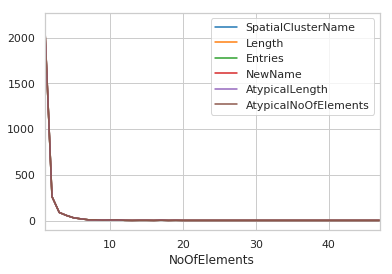

In [275]:
grpNoOfElements=spDF.groupby("NoOfElements")
grpNoOfElements.count().plot()
if saveFiguresAsPDF:
    plt.savefig('./figures/noelements_cluster.pdf')

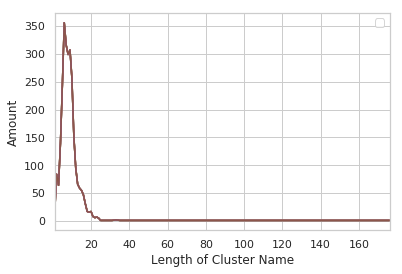

In [276]:
grpLength=spDF.groupby("Length")
grpLength.count().plot()
if saveFiguresAsPDF:
    plt.legend("")
    plt.ylabel("Amount")
    plt.xlabel("Length of Cluster Name")
    plt.savefig('./figures/length_spatialnames.pdf')

* "Poststempel", "Erscheinungsort", nicht entzifferbare Abkürzungen lassen sich so auffinden oder: St.Moritz Hotel, bzw. Kombinationen aus Verlagen und Orten; Signaturen/Referenzen: "Br117"; "VIII, 35"; (Budae,Budapest,Budapesten) wird als ein Cluster erkannt

* Excel weißt statistische Besonderheiten aus und ist alphabetisch anhand der Cluster sortiert, so kommt man in gut XX Minuten mit der Korrektur durch

* nicht alle Korrekturen sind manuell notwendig, da Ortsnamen auch Mehrsprachig in OSM oder GND(???) liegen
* Character Encoding -Probleme sind dort auch gut zu erkennen (Piešťany)

* consonant shift or sound changes

* durch die Aufbereitung in ca. 45 Minuten leistbar (inkl. Recherchen in Historischen Ortsnamen, OSM und Google)

Manual correction should be done in _spatialnamesCorrections.xlsx_. For illustration purposes, some correction have been made. Dots indicate rows for which the spatial name cluster will be removed.

In [277]:
spDF_manuallyCleaned=pd.read_excel("spatialnamesCorrections.xlsx")
spDF_manuallyCleaned.head(20)

,SpatialClusterName,Length,NoOfElements,Entries,NewName,AtypicalLength,AtypicalNoOfElements
0,1,1,1,1,.,True,False
1,2,1,1,2,.,True,False
2,2.,2,1,2.,.,True,False
3,50,2,1,50,.,True,False
4,??,2,1,??,.,True,False
5,A,1,1,A,.,True,False
6,A.,2,1,A.,.,True,False
7,Aarau,5,1,Aarau,NaN,False,False
8,Abdera,6,1,Abdera,NaN,False,False
9,Abel,4,1,Abel,NaN,False,False


In [278]:
df3[df3.spatialClusterName=="Aigen/Salzburg"].head() # returns PPN771101503 and/or PPN771101589

,Unnamed: 0,title,creator,subject,type,format,identifier,language,date,relation,coverage,publisher,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName
72912,72912,Brief von Friederike von Kap-herr an Gerhart H...,"Kap-herr, Friederike von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771101503,de,NaN,Nachlass Gerhart Hauptmann digital,Aigen/Salzburg,NaN,NaN,PPN771101503,Aigen/Salzburg,NaN,763,Aigen/Salzburg
79107,79107,Brief von Friederike von Kap-herr an Gerhart H...,"Kap-herr, Friederike von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771101503,de,NaN,Nachlass Gerhart Hauptmann digital,Aigen/Salzburg,NaN,NaN,PPN771101503,Aigen/Salzburg,NaN,763,Aigen/Salzburg


In [279]:
df3[df3.spatialClusterName=="1"].head() # returns PPN662043146 and PPN688520944

,Unnamed: 0,title,creator,subject,type,format,identifier,language,date,relation,coverage,publisher,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName
35196,35196,Brief an Marie von Bülow; 22.06.1900,"Bülow, Marie",Musik,manuscript,application/mets+xml,PPN662043146,NaN,NaN,Nachlässe und Autographe digital,"1 Brief, 4 S.",NaN,NaN,PPN662043146,1,NaN,2667,1
63448,63448,Postkarte an Wilhelm Engelmann; 17.12.1885,"Engelmann, Wilhelm",Musik,manuscript,application/mets+xml,PPN688520944,NaN,NaN,Nachlässe und Autographe digital,"1 Postkarte, 1 S. und Adresse",NaN,NaN,PPN688520944,1,NaN,2667,1


## korrekturen einarbeiten; sagen, welche spalten wie ausgefüllt werden müssen; vorteil excel: leute kennen das tool und können sich alles anpassen, wie sie s brauchen

In [280]:
uniqueValues(df3)

Unnamed: 0;		 unique values:	146000	 total count: 146000
title;		 unique values:	97969	 total count: 145998
creator;		 unique values:	41729	 total count: 116486
subject;		 unique values:	51	 total count: 145988
type;		 unique values:	8	 total count: 146000
format;		 unique values:	1	 total count: 146000
identifier;		 unique values:	123590	 total count: 146000
language;		 unique values:	146	 total count: 126632
date;		 unique values:	582	 total count: 102006
relation;		 unique values:	2475	 total count: 141332
coverage;		 unique values:	6654	 total count: 120682
publisher;		 unique values:	13866	 total count: 77929
rights;		 unique values:	13	 total count: 92106
PPN;		 unique values:	123590	 total count: 146000
spatialClean;		 unique values:	4175	 total count: 145864
dateClean;		 unique values:	544	 total count: 101497
spatialCluster;		 unique values:	2680	 total count: 146000
spatialClusterName;		 unique values:	2672	 total count: 145864


In [281]:
# df3.ix[df3["spatialClusterName"]=="Carlsruhe", "spatialClusterName"] = "Karlsruhe"
printLog("Fixing spatial cluster names on the basis of manual corrections...")
counterRemoved=0
counterAltered=0
ignoredSpatialNamesLowerCase=[]

for row in spDF_manuallyCleaned.iterrows():
    #py27 newName=readDate=unicode(row[1]["NewName"])
    #py27 oldName=unicode(row[1]["SpatialClusterName"])
    newName=str(row[1]["NewName"])
    oldName=row[1]["SpatialClusterName"]
    
    if newName==".":
        #print("Removed: "+row[1]["SpatialClusterName"])
        df3.ix[df3["spatialClusterName"]==oldName, "spatialClusterName"] = ""
        ignoredSpatialNamesLowerCase.append(oldName.lower())
        counterRemoved=counterRemoved+1
    elif newName=="nan":
        pass
    else:
        #print("Changed: "+row[1]["SpatialClusterName"])
        df3.ix[df3["spatialClusterName"]==oldName, "spatialClusterName"] = newName
        counterAltered=counterAltered+1
        
printLog("Done.")
printLog("Removed clusters: %i"%counterRemoved)
printLog("Altered clusters: %i"%counterAltered)

[2019-02-28 20:37:31.866486]	Fixing spatial cluster names on the basis of manual corrections...


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[2019-02-28 20:37:32.543150]	Done.
[2019-02-28 20:37:32.543616]	Removed clusters: 14
[2019-02-28 20:37:32.544122]	Altered clusters: 22


gate 6

In [282]:
uniqueValues(df3)

Unnamed: 0;		 unique values:	146000	 total count: 146000
title;		 unique values:	97969	 total count: 145998
creator;		 unique values:	41729	 total count: 116486
subject;		 unique values:	51	 total count: 145988
type;		 unique values:	8	 total count: 146000
format;		 unique values:	1	 total count: 146000
identifier;		 unique values:	123590	 total count: 146000
language;		 unique values:	146	 total count: 126632
date;		 unique values:	582	 total count: 102006
relation;		 unique values:	2475	 total count: 141332
coverage;		 unique values:	6654	 total count: 120682
publisher;		 unique values:	13866	 total count: 77929
rights;		 unique values:	13	 total count: 92106
PPN;		 unique values:	123590	 total count: 146000
spatialClean;		 unique values:	4175	 total count: 145864
dateClean;		 unique values:	544	 total count: 101497
spatialCluster;		 unique values:	2680	 total count: 146000
spatialClusterName;		 unique values:	2643	 total count: 145864


# spatialCluster-ID muss auch noch angepasst werden und der spatialClusterName-Anzahl entsprechen

Some debugging...

In [284]:
df3[df3.PPN=="PPN771101503"].head()

,Unnamed: 0,title,creator,subject,type,format,identifier,language,date,relation,coverage,publisher,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName
72912,72912,Brief von Friederike von Kap-herr an Gerhart H...,"Kap-herr, Friederike von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771101503,de,NaN,Nachlass Gerhart Hauptmann digital,Aigen/Salzburg,NaN,NaN,PPN771101503,Aigen/Salzburg,NaN,763,Aigen/Salzburg
79107,79107,Brief von Friederike von Kap-herr an Gerhart H...,"Kap-herr, Friederike von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771101503,de,NaN,Nachlass Gerhart Hauptmann digital,Aigen/Salzburg,NaN,NaN,PPN771101503,Aigen/Salzburg,NaN,763,Aigen/Salzburg


In [285]:
df3[df3.PPN=="PPN662043146"].head()

,Unnamed: 0,title,creator,subject,type,format,identifier,language,date,relation,coverage,publisher,rights,PPN,spatialClean,dateClean,spatialCluster,spatialClusterName
35196,35196,Brief an Marie von Bülow; 22.06.1900,"Bülow, Marie",Musik,manuscript,application/mets+xml,PPN662043146,NaN,NaN,Nachlässe und Autographe digital,"1 Brief, 4 S.",NaN,NaN,PPN662043146,1,NaN,2667,


In [286]:
pickleCompress('./picklez/clean_dataframe.picklez',df3)
pickleCompress('./picklez/ignoredSpatialNames.picklez',ignoredSpatialNamesLowerCase)

[2019-02-28 20:38:09.869881]	Pickling to './picklez/clean_dataframe.picklez'
[2019-02-28 20:38:18.964538]	Pickling done.
[2019-02-28 20:38:18.965325]	Pickling to './picklez/ignoredSpatialNames.picklez'
[2019-02-28 20:38:18.966848]	Pickling done.


# Geodaten erzeugen

In [287]:
# uncomment only needed if you resume the notebook
df4=pickleDecompress('./picklez/clean_dataframe.picklez')
#ignoredSpatialNamesLowerCase=pickleDecompress('./picklez/ignoredSpatialNames.picklez')

# otherwise just run this line:
#df4=df3

[2019-02-28 20:38:26.308530]	Depickling from './picklez/clean_dataframe.picklez'
[2019-02-28 20:38:26.855643]	Depickling done.


In [288]:
# not tested with Python 3
if useGoogleMapsAPI:
    # idee ist, die Algorithmen von Google zu nutzen, um mit mitunter fehlerhaften, mehrsprachigen Ortsbezeichner umzugehen
    gmaps = googlemaps.Client(key=privateGoogleKey)
    # if you re-run this cell you might want to uncomment the following line
    latLng=dict()
    printLog("Fetching geolocations from Google Maps...")
    for row in df4.iterrows():
        if not row[1]["spatialClusterName"]:
            # in some cases, i.e., when the cluster was corrected manually above, 
            # we will ignore the spatialClean replacement
            loc=row[1]["spatialClean"]
            if loc:
                if not loc.lower() in ignoredSpatialNamesLowerCase:
                    printLog("Taking %s instead."%loc)
                else:
                    loc=None
        else:
            loc=row[1]["spatialClusterName"]
        if loc:
            if loc not in latLng:
                #printLog(loc)
                try:
                    retLL=gmaps.geocode(loc)
                    if len(retLL)>0:
                        latLng[loc]=retLL[0][u'geometry'][u'location']
                    else:
                        latLng[loc]=None
                except googlemaps.exceptions.ApiError:
                    printLog("Problem fetching: "+loc)
                    latLng[loc]=None
    printLog("Done.")

    triedAgain=[]
    printLog("Fetching geolocations from Google Maps a second time (aka the brute force failover solution)...")
    for row in df4.iterrows():
        if not row[1]["spatialClusterName"]:
            loc=row[1]["spatialClean"]
        else:
            loc=row[1]["spatialClusterName"]
        if loc:
            if latLng[loc]==None:
                if loc not in triedAgain:
                    #printLog(loc)
                    triedAgain.append(loc)
                    try:
                        retLL=gmaps.geocode(loc)
                        if len(retLL)>0:
                            latLng[loc]=retLL[0][u'geometry'][u'location']
                        else:
                            latLng[loc]=None
                    except googlemaps.exceptions.ApiError:
                        printLog("Problem fetching: "+loc)
                        latLng[loc]=None
    printLog("Done.")
    pickleCompress('./picklez/geo_coordinates.picklez',latLng)
else:
    printLog("Skipping Google Map API calls.")

[2019-02-28 20:38:37.112366]	Skipping Google Map API calls.


alternative with OpenStreetMap http://wiki.openstreetmap.org/wiki/Nominatim#Reverse_Geocoding

In [ ]:
if not useGoogleMapsAPI:
    if getSpatialNamesFromOSM:
        osmNominatimURL="http://nominatim.openstreetmap.org/search?format=json&namedetails=1&q="
        # if you re-run this cell you might want to uncomment the following line
        latLng=dict()
        names=dict()
    
        maxItems=df4.shape[0]
        counter=0
    
        printLog("Fetching geolocations from OpenStreetMaps...")
        for row in df4.iterrows():
            counter=counter+1
            if counter%5000==0:
                printLog("\tProcessed %i items of %i"%(counter,maxItems))
            if not row[1]["spatialClusterName"]:
                # in some cases, i.e., when the cluster was corrected manually above, 
                # we will ignore the spatialClean replacement
                loc=str(row[1]["spatialClean"])
                if loc:
                    if not loc.lower() in ignoredSpatialNamesLowerCase:
                        printLog("No spatial cluster name for %s. Taking %s instead."%(row[1]["PPN"],loc))
                    else:
                        loc=None
            else:
                loc=str(row[1]["spatialClusterName"])
            if loc:
                if loc not in latLng:
                #printLog(loc)
                    locURL=osmNominatimURL+urllib.parse.quote(loc).replace(" ","+")
                    try:
                        data = json.load(urllib.request.urlopen(locURL))
                        latLng[loc]=dict()
                        if len(data)>0:
                            #print data[0]
                            latLng[loc][u'lat']=data[0]["lat"]
                            latLng[loc][u'lng']=data[0]["lon"]
                            #print loc
                            names[loc]=dict()
                            if len(data[0]['namedetails'])>0:
                                for k,v in data[0]['namedetails'].items():
                                    names[loc][k]=v
                            else:
                                names[loc][u'name']=loc
                                #print "No namedetails for "+loc
                            #print names[loc]
                        else:
                            latLng[loc]=None
                    except IOError:
                        printLog("\tCould not open: "+locURL)
                        pickleCompress('./picklez/save_names.picklez',names)
                        pickleCompress('./picklez/save_latLng.picklez',latLng)
                    time.sleep(1) # see http://wiki.openstreetmap.org/wiki/Nominatim_usage_policy
        printLog("Number of coordinates: %i"%len(latLng))
        printLog("Done.")
    else:
        printLog("Skipping OpenStreetMap API calls.")
else:
    printLog("Skipping OpenStreetMap API calls.")

[2019-02-28 20:38:43.654501]	Fetching geolocations from OpenStreetMaps...
[2019-02-28 20:42:00.306514]	No spatial cluster name for PPN863112544. Taking None instead.
[2019-02-28 20:46:19.244266]	No spatial cluster name for PPN771791380. Taking None instead.
[2019-02-28 20:48:09.349450]	No spatial cluster name for PPN667996907. Taking None instead.
[2019-02-28 20:49:09.588742]	No spatial cluster name for PPN667682600. Taking None instead.
[2019-02-28 20:49:30.868306]	No spatial cluster name for PPN688812546. Taking None instead.
[2019-02-28 20:50:01.166434]		Processed 5000 items of 146000
[2019-02-28 20:50:03.688913]	No spatial cluster name for PPN771067097. Taking None instead.
[2019-02-28 20:50:43.839021]	No spatial cluster name for PPN769822509. Taking None instead.
[2019-02-28 20:51:27.515045]	No spatial cluster name for PPN688713335. Taking None instead.
[2019-02-28 20:52:23.914492]	No spatial cluster name for PPN771098901. Taking None instead.
[2019-02-28 20:53:00.038260]	No spati

[2019-02-28 21:21:14.478284]	No spatial cluster name for PPN1024634558. Taking None instead.
[2019-02-28 21:21:16.978990]	No spatial cluster name for PPN739769758. Taking None instead.
[2019-02-28 21:21:18.260933]	No spatial cluster name for PPN1026674220. Taking None instead.
[2019-02-28 21:21:19.675510]	No spatial cluster name for PPN636348210. Taking None instead.
[2019-02-28 21:21:31.028306]	No spatial cluster name for PPN633580872. Taking None instead.
[2019-02-28 21:21:34.801098]	No spatial cluster name for PPN715678515. Taking None instead.
[2019-02-28 21:21:36.144190]		Processed 85000 items of 146000
[2019-02-28 21:21:52.551959]	No spatial cluster name for PPN768203791. Taking None instead.
[2019-02-28 21:22:02.618236]	No spatial cluster name for PPN768203791. Taking None instead.
[2019-02-28 21:22:21.364264]	No spatial cluster name for PPN739761420. Taking None instead.
[2019-02-28 21:22:22.615532]	No spatial cluster name for PPN654599629. Taking None instead.
[2019-02-28 21:2

In [7]:
# for manual additions, you can directly pass an URL as the example below shows
#manualLocation="Kehl"
#data = json.load(urllib.urlopen("http://nominatim.openstreetmap.org/search?format=json&namedetails=1&q="+manualLocation))
#loc=manualLocation
#if len(data)>0:
#    latLng[loc][u'lat']=data[0]["lat"]
#    latLng[loc][u'lng']=data[0]["lon"]
#    names[loc]=dict()
#    if len(data[0]['namedetails'])>0:
#        for k,v in data[0]['namedetails'].items():
#            names[loc][k]=v
#    else:
#        names[loc][u'name']=loc
#else:
#    latLng[loc]=None

In [ ]:
# save everything
if not useGoogleMapsAPI:
    if getSpatialNamesFromOSM:
        pickleCompress('./picklez/osm_names.picklez',names)
        pickleCompress('./picklez/osm_latLng.picklez',latLng)

In [157]:
if useGoogleMapsAPI:
    latLng=pickleDecompress('./picklez/geo_coordinates.picklez')
else:
    latLng=pickleDecompress('./picklez/osm_latLng.picklez')
    osmNames=pickleDecompress('./picklez/osm_names.picklez')

[2019-02-25 11:00:37.740626]	Depickling from './picklez/osm_latLng.picklez'
[2019-02-25 11:00:37.745800]	Depickling done.
[2019-02-25 11:00:37.746933]	Depickling from './picklez/osm_names.picklez'
[2019-02-25 11:00:37.769822]	Depickling done.


latitude und longitude aus den spatial names generieren

In [158]:
def getLat(spatialName):
    if spatialName:
        if spatialName in latLng:
            if latLng[spatialName]:
                return latLng[spatialName][u'lat']
            else:
                return np.nan
    else:
        return np.nan

def getLng(spatialName):
    if spatialName:
        if spatialName in latLng:
            if latLng[spatialName]:
                return latLng[spatialName][u'lng']
            else:
                return np.nan
    else:
        return np.nan

df4['latitude']=df4['spatialClusterName'].apply(getLat)
df4['longitude']=df4['spatialClusterName'].apply(getLng)

### lambda-Ausdruck ansprechen (Church aus theoretischer Informatik...)

In [161]:
# overwrite every "nulled" column (i.e. NULL or NaN) with -1
df4.ix[df4["dateClean"].isnull(), "dateClean"] = -1
df4.ix[df4["dateClean"]=='nan', "dateClean"] = -1

df4["century"]=df4["dateClean"].apply(lambda x: int(int(x)/100)) # uns interessiert nur das jahrhundert
df4.head(20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,title,creator,subject,type,format,identifier,language,date,relation,coverage,PPN,publisher,rights,spatialClean,dateClean,spatialCluster,spatialClusterName,latitude,longitude,century
0,Brief von Fritz von Unruh an Margarete Hauptmann,"Unruh, Fritz von",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771784589,de,NaN,Nachlass Gerhart Hauptmann digital,o.O.,PPN771784589,NaN,NaN,,-1,,,NaN,NaN,0
1,Kindliche Klage Auf den seligen Hintritt Der w...,"Steding, Catharina Magdalena",Historische Drucke,monograph,application/mets+xml,PPN838021190,ger,1731,VD18 digital,Rinteln,PPN838021190,Enax,CC BY-NC-SA 4.0 International,Rinteln,1731,1697,Rinteln,52.1873798,9.0804584,17
2,Brief an Wilhelm Speyer; 05.11.1832,"Speyer, Wilhelm",Musik,manuscript,application/mets+xml,PPN796368198,NaN,NaN,Nachlässe und Autographe digital,Cassel,PPN796368198,NaN,NaN,Cassel,-1,461,Cassel,50.8000011,2.4868314,0
3,"Hypomnemata Ad Joh. Rodolphi Salchlini, Profes...","Salchlinus, Johannes Rodolphus",Historische Drucke,monograph,application/mets+xml,PPN684647052,lat,1725,VD18 digital,[S.l.],PPN684647052,NaN,CC BY-NC-SA 4.0 International,,1725,,,NaN,NaN,17
4,Plan einer pflanzengeographischen Uebersicht v...,"Schouw, Joakim Frederik",Alexander von Humboldt,manuscript,application/mets+xml,PPN82636702X,de,NaN,Nachlass Alexander von Humboldt digital,NaN,PPN82636702X,NaN,NaN,,-1,,,NaN,NaN,0
5,Christliche Predigt || Bey dem || Begrebnis We...,"Moesler, Adam",Historische Drucke,monograph,application/mets+xml,PPN782478417,lat,1599,VD16 digital,Stettin,PPN782478417,"Möller, Martin",CC BY-NC-SA 4.0 International,Stettin,1599,1268,Stettin,53.4301818,14.5509623,15
6,Brief von Erika Hamburger an Gerhart Hauptmann,"Hamburger, Erika",Nachlässe und Autographe,manuscript,application/mets+xml,PPN771806655,de,NaN,Nachlass Gerhart Hauptmann digital,Neukirch [Breslau],PPN771806655,NaN,NaN,Neukirch,-1,236,Neukirch,48.3283326,7.3145911,0
7,Artikel Christlicher || Lere/ so da hetten sol...,"Stoltz, Johann",Historische Drucke,monograph,application/mets+xml,PPN796434530,lat,1555,VD16 digital,Jena,PPN796434530,"Rödinger, Christian d.Ä.",CC BY-NC-SA 4.0 International,Jena,1555,445,Jena,50.9281717,11.5879359,15
8,"Musicalischen Divertissiments, oder In das Geh...","Bodino, Sebastiano",Musiknoten,multivolume_work,application/mets+xml,PPN667471367,NaN,1726,NaN,Augspurg,PPN667471367,Leopold,NaN,Augspurg,1726,554,Augspurg,48.1616424,11.546322,17
9,Die drei Pintos; WeV C.8; J Anh.I.B.5,"Weber, Carl Maria von",Musiknoten,manuscript,application/mets+xml,PPN828227306,NaN,NaN,Musikhandschriften digital,NaN,PPN828227306,NaN,NaN,,-1,,,NaN,NaN,0


In [162]:
grpCentury=df4.groupby("century")
grpCentury.describe()

title                                                                 creator                                                        subject                                              type                           format                                     identifier                            language                      date                    relation                                                                  coverage                             PPN                        \
         count unique                                                top  freq   count unique                                       top  freq   count unique                          top   freq  count unique         top   freq  count unique                   top   freq      count unique            top freq    count unique  top   freq  count unique   top  freq    count unique                                                top   freq    count unique         top  freq  count unique            top   
century                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
0        36857  20277                                      Korrespondenz  1486   33251   6530                        Hauptmann, Gerhart  2142   36848     28     Nachlässe und Autographe  15743  36857      8  manuscript  35130  36857      1  application/mets+xml  36857      36857  34161  PPN1025237102    2    23522     96   de  15526    395     32  18XX   141    36450     60                 Nachlass Gerhart Hauptmann digital  11773    22956   2594      Berlin  3317  36857  34161  PPN1025237102   
11           1      1                    Kitāb ʿamal al-yaum wa-'l-laila     1       1      1       Sunnī, Aḥmad Ibn-Muḥammad Ibn-Isḥāq     1       1      1  Orientalische Handschriften      1      1      1   monograph      1      1      1  application/mets+xml      1          1      1   PPN627401597    1        1      1  ara      1      1      1  1145     1        0      0                                                NaN    NaN        0      0         NaN   NaN      1      1   PPN627401597   
12          13     13                                           Anaphora     1       9      9  Ṭūsī, Naṣīr-ad-Dīn Muḥammad Ibn-Muḥammad     1      13      2  Orientalische Handschriften     10     13      1   monograph     13     13      1  application/mets+xml     13         13     13   PPN616194641    1       13      4  ara      7     13     12  1233     2       12      1                Orientalische Handschriften digital     12        3      3  Ṭûr-ʿAbdîn     1     13     13   PPN616194641   
13          13     12                                    Šarḥ al-waraqāt     2      10      9          Šāfiʿī al-Fazārī, ʿAbd-ar-Raḥmān     2      13      3  Orientalische Handschriften     11     13      1   monograph     13     13      1  application/mets+xml     13         13     12   PPN632174641    2       12      3  ara      9     13      8  1300     4        9      3                Orientalische Handschriften digital      5        0      0         NaN   NaN     13     12   PPN632174641   
14         922    680                              Mirabilia urbis Romae     7     590    319                       Sixtus, IV. <Papst>    20     922     10           Historische Drucke    755    922      1   monograph    922    922      1  application/mets+xml    922        922    780   PPN864355114    2      879     17  lat    380    922     46  1495    65        9      3                Orientalische Handschriften digital      4      911     86     Leipzig   104    922    780   PPN864355114   
1

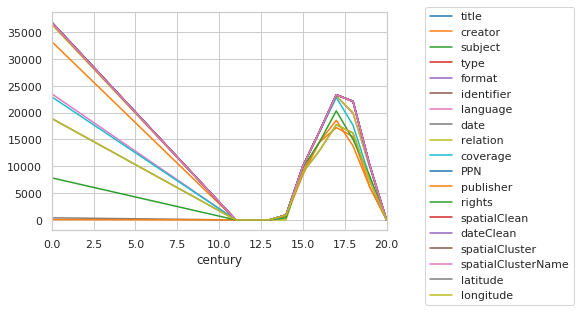

In [176]:
ax=grpCentury.count().plot()
ax.legend(bbox_to_anchor=(1.1, 1.05))

### Text-based Clustering

In [177]:
printLog("Number of unique title fields %i"%len(df4.title.unique()))

[2019-02-25 11:08:48.433730]	Number of unique title fields 83279


In [178]:
#title soll geclustert werden -> textCluster
corpus=df4.title.astype(str)

The next cell will take a while to compute depending on your computer and the size of the corpus. To give an example, the following performance could be observed on a MacBook Pro (13-inch, 2018, Four Thunderbolt 3 Ports, 2,7 GHz Intel Core i7, 16 GB RAM):
```
[2019-02-25 11:08:53.568526]	Clustering text with cluster target size 5000
[2019-02-25 11:08:53.569143]		 Preparing tf*idf model
[2019-02-25 11:08:56.634801]		 Number of feature names: 125000
[2019-02-25 11:08:56.635519]		 K-Means clustering
[2019-02-25 11:17:49.427231]	Done.
```

In [179]:
# in Python 3 you cannot save files over 4 GB, hence we have to run the clustering everytime  :-/
true_k=5000

if sys.version_info.major>=3 or allowComputationallyExpensiveCalculations:
    printLog("Clustering text with cluster target size %i"%true_k)
    printLog("\t Preparing tf*idf model")
    # from an analysis we know that there are 167,715 different words in the corpus
    # to speed up processing, we limit the vocabulary size to the ca. top-75% of the words
    tfidfvectorizer = TfidfVectorizer(min_df=1,max_features=125000) #max_features is used to limit the vocabulary size 
    Xtfidf=tfidfvectorizer.fit_transform(corpus)
    featNames=tfidfvectorizer.get_feature_names()
    printLog("\t Number of feature names: %i"%len(featNames))

    printLog("\t K-Means clustering")
    km=MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    # fit the k-means algorithm on the data created above
    km.fit(Xtfidf)
    if sys.version_info.major<3:
        pickleCompress('./picklez/textClustersK_'+str(true_k)+'.picklez',km)
else:
    km=pickleDecompress('./picklez/textClustersK_'+str(true_k)+'.picklez')
    printLog("\t Updating Dataframe")
# add the detected clusters as a new column to the original data frame
df4['textCluster']=km.labels_
printLog("Done.")

[2019-02-25 11:08:53.568526]	Clustering text with cluster target size 5000
[2019-02-25 11:08:53.569143]		 Preparing tf*idf model
[2019-02-25 11:08:56.634801]		 Number of feature names: 125000
[2019-02-25 11:08:56.635519]		 K-Means clustering


/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=5000. Setting it to 3*k
  init_size=init_size)


[2019-02-25 11:17:49.427231]	Done.
[2019-02-25 11:17:49.445992]	Done.


In [83]:
if allowComputationallyExpensiveCalculations:
    # group the data by the cluster and describe it
    df4.groupby('textCluster').describe()

In [180]:
df4=df4.sort_values(by="textCluster")
df4[['PPN','title','textCluster']].tail()

,PPN,title,textCluster
82457,PPN770258980,"Eva Trottinn, Nebengeliebte Heinrichs des Jüng...",4997
84106,PPN770259367,"Eva Trottinn, Nebengeliebte Heinrichs des Jüng...",4997
68921,PPN770258980,"Eva Trottinn, Nebengeliebte Heinrichs des Jüng...",4997
114023,PPN815799039,"Ausonium Poetam, Superiorum indultu Literatoru...",4998
33185,PPN771787596,Brief von Wilhelm Stumpf von Bochum / Stadtrat...,4999


do the same with the creator column

In [181]:
#creator soll geclustert werden -> creatorCluster
corpus=df4.creator.astype(str)

In [182]:
printLog("Number of unique creator fields %i"%len(df4.creator.unique()))

[2019-02-25 11:18:33.684915]	Number of unique creator fields 36638


```
[2019-02-25 11:18:40.288281]	Clustering text with cluster target size 20000
[2019-02-25 11:18:40.289133]		 Preparing tf*idf model
[2019-02-25 11:18:40.958502]		 Number of feature names: 26575
[2019-02-25 11:18:40.959311]		 K-Means clustering
[2019-02-25 11:26:49.960392]	Done.
```

In [183]:
true_k=20000

if sys.version_info.major>=3 or allowComputationallyExpensiveCalculations:
    printLog("Clustering text with cluster target size %i"%true_k)
    printLog("\t Preparing tf*idf model")
    tfidfvectorizer = TfidfVectorizer(min_df=1) #max_features setzen?
    Xtfidf=tfidfvectorizer.fit_transform(corpus)
    featNames=tfidfvectorizer.get_feature_names()
    printLog("\t Number of feature names: %i"%len(featNames))

    printLog("\t K-Means clustering")
    km=MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    # fit the k-means algorithm on the data created above
    km.fit(Xtfidf)
    if sys.version_info.major<3:
        pickleCompress('./picklez/creatorClustersK_'+str(true_k)+'.picklez',km)
else:
    km=pickleDecompress('./picklez/creatorClustersK_'+str(true_k)+'.picklez')

printLog("Done.")

[2019-02-25 11:18:40.288281]	Clustering text with cluster target size 20000
[2019-02-25 11:18:40.289133]		 Preparing tf*idf model
[2019-02-25 11:18:40.958502]		 Number of feature names: 26575
[2019-02-25 11:18:40.959311]		 K-Means clustering


/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=20000. Setting it to 3*k
  init_size=init_size)


[2019-02-25 11:26:49.960392]	Done.


In [184]:
# add the detected clusters as a new column to the original data frame
printLog("\t Updating Dataframe")
df4['creatorCluster']=km.labels_

df4=df4.sort_values(by="creatorCluster")
df4[['PPN','creator','creatorCluster']].tail()

[2019-02-25 11:30:34.374397]		 Updating Dataframe


,PPN,creator,creatorCluster
96661,PPN787773239,"Savoyen-Carignan, Eugen von",18641
13163,PPN715016210,"Steffan von Cronstätten, Johann Hieronymus",18642
18394,PPN893732508,"Bibra und Modlau, Maria Elisabeth von",18643
77417,PPN862199174,"Ḏahabī, Muḥammad Ibn-Aḥmad aḏ-",18644
30919,PPN820533564,"Ḏahabī, Muḥammad Ibn-Aḥmad Ibn-ʿUṯmān",18644


In [185]:
pickleCompress('./picklez/clean_dataframe_with_century.picklez',df4)

[2019-02-25 11:30:39.308172]	Pickling to './picklez/clean_dataframe_with_century.picklez'
[2019-02-25 11:30:49.291861]	Pickling done.


In [186]:
df4.to_csv("cleanedData.csv",sep=';',header=True, index=False, encoding='utf-8')

## The Analyses Shall Begin!
safe to continue from here if you resume the notebook...

In [187]:
# if you have run this notebook from top to bottom, you don't have to reload the data
df4=pickleDecompress('./picklez/clean_dataframe_with_century.picklez')
grpCentury=df4.groupby("century")
#df4.shape

[2019-02-25 11:30:54.432200]	Depickling from './picklez/clean_dataframe_with_century.picklez'
[2019-02-25 11:30:55.442552]	Depickling done.


In [188]:
df4.head()

,title,creator,subject,type,format,identifier,language,date,relation,coverage,PPN,publisher,rights,spatialClean,dateClean,spatialCluster,spatialClusterName,latitude,longitude,century,textCluster,creatorCluster
21829,Jahresbericht über die Nordtirolische Kapuzine...,NaN,Historische Drucke,periodical_volume,application/mets+xml,PPN776802097,ger,1900,Jahresbericht über die Nordtirolische Kapuzine...,NaN,PPN776802097,NaN,Public Domain Mark 1.0,,1900,,,NaN,NaN,19,40,0
47932,"Ein schœn News || Lied, von dem schwæren zorn ...",NaN,Historische Drucke,monograph,application/mets+xml,PPN734520921,ger,1550,VD Lied digital - Berliner Liedflugschriften,s.l.,PPN734520921,"Franck, Matthäus",Public Domain Mark 1.0,,1550,,,NaN,NaN,15,40,0
47933,Der TodtenTantz; Ein Geistliches Gesang/ wie d...,NaN,Historische Drucke,monograph,application/mets+xml,PPN782619908,ger,1650,VD Lied digital - Berliner Liedflugschriften,Augsburg,PPN782619908,"Schultes, Johann",Public Domain Mark 1.0,Augsburg,1650,554,Augspurg,48.1616424,11.546322,16,40,0
47935,"Fünf Lieder; Das Erste. Bonaparte, du sollst l...",NaN,Historische Drucke,monograph,application/mets+xml,PPN799181897,ger,1800,VD Lied digital - Berliner Liedflugschriften,Leipzig,PPN799181897,"Solbrig, Christian Friedrich, Witwe",Public Domain Mark 1.0,Leipzig,1800,993,Leipzig,51.3406321,12.3747329,18,40,0
47983,Fünf schöne geistliche Lieder.; Das erste. Mar...,NaN,Historische Drucke,monograph,application/mets+xml,PPN793149223,ger,1763,VD Lied digital - Berliner Liedflugschriften,Köln,PPN793149223,NaN,Public Domain Mark 1.0,Köln,1763,1150,Köln,50.938361,6.959974,17,40,0


### Speeding things up

dauert ca.40 min mit Zugriff innerhalb der Schleife mittels df4[df4.PPN==ppn].iloc[-1]['title'], deshalb look-up, so dauert alles komplett ca. 40 Sekunden.

In [189]:
printLog("Creating PPN look-up table...")
ppnLookup=dict()
for row in df4.iterrows():
    ppn=readDate=str(row[1]["PPN"])
    if ppn not in ppnLookup:
        ppnLookup[ppn]=dict()
    # it is redundant but handy for later JSON exports to save the PPN as a value as well
    ppnLookup[ppn]["ppn"]=ppn
    ppnLookup[ppn]["dateClean"]=str(row[1]["dateClean"])
    ppnLookup[ppn]["title"]=str(row[1]["title"])
    ppnLookup[ppn]["creator"]=str(row[1]["creator"])
    
    if not row[1]["spatialClusterName"]:
        if row[1]["spatialClean"]:
            ppnLookup[ppn]["spatialClusterName"]=row[1]["spatialClean"]
        else:
            ppnLookup[ppn]["spatialClusterName"]="None"
    else:
        ppnLookup[ppn]["spatialClusterName"]=row[1]["spatialClusterName"] 
    ppnLookup[ppn]['spatialClean']=row[1]["spatialClean"]
    ppnLookup[ppn]['spatialRaw']=str(row[1]["coverage"])
    ppnLookup[ppn]['mediatype']=str(row[1]["type"])
    ppnLookup[ppn]['subject']=str(row[1]["subject"])
    # daz
    #ppnLookup[ppn]['source']=str(row[1]["source"])
    ppnLookup[ppn]['publisher']=str(row[1]["publisher"])
    #ppnLookup[ppn]['alternative']=str(row[1]["alternative"])
    ppnLookup[ppn]['lat']=str(row[1]["latitude"])
    ppnLookup[ppn]['lng']=str(row[1]["longitude"])
    ppnLookup[ppn]['textCluster']=str(row[1]["textCluster"])
    ppnLookup[ppn]['creatorCluster']=str(row[1]["creatorCluster"])
    
pickleCompress("./picklez/ppnLookup.picklez",ppnLookup)
printLog("Done.")

[2019-02-25 11:31:03.124277]	Creating PPN look-up table...
[2019-02-25 11:31:21.192843]	Pickling to './picklez/ppnLookup.picklez'
[2019-02-25 11:31:26.044510]	Pickling done.
[2019-02-25 11:31:26.045279]	Done.


In [190]:
#serialize data per PPN; one large file would be more than 80 MB and thus too much for a transmission to a browser
if serializePPNLookup2JSON:
    printLog("Serializing PPN lookup table to JSON in directory:\n\t"+jsonWebDir)
    for k in ppnLookup:
        dump=json.dumps(ppnLookup[k])

        jsonFile = open(jsonWebDir+k+".json", "w")
        jsonFile.write(dump)
        jsonFile.close()
    printLog("Done.")

[2019-02-25 11:32:12.184526]	Serializing PPN lookup table to JSON in directory:
	./web/data/ppn/
[2019-02-25 11:32:30.906485]	Done.


### A Creation and Its Place of Origin - Graphing the Library World
build a network graph: do publishers and their publication locations resemble superheroes?
verbindung publisher/creator - spatialClusterName; dazu: dateClean, century, title

In [191]:
def createGraph(consideredDataFrame):
    # for testing purposes it is handy to limit the number of records
    #consideredDataFrame=consideredDataFrame[(consideredDataFrame.Year>=1961) & (consideredDataFrame.Year<1975)]

    # create an empty graph from the nx (networkx) package imported above
    G=nx.Graph()

    rowCount=0
    seenCreators=[]
    seenLocations=[]
    for row in consideredDataFrame.iterrows():
        rowCount=rowCount+1
        #if rowCount%1000==0:
        #    printLog("Processed %i rows..."%rowCount)
        ppn=row[1]["PPN"]
        creator=str(row[1]["publisher"]).upper()
        if creator=="NAN":
            creator=str(row[1]["creator"]).upper()
        if creator=="NAN":
            creator="Unknown creator"
        
        location=row[1]["spatialClusterName"]
        if location=="NAN":
            location="s. l."
        elif not location:
            location="s. l."
        year=row[1]["dateClean"]
        subject=row[1]["subject"]
        
        #if not creator in G.nodes():
        #if not creator in seenCreators:
        
        G.add_node(creator)
        if not creator=="Unknown creator":
            # the name attribute will be helpful for D3.js visualizations
            G.node[creator]['name'] = creator
            G.node[creator]['year'] = year
            G.node[creator]['type'] = "creator"
            G.node[creator]['subject']=subject
            G.node[creator]['century']=row[1]["century"]
            seenCreators.append(creator)
        else:
            G.node[creator]['name'] = creator
            G.node[creator]['year'] = year
            G.node[creator]['type'] = "no_creator"
        
        #if not location in G.nodes():
        #if not location in seenLocations:
       
        # the name attribute will be helpful for D3.js visualizations
        if not location=="s. l.":
            G.add_node(location)
            G.node[location]['name'] = location
            G.node[location]['year'] = year
            G.node[location]['type'] = "location"
            seenLocations.append(location)
            G.add_edge(creator,location)
        else:
            pass
        # if we would like to add the unknown location, uncomment the following lines and the comment the last line
            #G.add_node(location)
            #G.node[location]['name'] = location
            #G.node[location]['year'] = year
            #G.node[location]['type'] = "no_location"
    
        #print location
        #print creator
        #print "* * *"
    return G

In [192]:
printLog("Creating graphs and additional data...")

graphsPerCentury=dict()
ppnPerCentury=OrderedDict()
for century in range(7,21): # we know that there are only media from the 7th century on
    if century in grpCentury.groups:
        centDF=grpCentury.get_group(century)
        returnedGraph=createGraph(centDF)
        graphsPerCentury[century]=returnedGraph
        printLog("Graph for century %i built with %i nodes and %i edges."%(century, len(returnedGraph.nodes()),len(returnedGraph.edges())))
        # export as GraphML, which can be read by Gephi
        nx.write_gml(returnedGraph,"graphs/century_"+str(century)+".gml")
        
        # now save the PPNs
        ppnPerCentury[century]=[]
        for row in centDF.iterrows():
            ppn=row[1]["PPN"]
            ppnPerCentury[century].append(ppn)

# create the full graph
returnedGraph=createGraph(df4)
printLog("Graph for all centuries built with %i nodes and %i edges."%(len(returnedGraph.nodes()),len(returnedGraph.edges())))
nx.write_gml(returnedGraph,"graphs/all_centuries.gml")
printLog("Done.")

[2019-02-25 11:34:24.146772]	Creating graphs and additional data...
[2019-02-25 11:34:24.454744]	Graph for century 11 built with 1 nodes and 0 edges.
[2019-02-25 11:34:24.483181]	Graph for century 12 built with 13 nodes and 3 edges.
[2019-02-25 11:34:24.491830]	Graph for century 13 built with 10 nodes and 0 edges.
[2019-02-25 11:34:24.627389]	Graph for century 14 built with 417 nodes and 346 edges.
[2019-02-25 11:34:25.993991]	Graph for century 15 built with 1806 nodes and 1442 edges.
[2019-02-25 11:34:28.893649]	Graph for century 16 built with 3815 nodes and 3331 edges.
[2019-02-25 11:34:32.813322]	Graph for century 17 built with 6531 nodes and 6084 edges.
[2019-02-25 11:34:36.971981]	Graph for century 18 built with 5598 nodes and 5074 edges.
[2019-02-25 11:34:39.779876]	Graph for century 19 built with 3340 nodes and 2849 edges.
[2019-02-25 11:34:40.623129]	Graph for century 20 built with 10 nodes and 7 edges.
[2019-02-25 11:34:53.433444]	Graph for all centuries built with 25981 nodes

In [193]:
def createFullGraph(consideredDataFrame):
    # for testing purposes it is handy to limit the number of records
    #consideredDataFrame=consideredDataFrame[(consideredDataFrame.Year>=1961) & (consideredDataFrame.Year<1975)]

    # create an empty graph from the nx (networkx) package imported above
    G=nx.Graph()

    rowCount=0
    seenCreators=[]
    seenLocations=[]
    for row in consideredDataFrame.iterrows():
        rowCount=rowCount+1
        #if rowCount%1000==0:
        #    printLog("Processed %i rows..."%rowCount)
        ppn=row[1]["PPN"]
        creator=str(row[1]["publisher"]).upper()
        if creator=="NAN":
            creator=str(row[1]["creator"]).upper()
        if creator=="NAN":
            creator="Unknown creator"
        
        location=row[1]["spatialClusterName"]
        if location=="NAN":
            location="s. l."
        elif not location:
            location="s. l."
        year=row[1]["dateClean"]
        subject=row[1]["subject"]
        
        #if not creator in G.nodes():
        #if not creator in seenCreators:
        
        G.add_node(creator)
        if not creator=="Unknown creator":
            # the name attribute will be helpful for D3.js visualizations
            G.node[creator]['name'] = creator
            G.node[creator]['year'] = year
            G.node[creator]['type'] = "creator"
            G.node[creator]['subject']=subject
            G.node[creator]['century']=row[1]["century"]
            seenCreators.append(creator)
        else:
            G.node[creator]['name'] = creator
            G.node[creator]['year'] = year
            G.node[creator]['type'] = "no_creator"
        
        #if not location in G.nodes():
        #if not location in seenLocations:
       
        # the name attribute will be helpful for D3.js visualizations
        if not location=="s. l.":
            G.add_node(location)
            G.node[location]['name'] = location
            G.node[location]['year'] = year
            G.node[location]['type'] = "location"
            seenLocations.append(location)
            G.add_edge(creator,location)
        else:
            pass
        # if we would like to add the unknown location, uncomment the following lines and the comment the last line
            #G.add_node(location)
            #G.node[location]['name'] = location
            #G.node[location]['year'] = year
            #G.node[location]['type'] = "no_location"
    
        #print location
        #print creator
        #print "* * *"
        
        G.add_node(ppn)
        G.node[ppn]['name'] = str(ppn)
        G.node[ppn]['year'] = year
        G.node[ppn]['type'] = "PPN"
        G.node[ppn]['century']=row[1]["century"]
        G.add_edge(ppn,creator)

    return G

In [194]:
printLog("Creating graphs incl. PPNs...")

graphsPerCentury=dict()
for century in range(7,21): # we know that there are only media from the 7th century on
    if century in grpCentury.groups:
        centDF=grpCentury.get_group(century)
        returnedGraph=createFullGraph(centDF)
        graphsPerCentury[century]=returnedGraph
        gmlPath="graphs/century_ppn_"+str(century)+".gml"
        # export as GraphML, which can be read by Gephi
        nx.write_gml(returnedGraph,gmlPath)
        printLog("Graph for century %i built with %i nodes and %i edges (see %s)."%(century, len(returnedGraph.nodes()),len(returnedGraph.edges()),gmlPath))
        

# create the full graph
returnedGraph=createFullGraph(df4)
gmlPath="graphs/all_centuries_ppn.gml"
nx.write_gml(returnedGraph,gmlPath)
printLog("Graph for all centuries built with %i nodes and %i edges (see %s)."%(len(returnedGraph.nodes()),len(returnedGraph.edges()),gmlPath))
printLog("Done.")

[2019-02-25 11:35:02.044034]	Creating graphs incl. PPNs...
[2019-02-25 11:35:02.081539]	Graph for century 11 built with 2 nodes and 1 edges (see graphs/century_ppn_11.gml).
[2019-02-25 11:35:02.086673]	Graph for century 12 built with 26 nodes and 16 edges (see graphs/century_ppn_12.gml).
[2019-02-25 11:35:02.091402]	Graph for century 13 built with 22 nodes and 12 edges (see graphs/century_ppn_13.gml).
[2019-02-25 11:35:02.292335]	Graph for century 14 built with 1197 nodes and 1126 edges (see graphs/century_ppn_14.gml).
[2019-02-25 11:35:03.826282]	Graph for century 15 built with 10902 nodes and 10538 edges (see graphs/century_ppn_15.gml).
[2019-02-25 11:35:06.583179]	Graph for century 16 built with 17160 nodes and 16676 edges (see graphs/century_ppn_16.gml).
[2019-02-25 11:35:10.326478]	Graph for century 17 built with 27711 nodes and 27264 edges (see graphs/century_ppn_17.gml).
[2019-02-25 11:35:13.551239]	Graph for century 18 built with 23426 nodes and 22902 edges (see graphs/century_

In [100]:
# takes ca. 45 min for a graph built with 16368 nodes and 18539 edges on my MacBook Pro, i.e., with the full data set
# with http://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.layout.spring_layout.html#networkx.drawing.layout.spring_layout
# theory behind it: https://en.wikipedia.org/wiki/Force-directed_graph_drawing
#printLog("Preparing to draw...")

#nx.draw(G)
#plt.savefig("graph.pdf")
#printLog("Done.")

generic graph building

In [195]:
def createGenericGraph(consideredDataFrame):
    # for testing purposes it is handy to limit the number of records
    #consideredDataFrame=consideredDataFrame[(consideredDataFrame.Year>=1961) & (consideredDataFrame.Year<1975)]

    # create an empty graph from the nx (networkx) package imported above
    G=nx.Graph()

    rowCount=0
    seenCreators=[]
    seenLocations=[]
    # [u'PPN', u'alternative', u'creator', u'dataProvider', u'date', 
    # u'description', u'format', u'identifier', u'isShownAt', u'issued', 
    # u'object', u'provider', u'publisher', u'relation', u'rights', u'source', 
    # u'spatial', u'subject', u'title', u'type', u'spatialClean', u'dateClean', 
    # u'spatialCluster', u'spatialClusterName', u'latitude', u'longitude', u'century']
    ignoreList=[u'rights', u'issued',u'source',u'spatial',u'dataProvider', u'date',u'format',u'spatialCluster',u'century', u'provider']
    for row in consideredDataFrame.iterrows():#itertuples(): 
        ppn=val=row[1]["PPN"]
        G.add_node(ppn)
        G.node[ppn]['name'] = ppn
        G.node[ppn]['type'] = "PPN"
            
        keys=row[1].keys()
        for k in keys:
            elementEmpty=False
            if k not in ignoreList:
                #print k
                val=row[1][k]
                if val: 
                    if type(val) is float:
                        if not math.isnan(val):
                            #print row[1][k]
                            pass
                        else:
                            #print "I DON'T KNOW!"
                            elementEmpty=True
                    else:
                        #print row[1][k]
                        pass
                else:
                    #print "I DON'T KNOW!"
                    elementEmpty=True
                
                # only process non-empty elements
                if not elementEmpty:
                    if not val in G.nodes():
                        G.add_node(val)
                        G.node[val]['name'] = val
                        G.node[val]['type'] = k
                    
                    G.add_edge(ppn,val)
            
        # spatialClean auf spatialClusterName binden, den rest dann mit spatialClusterName
        # spatialClusterName erhält als Attribut latitude/longitude

       

    return G

In [196]:
if allowComputationallyExpensiveCalculations:
    saveDir="./graphs/generics/"
    if not os.path.exists(saveDir):
        os.makedirs(saveDir)
        
    printLog("Creating graphs incl. PPNs...")

    graphsPerCentury=dict()
    for century in range(7,21):#(7,21): # we know that there are only media from the 7th century on
        if century in grpCentury.groups:
            centDF=grpCentury.get_group(century)
            returnedGraph=createGenericGraph(centDF)
            graphsPerCentury[century]=returnedGraph
            gmlPath="graphs/generics/full_"+str(century)+".gml"
            # export as GraphML, which can be read by Gephi
            nx.write_gml(returnedGraph,gmlPath)
            printLog("Graph for century %i built with %i nodes and %i edges (see %s)."%(century, len(returnedGraph.nodes()),len(returnedGraph.edges()),gmlPath))
    printLog("Done.")

[2019-02-25 11:35:50.612535]	Creating graphs incl. PPNs...
[2019-02-25 11:35:50.707512]	Graph for century 11 built with 9 nodes and 9 edges (see graphs/generics/full_11.gml).
[2019-02-25 11:35:50.715031]	Graph for century 12 built with 73 nodes and 128 edges (see graphs/generics/full_12.gml).
[2019-02-25 11:35:50.722049]	Graph for century 13 built with 64 nodes and 109 edges (see graphs/generics/full_13.gml).
[2019-02-25 11:35:51.038542]	Graph for century 14 built with 2693 nodes and 9599 edges (see graphs/generics/full_14.gml).
[2019-02-25 11:35:54.641692]	Graph for century 15 built with 26389 nodes and 123823 edges (see graphs/generics/full_15.gml).
[2019-02-25 11:36:00.537896]	Graph for century 16 built with 44067 nodes and 184368 edges (see graphs/generics/full_16.gml).
[2019-02-25 11:36:09.926076]	Graph for century 17 built with 64859 nodes and 279772 edges (see graphs/generics/full_17.gml).
[2019-02-25 11:36:16.594369]	Graph for century 18 built with 51328 nodes and 218161 edges 

xxx

In [197]:
grpCentury.get_group(17).count()

title                 23346
creator               18577
subject               23346
type                  23346
format                23346
identifier            23346
language              23133
date                  23346
relation              23175
coverage              22828
PPN                   23346
publisher             17213
rights                20338
spatialClean          23342
dateClean             23346
spatialCluster        23346
spatialClusterName    23342
latitude              17743
longitude             17743
century               23346
textCluster           23346
creatorCluster        23346
dtype: int64

### Exploring the Collection by Visual Content
* reading the feature files takes approx. 12 min
* erklären, woher die CBIR features kommen (https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision)

![Visual Words](img/visword.jpg)
By Masterwaw - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=19645418

Scale-invariant feature transform, reference for local feature detection

![Visual Word Generation](img/visword_generation2.png)

int sampleDocumentsToCreateCodebook = 5000; 
int numberOfClusters = 1000;

next step takes ca. 40 minutes if the raw features are loaded from disk and converted

In [104]:
featureBaseDir="./featureFiles.5k1k/"
missingPPNs=[]
readPPNs=[]
featuresPPN=[]
featsPerCentury=dict()
readPpnPerCentury=dict()

printLog("Loading features...")
if reinterpretVisualWordRawFeatures:
    for century in range(7,21):
        if century in grpCentury.groups:
            featsPerCentury[century]=[]
    for century in range(7,21):
        if century in grpCentury.groups:
            readPpnPerCentury[century]=[]

    index=0
    for row in df4.iterrows():
        index=index+1
        if index%10000==0:
            printLog("Processed %i documents."%index)
        ppn=str(row[1]["PPN"])
        if os.path.isfile(featureBaseDir+ppn+".csv"):
            #print ppn+" okay."
            featFile=open(featureBaseDir+ppn+".csv")
            for line in featFile:
                feature=line
            tokens=feature.split()
            harray=[]
            for t in tokens:
                harray.append(int(t,16))
            featFile.close()

            readPPNs.append(ppn)
            featuresPPN.append(np.array(harray,dtype=np.uint8))
            # check to which century the feature belongs
            for century in range(7,21):
                if century in grpCentury.groups:
                    if ppn in ppnPerCentury[century]:
                        readPpnPerCentury[century].append(ppn)
                        featsPerCentury[century].append(np.array(harray,dtype=np.uint8))
        else:
            missingPPNs.append(ppn)
    printLog("Done.")
    printLog("Number of missing PPNs: %i"%len(missingPPNs))
    
    # pickling takes about 15 minutes
    pickleCompress('./picklez/missingPPNs.picklez',missingPPNs)
    pickleCompress('./picklez/readPPNs.picklez',readPPNs)
    pickleCompress('./picklez/featuresPPN.picklez',featuresPPN)
    pickleCompress('./picklez/featsPerCentury.picklez',featsPerCentury)
    pickleCompress('./picklez/readPpnPerCentury.picklez',readPpnPerCentury)
    printLog("Pickling completed.")
else:
    # takes about 1 minute
    missingPPNs=pickleDecompress('./picklez/missingPPNs.picklez')
    readPPNs=pickleDecompress('./picklez/readPPNs.picklez')
    featuresPPN=pickleDecompress('./picklez/featuresPPN.picklez')
    featsPerCentury=pickleDecompress('./picklez/featsPerCentury.picklez')
    readPpnPerCentury=pickleDecompress('./picklez/readPpnPerCentury.picklez')
    printLog("Loading from disk completed.")

[2017-02-27 17:13:17.440180]	Loading features...
[2017-02-27 17:13:17.441368]	Depickling from './picklez/missingPPNs.picklez'
[2017-02-27 17:13:17.459297]	Depickling done.
[2017-02-27 17:13:17.460725]	Depickling from './picklez/readPPNs.picklez'
[2017-02-27 17:13:17.514925]	Depickling done.
[2017-02-27 17:13:17.515719]	Depickling from './picklez/featuresPPN.picklez'
[2017-02-27 17:13:27.096644]	Depickling done.
[2017-02-27 17:13:27.097489]	Depickling from './picklez/featsPerCentury.picklez'
[2017-02-27 17:13:36.340991]	Depickling done.
[2017-02-27 17:13:36.341835]	Depickling from './picklez/readPpnPerCentury.picklez'
[2017-02-27 17:13:36.396439]	Depickling done.
[2017-02-27 17:13:36.397545]	Loading from disk completed.


* Clustering of 101031 elements started with 1000 as cluster target size: 3 min
* note that the cluster labels vary for each run

In [105]:
# working with all features will most likely halt your computer because of the memory consumption if you use KMeans!
feats=featuresPPN#[:20000] 

# define the number of clusters to be found
true_k=1000
printLog("Clustering of %i elements started with %i as cluster target size."%(len(feats),true_k))
# initialize the k-means algorithm
#km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# we will rely on the mini batch k-means algorithm due to performance consideration otherwise your computer might crash...
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

# apply the algorithm on the data
km.fit(feats)
printLog("Clustering finished.")
km.labels_

[2017-02-27 17:13:36.413121]	Clustering of 101031 elements started with 1000 as cluster target size.


/Users/david/anaconda/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1381: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)


[2017-02-27 17:17:09.986306]	Clustering finished.


array([648, 225, 566, ..., 355, 888, 888], dtype=int32)

In [106]:
saveDir="./html/_clusteroverview_allcents/"
if not os.path.exists(saveDir):
        os.makedirs(saveDir)
        
imgDir="../../web/thumbnails/"
#imgDir="file:///Volumes/2TB_WD/sbb_images/tmp/"
htmlHead="<html><head></head><body bgcolor='#000000'>"
htmlTail="</body></html>"
clusters=dict()
for i,val in enumerate(km.labels_):
    if val not in clusters:
        clusters[val]=[]
    clusters[val].append(readPPNs[i])
#print clusters
for i in clusters:
    htmlOut=open(saveDir+str(i)+".html","w")
    htmlOut.write(htmlHead+"\n")
    htmlOut.write("<a href='"+str(i-1)+".html'>last</a> &nbsp;"+"<a href='"+str(i+1)+".html'>next</a>\n"+"<br />")
    for ppn in clusters[i]:
        htmlOut.write("<img width='170' src='"+imgDir+ppn+".jpg' />\n")
    htmlOut.write(htmlTail)
    htmlOut.close()

repeat the same step for each century...

In [107]:
clustersPerCentury=dict()
maxClusterAmount=100
printLog("Starting clustering per century...")
for century in featsPerCentury:
    maxClusters=len(featsPerCentury[century])
    # define the number of clusters to be found
    true_k=int(maxClusters*0.1+1)
    # restrict the number of clusters to prevent extremely large clusters
    if true_k>(maxClusterAmount*2):
        true_k=maxClusterAmount+int(maxClusters*0.005)
    elif true_k>maxClusterAmount:
        true_k=maxClusterAmount+int(maxClusters*0.01)
    printLog("Clustering of %i element(s) started with %i as cluster target size for century %i."%(maxClusters,true_k,century))
    # initialize the k-means algorithm
    #km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    # we will rely on the mini batch k-means algorithm due to performance consideration otherwise your computer might crash...
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

    # apply the algorithm on the data
    km.fit(featsPerCentury[century])
    clustersPerCentury[century]=km.labels_
printLog("Clustering finished.")

[2017-02-27 17:17:13.731497]	Starting clustering per century...
[2017-02-27 17:17:13.733213]	Clustering of 1 element(s) started with 1 as cluster target size for century 7.
[2017-02-27 17:17:13.948313]	Clustering of 1 element(s) started with 1 as cluster target size for century 10.
[2017-02-27 17:17:14.103660]	Clustering of 1 element(s) started with 1 as cluster target size for century 11.
[2017-02-27 17:17:14.226303]	Clustering of 14 element(s) started with 2 as cluster target size for century 12.
[2017-02-27 17:17:14.388356]	Clustering of 14 element(s) started with 2 as cluster target size for century 13.
[2017-02-27 17:17:14.816381]	Clustering of 282 element(s) started with 29 as cluster target size for century 14.
[2017-02-27 17:17:15.375360]	Clustering of 7394 element(s) started with 136 as cluster target size for century 15.
[2017-02-27 17:17:19.491346]	Clustering of 10653 element(s) started with 153 as cluster target size for century 16.
[2017-02-27 17:17:23.149179]	Clustering o

/Users/david/anaconda/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1381: RuntimeWarning: init_size=300 should be larger than k=430. Setting it to 3*k
  init_size=init_size)


[2017-02-27 17:18:25.701194]	Clustering of 14107 element(s) started with 170 as cluster target size for century 18.
[2017-02-27 17:18:30.518772]	Clustering of 1937 element(s) started with 119 as cluster target size for century 19.
[2017-02-27 17:18:33.055171]	Clustering of 2 element(s) started with 1 as cluster target size for century 20.
[2017-02-27 17:18:33.348364]	Clustering finished.


Computing 'centroids' takes up to 6 minutes;

In [108]:
clusterCentroidsPerCentury=dict()
numberCentroids=0

printLog("Computing 'centroids' for...")

for century in clustersPerCentury:
    printLog("\tcentury %i"%century)
    clusters=dict()
    centFeats=dict()

    for i,val in enumerate(clustersPerCentury[century]):
        if val not in centFeats:
            centFeats[val]=[]
        if val not in clusters:
            clusters[val]=[]
        index=readPPNs.index(readPpnPerCentury[century][i])
        clusters[val].append(readPpnPerCentury[century][i])
        centFeats[val].append(featuresPPN[index])

    clusterCentroidsPerCentury[century]=dict()
    for cluster in centFeats:
        r=centFeats[cluster]
        meanDistances=[]
        D=pairwise_distances(r,r)
        #A distance matrix D such that D_{i, j} is the distance between the ith and jth vectors of the given matrix X, if Y is None.
        #If Y is not None, then D_{i, j} is the distance between the ith array from X and the jth array from Y.
        # distance between element 0 and 13 (=0.0 if X and Y are anti-correlated)
        #D[0][13]
        for row in D:
            # each row in D stands for one document and its distances to all other documents
            # by calculating its mean, we compute how dissimilar this document is to all others
            meanDistances.append(np.mean(row))
        #print meanDistances
        minVal=np.min(meanDistances)
        index=meanDistances.index(minVal)
        clusterCentroidsPerCentury[century][cluster]=clusters[cluster][index]
        numberCentroids=numberCentroids+1
        #print str(cluster)+": "+str(clusters[cluster][index])+" (of %i elements)"%len(meanDistances)

printLog("Done computing %i 'centroids'."%numberCentroids)


[2017-02-27 17:18:33.395350]	Computing 'centroids' for...
[2017-02-27 17:18:33.396930]		century 7
[2017-02-27 17:18:33.407624]		century 10
[2017-02-27 17:18:33.411894]		century 11
[2017-02-27 17:18:33.419147]		century 12
[2017-02-27 17:18:33.442223]		century 13
[2017-02-27 17:18:33.468017]		century 14
[2017-02-27 17:18:34.227471]		century 15
[2017-02-27 17:18:54.457595]		century 16
[2017-02-27 17:19:26.488116]		century 17
[2017-02-27 17:24:09.278466]		century 18
[2017-02-27 17:25:08.837132]		century 19
[2017-02-27 17:25:12.265628]		century 20
[2017-02-27 17:25:12.270326]	Done computing 1038 'centroids'.


* iterate over all centuries and save output per centroids
* CSV output is for the visualization with the web-based QA tools

In [109]:
saveDir="./html/_clusteroverview_per_century/"
if not os.path.exists(saveDir):
        os.makedirs(saveDir)
        
printLog("Creating HTML and CSV output...")

# limits the shown PPNs per century-separated cluster
limitClusterCentroidsPerCentury=10
# for the cluster detail views limitClusterCentroidsPerCentury*centuryLimitFactor elements will be displayed per centroid
centuryLimitFactor=3

csvOut=open("./web/data/clusters.csv","w")
csvOut.write("id,value\n")
rootNode="all."
csvOut.write("all,"+"\n")

for century in clustersPerCentury:
    largestClusterSize=0
    largestCluster=None
    
    csvCenturyOut=open("./web/data/"+str(century)+".csv","w")
    csvCenturyOut.write("id,value\n")
    rootCenturyNode="all"
    csvCenturyOut.write(rootCenturyNode+","+"\n")
    
    csvOut.write("all."+str(century)+","+"\n")
    
    saveDir="./html/_clusteroverview_per_century/"+str(century)+"/"
    if not os.path.exists(saveDir):
        os.makedirs(saveDir)
    imgDir="../../../web/thumbnails/"
    #imgDir="file:///Volumes/2TB_WD/sbb_images/tmp/"
    htmlHead="<html><head></head><body bgcolor='#000000'>"
    htmlTail="</body></html>"
    
    clusters=dict()
    for i,val in enumerate(clustersPerCentury[century]):
        if val not in clusters:
            clusters[val]=[]
        clusters[val].append(readPpnPerCentury[century][i])
        

    clusterSizes=[]
    shownCentroidCount=0
    shownMoreCentroidsAvailable=False
    
    noClustersInCentury=len(clusters)
    for i in clusters:
        clusterSizes.append(len(clusters[i]))
        
        if largestClusterSize<len(clusters[i]):
            largestClusterSize=len(clusters[i])
            largestCluster=i
        
        # the cluster's centroid
        # 14/14: PPN789774356
        #<br/>
        #<img src='file:///Users/david/Documents/src/python/CulturalAnalytics/tmp/PPN789774356.jpg' />
        #print "\tCentroid for cluster "+str(i)+": "+str(clusterCentroidsPerCentury[century][i])
        centroid="<img src='"+imgDir+str(clusterCentroidsPerCentury[century][i])+".jpg' />\n"+"<br/>\n"
    
        if shownCentroidCount<limitClusterCentroidsPerCentury:
            shownCentroidCount=shownCentroidCount+1
            csvOut.write(rootNode+str(century)+"."+str(clusterCentroidsPerCentury[century][i])+",\n")
        else:
            if not shownMoreCentroidsAvailable:
                csvOut.write(rootNode+str(century)+".more,\n")
                shownMoreCentroidsAvailable=True
                
        csvCenturyOut.write(rootCenturyNode+"."+str(clusterCentroidsPerCentury[century][i])+",\n")
        
        
        
        htmlOut=open(saveDir+str(i)+".html","w")
        htmlOut.write(htmlHead+"\n")
        #htmlOut.write("<a href='"+str(century)+str(i-1)+".html'>last</a> &nbsp;"+"<a href='"+str(century)+str(i+1)+".html'>next</a>\n"+"<br />")
        htmlOut.write("<a href='"+str(i-1)+".html'>last</a> &nbsp;"+"<a href='"+str(i+1)+".html'>next</a>\n"+"<br />")
        
        htmlOut.write(centroid)
        
        centroidPPN=str(clusterCentroidsPerCentury[century][i])#str(clusters[i][0])
        csvPPNOut=open("./web/data/"+centroidPPN+".csv","w")
        csvPPNOut.write("id,value\n")
        rootPPNNode="all"
        csvPPNOut.write(rootPPNNode+","+"\n")
        csvPPNOut.write(rootPPNNode+"."+centroidPPN+",\n")
        ppnCount=0
    
        for ppn in clusters[i]:
            htmlOut.write("<img width='170' src='"+imgDir+ppn+".jpg' alt='"+ppn+"'/>\n")
            #csvOut.write(rootNode+str(century)+"."+str(clusterCentroidsPerCentury[century][i])+"."+ppn+",\n")
            if ppnCount<limitClusterCentroidsPerCentury*centuryLimitFactor:
                ppnCount=ppnCount+1
                csvCenturyOut.write(rootCenturyNode+"."+str(clusterCentroidsPerCentury[century][i])+"."+ppn+",\n")
            else:
                csvCenturyOut.write(rootCenturyNode+"."+str(clusterCentroidsPerCentury[century][i])+".more,\n")
                break
            
            csvPPNOut.write(rootPPNNode+"."+centroidPPN+"."+ppn+",\n")
        csvPPNOut.close()
        htmlOut.write(htmlTail)
        htmlOut.close()
    
    csvCenturyOut.close()
    print("\tLargest cluster for century %i is %i with %i elements."%(century,largestCluster,largestClusterSize))
    print("\t\tNumber of clusters: %i"%noClustersInCentury)
    print("\t\tMean cluster size: %s"%str(np.mean(clusterSizes)))
    print("\t\tCluster size standard deviation: %s"%str(np.std(clusterSizes)))
    print("\t\tMin. cluster size: %s"%str(np.amin(clusterSizes)))
    print("\t\tMax. cluster size: %s"%str(np.amax(clusterSizes)))
csvOut.close()
printLog("Done.")

[2017-02-27 17:25:12.447295]	Creating HTML and CSV output...
	Largest cluster for century 7 is 0 with 1 elements.
		Number of clusters: 1
		Mean cluster size: 1.0
		Cluster size standard deviation: 0.0
		Min. cluster size: 1
		Max. cluster size: 1
	Largest cluster for century 10 is 0 with 1 elements.
		Number of clusters: 1
		Mean cluster size: 1.0
		Cluster size standard deviation: 0.0
		Min. cluster size: 1
		Max. cluster size: 1
	Largest cluster for century 11 is 0 with 1 elements.
		Number of clusters: 1
		Mean cluster size: 1.0
		Cluster size standard deviation: 0.0
		Min. cluster size: 1
		Max. cluster size: 1
	Largest cluster for century 12 is 0 with 13 elements.
		Number of clusters: 2
		Mean cluster size: 7.0
		Cluster size standard deviation: 6.0
		Min. cluster size: 1
		Max. cluster size: 13
	Largest cluster for century 13 is 0 with 13 elements.
		Number of clusters: 2
		Mean cluster size: 7.0
		Cluster size standard deviation: 6.0
		Min. cluster size: 1
		Max. cluster size:

### A Visual Timeline of Publications
plotting of the "centroids"

In [110]:
imgDir="../web/thumbnails/"
htmlHead="<html><head></head><body bgcolor='#000000'>"
htmlTail="</body></html>"
centroidPath="html/_centroids.html"

printLog("Saving centroid overview HTML page at: "+centroidPath)
htmlOut=open(centroidPath,"w")
htmlOut.write(htmlHead)
for century in clustersPerCentury:
    htmlOut.write("<h1 style='color:white;'>"+str(century)+"</h1>\n")
    for centroid in clusterCentroidsPerCentury[century]:
        htmlOut.write("<img width='170' src='"+imgDir+clusterCentroidsPerCentury[century][centroid]+".jpg' />\n")
htmlOut.write(htmlTail)
htmlOut.close()
printLog("Done.")

[2017-02-27 17:25:16.997663]	Saving centroid overview HTML page at: html/_centroids.html
[2017-02-27 17:25:17.005376]	Done.


we can also extend the idea and create a graph of the data
to base a nice visualization of the clusters...

In [111]:
imgDir="./web/thumbnails/"
printLog("Creating overview graph...")
G=nx.Graph()

lastCentury="7"
for century in clustersPerCentury: 
#for century in [7,10,11,12,13,14,15,16]:#range(12,15):
    strCentury=str(century)
    G.add_node(strCentury)
    G.node[strCentury]['name'] = strCentury
    G.node[strCentury]['type'] = "century"
    
    for centroid in clusterCentroidsPerCentury[century]:
        ppn=str(clusterCentroidsPerCentury[century][centroid])
        imagePath=imgDir.replace("file://","")+ppn+".jpg"
        G.add_node(ppn)
        G.node[ppn]['name'] = ppn
        if os.path.isfile(imagePath):
            G.node[ppn]['name'] = ppn
            G.node[ppn]['imagePath'] = ppn
        else:
            G.node[ppn]['name'] = ppn
            G.node[ppn]['imagePath'] = "none"
        G.node[ppn]['title'] = ppnLookup[ppn]['title']
        G.node[ppn]['creator'] = ppnLookup[ppn]['creator']
        if ppnLookup[ppn]['spatialClusterName']:
            G.node[ppn]['location'] = ppnLookup[ppn]['spatialClusterName']
        G.node[ppn]['locationRaw'] =ppnLookup[ppn]['spatialRaw']
        
        G.node[ppn]['mediatype'] =ppnLookup[ppn]['mediatype']
        G.node[ppn]['subject'] =ppnLookup[ppn]['subject']
        G.node[ppn]['source'] =ppnLookup[ppn]['source']
        G.node[ppn]['publisher'] =ppnLookup[ppn]['publisher']
        G.node[ppn]['alternative'] =ppnLookup[ppn]['alternative']
            
        G.node[ppn]["century"]=century
        G.node[ppn]['dateClean'] =ppnLookup[ppn]['dateClean']
        G.node[ppn]["cluster"]=str(centroid)
        G.node[ppn]['lat']=ppnLookup[ppn]['lat']
        G.node[ppn]['lng']=ppnLookup[ppn]['lng']
        G.node[ppn]['type'] = "image"
        G.node[ppn]['textCluster'] =ppnLookup[ppn]['textCluster']
        G.node[ppn]['creatorCluster'] =ppnLookup[ppn]['creatorCluster']
        
        G.add_edge(strCentury,ppn)
    G.add_edge(strCentury,lastCentury)
    lastCentury=strCentury
    
nx.write_gml(G,"graphs/century.gml")
d = json_graph.node_link_data(G)
jsonPath='./web/data/century.json'
#jsonPath='./force/century_test.json'
saveDir="./web/force/"
if not os.path.exists(saveDir):
        os.makedirs(saveDir)
        
json.dump(d, open(jsonPath,'w'))
printLog("Done (see %s)."%jsonPath)

[2017-02-27 17:25:17.116611]	Creating overview graph...
[2017-02-27 17:25:19.645356]	Done (see ./web/data/century.json).


In [113]:
printLog("Creating cluster graph output...")
imgDir="./web/thumbnails/"

saveDir="./web/data/clusters/"
if not os.path.exists(saveDir):
        os.makedirs(saveDir)

for century in clustersPerCentury:
    printLog("Processing century "+str(century))
    saveDir="./web/data/clusters/"+str(century)+"/"
    if not os.path.exists(saveDir):
        os.makedirs(saveDir)

    clusters=dict()
    for i,val in enumerate(clustersPerCentury[century]):
        if val not in clusters:
            clusters[val]=[]
        clusters[val].append(readPpnPerCentury[century][i])

    for i in clusters:
        G=nx.Graph()
        # the cluster's centroid
        centroid=str(clusterCentroidsPerCentury[century][i])
        G.add_node(centroid)
        G.node[centroid]['type'] = "centroid"
        
        for ppn in clusters[i]:
            imagePath=imgDir.replace("file://","")+ppn+".jpg"
            #dateClean=str(df4[df4.PPN==ppn].iloc[-1]['dateClean'])
            dateClean=ppnLookup[ppn]["dateClean"]
            G.add_node(dateClean)
            G.node[dateClean]['name'] = dateClean
            G.node[dateClean]['type'] = "dateClean"
            G.add_edge(centroid,dateClean)
            
            G.add_node(ppn)
            G.node[ppn]['name'] = ppn
            if os.path.isfile(imagePath):
                G.node[ppn]['name'] = ppn
                G.node[ppn]['imagePath'] = ppn
            else:
                G.node[ppn]['name'] = ppn
                G.node[ppn]['imagePath'] = "none"
            #G.node[ppn]['title'] = df4[df4.PPN==ppn].iloc[-1]['title']
            #G.node[ppn]['creator'] = str(df4[df4.PPN==ppn].iloc[-1]['creator'])
            #G.node[ppn]['location'] = df4[df4.PPN==ppn].iloc[-1]['spatialClusterName']
            G.node[ppn]['title'] = ppnLookup[ppn]["title"]
            G.node[ppn]['creator'] = ppnLookup[ppn]["creator"]
            if ppnLookup[ppn]["spatialClusterName"]:
                G.node[ppn]['location'] = ppnLookup[ppn]["spatialClusterName"]
            else:
                G.node[ppn]['location']="none"
            G.node[ppn]['locationRaw'] =ppnLookup[ppn]['spatialRaw']
            
            G.node[ppn]['mediatype'] =ppnLookup[ppn]['mediatype']
            G.node[ppn]['subject'] =ppnLookup[ppn]['subject']
            G.node[ppn]['source'] =ppnLookup[ppn]['source']
            G.node[ppn]['publisher'] =ppnLookup[ppn]['publisher']
            G.node[ppn]['alternative'] =ppnLookup[ppn]['alternative']
            G.node[ppn]['dateClean'] =ppnLookup[ppn]['dateClean']
            G.node[ppn]['lat']=ppnLookup[ppn]['lat']
            G.node[ppn]['lng']=ppnLookup[ppn]['lng']
            
            if ppn==centroid:
                G.node[centroid]['type'] = "centroid"
            else:
                G.node[ppn]['type'] = "image"
            
            G.add_edge(dateClean,ppn)
            
        nx.write_gml(G,saveDir+str(i)+".gml")
        d = json_graph.node_link_data(G)
        jsonPath='./web/data/clusters/'+str(century)+'/'+str(i)+'.json'
        json.dump(d, open(jsonPath,'w'))
printLog("Done.")

[2017-02-27 17:25:59.607008]	Creating cluster graph output...
[2017-02-27 17:25:59.609200]	Processing century 7
[2017-02-27 17:25:59.613137]	Processing century 10
[2017-02-27 17:25:59.620784]	Processing century 11
[2017-02-27 17:25:59.626871]	Processing century 12
[2017-02-27 17:25:59.652622]	Processing century 13
[2017-02-27 17:25:59.675076]	Processing century 14
[2017-02-27 17:26:03.416533]	Processing century 15
[2017-02-27 17:26:09.495418]	Processing century 16
[2017-02-27 17:26:16.209028]	Processing century 17
[2017-02-27 17:26:48.849215]	Processing century 18
[2017-02-27 17:26:56.443111]	Processing century 19
[2017-02-27 17:26:58.311103]	Processing century 20
[2017-02-27 17:26:58.318930]	Done.


## Geospatial Extravaganza

In [114]:
# points are latitude, longitude
# Latitudes range from -90 to 90.
# Longitudes range from -180 to 180
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
test=(-95,-161)
x=vincenty(newport_ri, test)
print(x.kilometers)

5425.501973149517


In [115]:
index=0
ppnPosition=[]
ppnPositionLabels=[]
ppnPositionSpatialClean=[]

printLog("Extracting latitude and longitude...")

for row in df4.iterrows():
    index=index+1
    if index%10000==0:
        printLog("Processed %i documents."%index)
    ppn=str(row[1]["PPN"])
    try:
        lat=float(row[1]["latitude"])
        lng=float(row[1]["longitude"])
        spatialClean=row[1]["spatialClean"]
        if math.isnan(lat) and math.isnan(lng):
            pass
        else:
            ppnPositionLabels.append(ppn)
            ppnPositionSpatialClean.append(spatialClean)
            ppnPosition.append((lat,lng))
    except TypeError:
        #print(row[1]["latitude"])
        pass
    
printLog("Found %i PPNs with coordinates." %len(ppnPositionLabels))

[2017-02-27 17:28:43.349456]	Extracting latitude and longitude...
[2017-02-27 17:28:45.069923]	Processed 10000 documents.
[2017-02-27 17:28:46.377469]	Processed 20000 documents.
[2017-02-27 17:28:47.409378]	Processed 30000 documents.
[2017-02-27 17:28:48.551036]	Processed 40000 documents.
[2017-02-27 17:28:49.877349]	Processed 50000 documents.
[2017-02-27 17:28:51.130505]	Processed 60000 documents.
[2017-02-27 17:28:52.816459]	Processed 70000 documents.
[2017-02-27 17:28:54.092597]	Processed 80000 documents.
[2017-02-27 17:28:55.672778]	Processed 90000 documents.
[2017-02-27 17:28:57.180790]	Processed 100000 documents.
[2017-02-27 17:28:58.618530]	Processed 110000 documents.
[2017-02-27 17:28:59.825694]	Processed 120000 documents.
[2017-02-27 17:28:59.827259]	Found 83418 PPNs with coordinates.


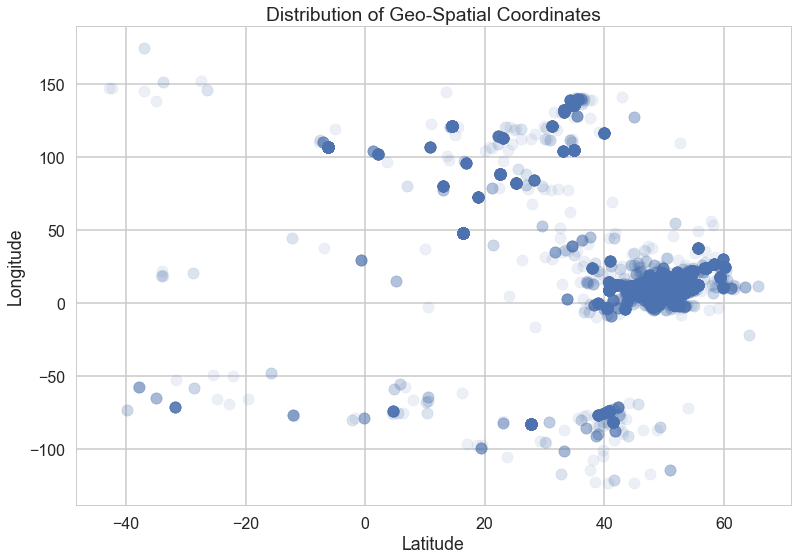

In [116]:
plt.title('Distribution of Geo-Spatial Coordinates')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(*zip(*ppnPosition),alpha=0.1)
if saveFiguresAsPDF:
    plt.savefig('./figures/sample.pdf')

* Latitudes range from -90 to 90. -> x-Achse sollte 180 breit sein, Mitte ist 90
* Longitudes range from -180 to 180 -> y-Achse sollte 360 breit sein, Mitte ist 180


In [117]:
feats=ppnPosition

# define the number of clusters to be found
true_k=30
printLog("Clustering of %i elements started with %i as cluster target size."%(len(feats),true_k))
# initialize the k-means algorithm
#km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# we will rely on the mini batch k-means algorithm due to performance consideration otherwise your computer might crash...
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

# apply the algorithm on the data
km.fit(feats)
printLog("Clustering finished.")
km.labels_

[2017-02-27 17:29:09.144474]	Clustering of 83418 elements started with 30 as cluster target size.
[2017-02-27 17:29:09.418089]	Clustering finished.


array([13, 19,  6, ...,  0, 16, 11], dtype=int32)

bounding boxes aus http://boundingbox.klokantech.com/

Visualization with GeoJSON (http://geojson.org/) https://pypi.python.org/pypi/geojson and OpenLayers  http://openlayers.org/en/latest/doc/ http://openlayers.org/en/latest/apidoc/




In [118]:
regions=["Europe","Africa","Asia","Australia","SouthAmerica","NorthAmerica"]
regionBoundingBox=dict()
#westlimit=-22.5; southlimit=33.6; eastlimit=58.4; northlimit=82.9
regionBoundingBox["Europe"]=[33.6,82.9,-22.5,58.4]
#africa westlimit=-22.9; southlimit=-63.7; eastlimit=58.0; northlimit=37.2
regionBoundingBox["Africa"]=[-63.7,37.2,-22.9,58.0]
#asia westlimit=29.5; southlimit=-11.4; eastlimit=-168.4; northlimit=81.2
regionBoundingBox["Asia"]=[-11.4,81.2,-168.4,29.5]
#australia westlimit=112.5; southlimit=-50.4; eastlimit=-162.9; northlimit=-10.0
regionBoundingBox["Australia"]=[-50.4,-10.0,-162.9,112.5]
#south america westlimit=-119.5; southlimit=-57.0; eastlimit=-29.9; northlimit=28.1
regionBoundingBox["SouthAmerica"]=[-57.0,28.1,-119.5,-29.9]
#north america westlimit=-169.1; southlimit=23.7; eastlimit=-20.0; northlimit=71.4
regionBoundingBox["NorthAmerica"]=[23.7,71.4,-169.1,-20.0]


# man muss checken in welchen intervallen die kontinente liegen, insb. bei 2 und 3
def getRegion(lat,lng):
    for region in regions:
        if region in regionBoundingBox:
            if regionBoundingBox[region][0] <= lat <= regionBoundingBox[region][1]:
                if regionBoundingBox[region][2] <= lng <= regionBoundingBox[region][3]:
                    return region

    return "other"

#print getRegion(51,10)



In [119]:
# combine all arrays and check if there is more than one location associated with a PPN
# ppnPosition is (lat,lng)
printLog("Creating GeoJSON data...")
multipleCitiesPPN=pickleDecompress("./picklez/multipleSpatialNamesPerPPN.picklez")

baseDir="./web/data/layers/"
fileName=baseDir+"test.json"
locationFeatures=dict()
locationFeaturesGlobal=[]

spots=zip(ppnPositionLabels, ppnPositionSpatialClean,ppnPosition)

for spot in spots:
    ppn=spot[0]
    leadingLoc=spot[1]
    latLng=spot[2]
    # GeoJSON points are in longitude , latitude but our storage is lat/lng
    my_point = gj.Point((latLng[1], latLng[0]))

    region=getRegion(latLng[0],latLng[1])
    if region not in locationFeatures:
        locationFeatures[region]=[]
        print("Adding "+region)
    else:
        locationFeatures[region].append(gj.Feature(geometry=my_point, properties={"title": leadingLoc+" "+ppn, "ppn":ppn}))
    
    locationFeaturesGlobal.append(gj.Feature(geometry=my_point, properties={"title": leadingLoc+" "+ppn, "ppn":ppn}))
    #print ppn
    if ppn in multipleCitiesPPN:
        array=multipleCitiesPPN[ppn]
        #if there are alternative locations for this PPN
        if len(array)>1:
            #print leadingLoc+" "+ppn
            #print "\t"+"; ".join(array).encode("utf-8")
            pass

for region in locationFeatures:
    geoJSON_collection=gj.FeatureCollection(locationFeatures[region])
    dump = gj.dumps(geoJSON_collection, sort_keys=True)

    jsonFile = open(baseDir+region.lower()+".json", "w")
    jsonFile.write(dump)
    jsonFile.close()
    

geoJSON_collection=gj.FeatureCollection(locationFeaturesGlobal)
dump = gj.dumps(geoJSON_collection, sort_keys=True)

globalJSONPath=baseDir+"global.json"
jsonFile = open(globalJSONPath, "w")
jsonFile.write(dump)
jsonFile.close()
printLog("Serialized %i metadata records.\n\tSaved global JSON document at %s." %(len(locationFeaturesGlobal),globalJSONPath))

printLog("Done.")

[2017-02-27 17:29:09.503100]	Creating GeoJSON data...
[2017-02-27 17:29:09.504331]	Depickling from './picklez/multipleSpatialNamesPerPPN.picklez'
[2017-02-27 17:29:10.541805]	Depickling done.
Adding Europe
Adding other
Adding Asia
Adding Africa
Adding Australia
[2017-02-27 17:29:15.290048]	Serialized 83418 metadata records.
	Saved global JSON document at ./web/data/layers/global.json.
[2017-02-27 17:29:15.291348]	Done.


In [120]:
#print spots.index("PPN766441857")
#print(spots[10])
#print(getRegion(spots[10][2][0],spots[10][2][1]))

In [121]:
# we will create an inverted mapping from alternative location names to "leading" location names
# the resulting dicts "main" key will be the leading character of the alternative location name 
# within this map will be a mapping to the "leading" location name, e.g., 'Corfu' would be mapped to 'Korfu'
# lastLetter=r[0].lower()
osmNames=pickleDecompress('./picklez/osm_names.picklez')
osmAlternativesSorted=dict()
for leadLoc in osmNames:
    #print leadLoc
    for v in osmNames[leadLoc].values():
        leadingLetter=v[0].lower()
        if not leadingLetter in osmAlternativesSorted:
            osmAlternativesSorted[leadingLetter]=dict()
        else:
            osmAlternativesSorted[leadingLetter][v]=leadLoc

[2017-02-27 17:29:15.306266]	Depickling from './picklez/osm_names.picklez'
[2017-02-27 17:29:15.358683]	Depickling done.


In [122]:
# osmNames(key): alle alternativen titel in der Form names[loc][u'name']:
# u'Ems': {u'name:nl': u'Eems', u'name': u'Ems', u'name:de': u'Ems', u'name:la': u'Amisia'...
# latLng(key)[lat|lng]: latitude/longitude pro key

# Ideen

* Timeline und Grafisches Aussehen, x-Achse: Zeit, y-Achse. Farbe? Brightness? Entropy? Abweichung vom Referenzbild (Distanz zum QBE)? https://www.slideshare.net/formalist/how-and-why-study-big-cultural-data-v2-15552598 #43
* Dominante Farbe bestimmen, als 3D-Punkt nehmen und schauen, ob es mit etwas korreliert?
* Stabi-URL:



In [123]:
#g=df4.groupby("publisher")
#g.describe()

In [124]:
#g.count().plot(legend=False)

# Service Functions
to avoid problems with JSON access you should load the web pages from your own HTTP server

In [129]:
if True:#launchHTTPServer:
    # the resulting HTTP service will listen on port 8000 and open the main page in the browser
    import http_server
    http_server.load_url('web/webapps/index.html')

Webserver working directory: /Users/david/Documents/src/python/SBBrowse


127.0.0.1 - - [27/Feb/2017 18:07:59] "GET /web/webapps/qa/visualclusters.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/webapps/qa/visualclusters.html HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/webapps/common/SBBrowse_config.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/webapps/css/sbbbrowse.css HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/webapps/qa/visualclusters.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/data/clusters.csv HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/thumbnails/PPN3308101424.jpg HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/thumbnails/PPN655634029.jpg HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/thumbnails/PPN627401597.jpg HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/thumbnails/PPN635598957.jpg HTTP/1.1" 200 -
127.0.0.1 - - [27/Feb/2017 18:08:51] "GET /web/thumbnails/PPN662350499.jpg HTTP/1.1" 200 -

Press <RETURN> to stop server

To restart server run: 
python -m http.server 8000
